In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import seaborn as sns
import datetime as dt

In [2]:
PATH = "../Dados/Armarios/"
FILE = "contagem_faturado_consumo_armarios_por_ano_mes.txt"

## Contagem de armários ativos mensais/anuais

In [35]:
armarios = pd.read_csv(PATH + FILE, sep = '\t')

In [36]:
armarios['contagem'].dtype

dtype('int64')

In [37]:
armarios

contagem       custo     consumo     mes
0       4314  4267820.58  6186296.14  201701
1       4434  4275985.94  6161882.53  201702
2       4600  4823462.26  6739253.51  201703
3       4520  4524682.78  6407286.19  201704
4       4640  4703198.48  6670193.32  201705
..       ...         ...         ...     ...
60      4137  3710423.69  4308720.16  202201
61      4122  4179147.39  4092172.18  202202
62      4098  4374301.34  4266572.49  202203
63      3985  3843716.57  3915388.49  202204
64      3827  3111359.72  3710250.47  202205

[65 rows x 4 columns]

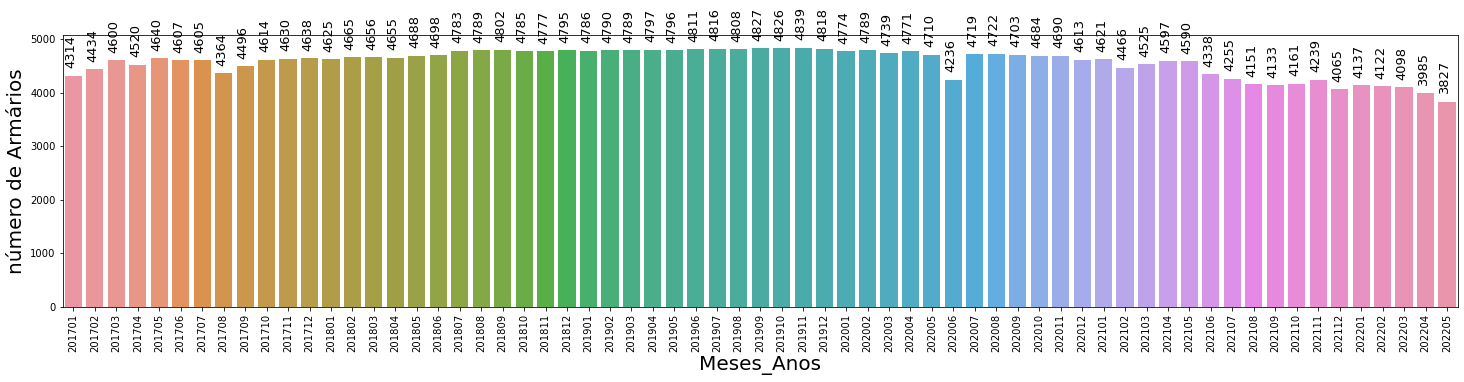

In [71]:
plt.figure(figsize=(25, 5))
#ax = sns.barplot(x=armarios['mes'], y=(armarios['contagem']))
ax = sns.barplot(x = 'mes', y = 'contagem', data = armarios)

plt.xticks(rotation=90)

#plt.plot(df.index, df['contagem'], linestyle= "--", color='#b19cd9', alpha=1., linewidth=3, label = 'Saldo')

for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x(), p.get_height()+200), rotation = 90, fontsize = 13)
    
ax.set(xlabel='Meses_Anos', ylabel='número de Armários')
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)

plt.show()

In [72]:
teste = pd.read_csv(PATH + 'estatistica_100_4000.txt', sep = '\t')
teste

uf     mes macroregiao  total  cons_100  cons_100_4000  cons_4000
0     MG  201701          SE    321         0            327          5
1     CE  201701          NE      2         0              2          0
2     MS  201701          CO    129        31             96          3
3     RJ  201701          SE    318         9            308          7
4     RO  201701           N      3         2              0          1
...   ..     ...         ...    ...       ...            ...        ...
1438  RJ  202205          SE    287        10            273          7
1439  CE  202205          NE     57         0             58          0
1440  MS  202205          CO    119         2            117          1
1441  MG  202205          SE    309        18            295          5
1442  RO  202205           N      1         1              0          0

[1443 rows x 7 columns]

In [73]:
teste.groupby('mes')['total', 'cons_100', 'cons_100_4000', 'cons_4000'].sum()

C:\Users\TALMEI~1\AppData\Local\Temp/ipykernel_1332/2353522088.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  teste.groupby('mes')['total', 'cons_100', 'cons_100_4000', 'cons_4000'].sum()


total  cons_100  cons_100_4000  cons_4000
mes                                              
201701   4649       275           4404         95
201702   4725       232           4531         92
201703   4903       249           4710         97
201704   4808       247           4633         80
201705   4937       245           4746         88
...       ...       ...            ...        ...
202201   4413       236           4225         69
202202   4353       196           4211         61
202203   4322       187           4184         62
202204   4236       217           4068         57
202205   4060       203           3906         54

[65 rows x 4 columns]

In [74]:
teste.groupby(['mes', 'macroregiao'])['total', 'cons_100', 'cons_100_4000', 'cons_4000'].sum()

C:\Users\TALMEI~1\AppData\Local\Temp/ipykernel_1332/4240356240.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  teste.groupby(['mes', 'macroregiao'])['total', 'cons_100', 'cons_100_4000', 'cons_4000'].sum()


total  cons_100  cons_100_4000  cons_4000
mes    macroregiao                                           
201701 CO             772        55            727          9
       N                5         3              0          2
       NE             512        68            463          4
       S             1774       119           1662         56
       SE            1586        30           1552         24
...                   ...       ...            ...        ...
202205 CO             435        60            378          2
       N                2         1              1          0
       NE             507         8            519          4
       S             1658        82           1604         29
       SE            1458        52           1404         19

[325 rows x 4 columns]

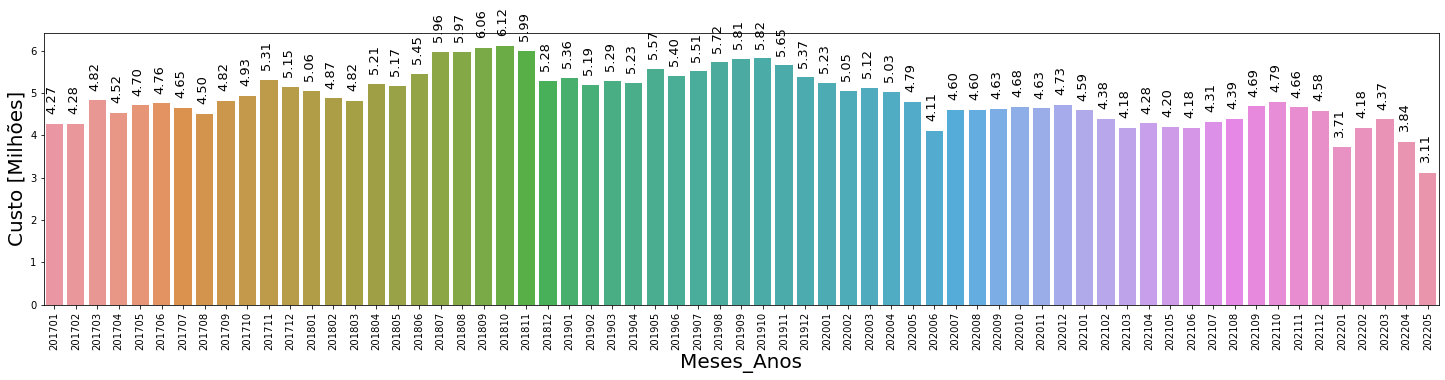

In [75]:
plt.figure(figsize=(25, 5))
#ax = sns.barplot(x=armarios['mes'], y=(armarios['contagem']))
ax = sns.barplot(x = 'mes', y = armarios['custo']/1000000, data = armarios)

plt.xticks(rotation=90)


for p in ax.patches:
    ax.annotate('{:.2f}'.format(p.get_height()), (p.get_x(), p.get_height() + 0.3), rotation = 90, fontsize = 13)
    
ax.set(xlabel='Meses_Anos', ylabel='Custo [Milhões]')
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)

plt.show()

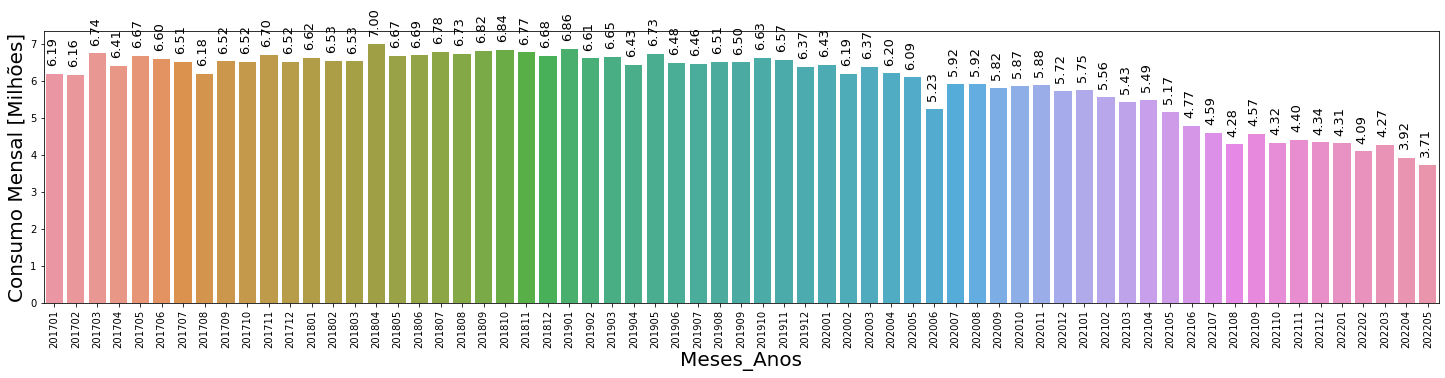

In [76]:
plt.figure(figsize=(25, 5))
#ax = sns.barplot(x=armarios['mes'], y=(armarios['contagem']))
ax = sns.barplot(x = 'mes', y = armarios['consumo']/1000000, data = armarios)

plt.xticks(rotation=90)


for p in ax.patches:
    ax.annotate('{:.2f}'.format(p.get_height()), (p.get_x(), p.get_height() + 0.3), rotation = 90, fontsize = 13)
    
ax.set(xlabel='Meses_Anos', ylabel='Consumo Mensal [Milhões]')
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)

plt.show()

In [48]:
estados_armarios = pd.read_csv(PATH + 'contagem_faturado_consumo_estados_202205.txt', sep = '\t')
estados_armarios.columns

Index(['contagem', 'custo', 'consumo', 'mes', 'uf', 'macroregiao'], dtype='object')

In [49]:
total = int(sum(estados_armarios['contagem']))
total

4089

In [50]:
estados_armarios

contagem      custo    consumo     mes  uf macroregiao
0        178   44591.59   42313.00  202205  DF          CO
1        116  135637.29  112157.00  202205  MS          CO
2        268   33632.40  294161.37  202205  GO          CO
3         75   15851.52   77339.00  202205  MT          CO
4          1    2063.19    1776.00  202205  AM           N
5          4    7000.97    7227.00  202205  PI          NE
6         63   64517.01   54675.00  202205  AL          NE
7        209  346212.75  280487.00  202205  BA          NE
8         74   71372.80   77250.00  202205  PB          NE
9         13   10044.01   14004.00  202205  PE          NE
10        31   20686.91   20178.00  202205  RN          NE
11        46   53155.08   48993.00  202205  SE          NE
12        57   83428.25   69064.00  202205  CE          NE
13       722  690918.19  741501.00  202205  PR           S
14       482  397640.81  519581.84  202205  RS           S
15       359  233974.63  281570.00  202205  SC           S
16       650  414281.32  490040.60  202205  SP          SE
17       182  195998.85  209734.00  202205  ES          SE
18       288   68521.01  364837.00  202205  MG          SE
19       271  247170.27  288266.00  202205  RJ          SE

In [51]:
estados_armarios = estados_armarios.sort_values(by=['macroregiao', 'contagem'])
estados_armarios

contagem      custo    consumo     mes  uf macroregiao
3         75   15851.52   77339.00  202205  MT          CO
1        116  135637.29  112157.00  202205  MS          CO
0        178   44591.59   42313.00  202205  DF          CO
2        268   33632.40  294161.37  202205  GO          CO
4          1    2063.19    1776.00  202205  AM           N
5          4    7000.97    7227.00  202205  PI          NE
9         13   10044.01   14004.00  202205  PE          NE
10        31   20686.91   20178.00  202205  RN          NE
11        46   53155.08   48993.00  202205  SE          NE
12        57   83428.25   69064.00  202205  CE          NE
6         63   64517.01   54675.00  202205  AL          NE
8         74   71372.80   77250.00  202205  PB          NE
7        209  346212.75  280487.00  202205  BA          NE
15       359  233974.63  281570.00  202205  SC           S
14       482  397640.81  519581.84  202205  RS           S
13       722  690918.19  741501.00  202205  PR           S
17       182  195998.85  209734.00  202205  ES          SE
19       271  247170.27  288266.00  202205  RJ          SE
18       288   68521.01  364837.00  202205  MG          SE
16       650  414281.32  490040.60  202205  SP          SE

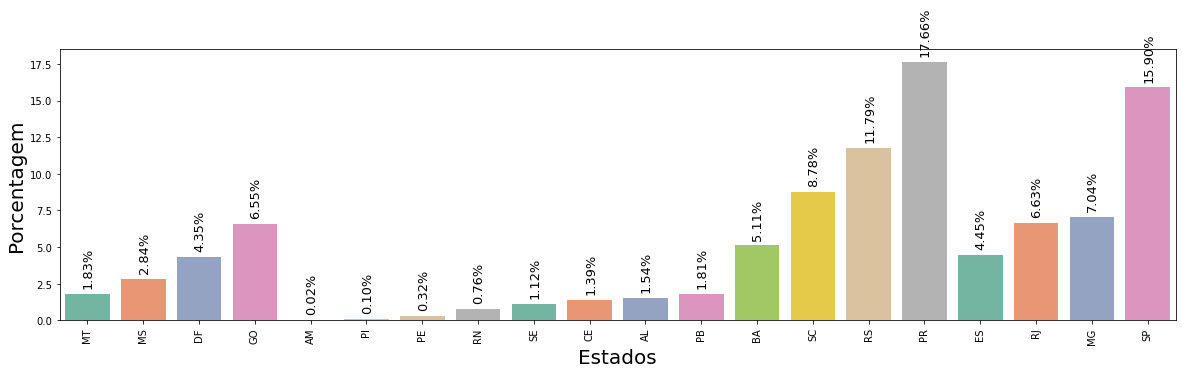

In [52]:
plt.figure(figsize=(20, 5))
ax = sns.barplot(x=estados_armarios['uf'], y=(estados_armarios['contagem']/total)*100, data = estados_armarios, palette='Set2')

plt.xticks(rotation=90)

for p in ax.patches:
    ax.annotate('{:.2f}%'.format(p.get_height()), (p.get_x() + 0.3, p.get_height()+0.6), rotation = 90, fontsize = 13)
    
ax.set(xlabel='Estados', ylabel='Porcentagem')
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
plt.show()

In [53]:
teste = estados_armarios[['macroregiao','contagem']]
teste['porcentagem'] = (estados_armarios['contagem']/total)*100
round(teste.groupby('macroregiao')['porcentagem'].sum(),2)

C:\Users\TALMEI~1\AppData\Local\Temp/ipykernel_12504/1077639648.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  teste['porcentagem'] = (estados_armarios['contagem']/total)*100


macroregiao
CO    15.58
N      0.02
NE    12.15
S     38.22
SE    34.02
Name: porcentagem, dtype: float64

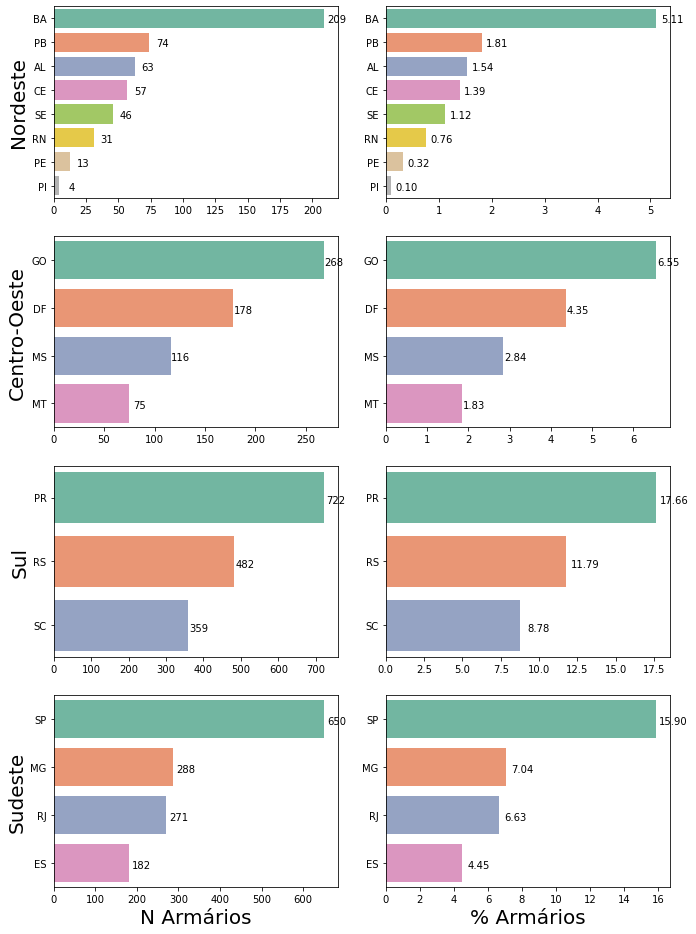

In [54]:
fig = plt.figure(figsize=(17,50))
plt.subplots_adjust(wspace=0.17)


#### Nordeste 

#### Fig A
plot = plt.subplot(12, 3, 1)

ax = sns.barplot(
    x='contagem', 
    y='uf', 
    data=estados_armarios.loc[estados_armarios['macroregiao'] == 'NE'].sort_values(by='contagem', ascending=False),
    palette='Set2', orient='h'
)

for p in ax.patches:
    width = p.get_width()
    plt.text(10+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:.0f}'.format(width),
             ha='center', va='center')

plt.grid(False)
plt.ylabel("Nordeste")
plt.xlabel("")

ax.yaxis.label.set_size(20)

#### Fig B
plot = plt.subplot(12, 3, 2)

ax = sns.barplot(
    x=(estados_armarios['contagem']/total)*100, 
    y='uf', 
    data=estados_armarios.loc[estados_armarios['macroregiao'] == 'NE'].sort_values(by='contagem', ascending=False),
    palette='Set2', orient='h'
)

for p in ax.patches:
    width = p.get_width()
    plt.text(0.3+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:.2f}'.format(width),
             ha='center', va='center')

plt.grid(False)
plt.ylabel("")
plt.xlabel("")



#### Centro-Oeste 

#### Fig A
plot = plt.subplot(12, 3, 4)

ax = sns.barplot(
    x='contagem', 
    y='uf', 
    data=estados_armarios.loc[estados_armarios['macroregiao'] == 'CO'].sort_values(by='contagem', ascending=False),
    palette='Set2', orient='h'
)

for p in ax.patches:
    width = p.get_width()
    plt.text(10+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:.0f}'.format(width),
             ha='center', va='center')

plt.grid(False)
plt.ylabel("Centro-Oeste")
plt.xlabel("")

ax.yaxis.label.set_size(20)

#### Fig B
plot = plt.subplot(12, 3, 5)

ax = sns.barplot(
    x=(estados_armarios['contagem']/total)*100, 
    y='uf', 
    data=estados_armarios.loc[estados_armarios['macroregiao'] == 'CO'].sort_values(by='contagem', ascending=False),
    palette='Set2', orient='h'
)

for p in ax.patches:
    width = p.get_width()
    plt.text(0.3+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:.2f}'.format(width),
             ha='center', va='center')

plt.grid(False)
plt.ylabel("")
plt.xlabel("")


#### Sul

#### Fig A
plot = plt.subplot(12, 3, 7)

ax = sns.barplot(
    x='contagem', 
    y='uf', 
    data=estados_armarios.loc[estados_armarios['macroregiao'] == 'S'].sort_values(by='contagem', ascending=False),
    palette='Set2', orient='h'
)

for p in ax.patches:
    width = p.get_width()
    plt.text(30+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:.0f}'.format(width),
             ha='center', va='center')

plt.grid(False)
plt.ylabel("Sul")
plt.xlabel("")
ax.yaxis.label.set_size(20)

#### Fig B
plot = plt.subplot(12, 3, 8)

ax = sns.barplot(
    x=(estados_armarios['contagem']/total)*100, 
    y='uf', 
    data=estados_armarios.loc[estados_armarios['macroregiao'] == 'S'].sort_values(by='contagem', ascending=False),
    palette='Set2', orient='h'
)

for p in ax.patches:
    width = p.get_width()
    plt.text(1.2+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:.2f}'.format(width),
             ha='center', va='center')

plt.grid(False)
plt.ylabel("")
plt.xlabel("")
    

#### Sudeste

#### Fig A
plot = plt.subplot(12, 3, 10)

ax = sns.barplot(
    x='contagem', 
    y='uf', 
    data=estados_armarios.loc[estados_armarios['macroregiao'] == 'SE'].sort_values(by='contagem', ascending=False),
    palette='Set2', orient='h'
)

for p in ax.patches:
    width = p.get_width()
    plt.text(30+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:.0f}'.format(width),
             ha='center', va='center')

plt.grid(False)
plt.ylabel("Sudeste")
plt.xlabel("N Armários")
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)

#### Fig B
plot = plt.subplot(12, 3, 11)

ax = sns.barplot(
    x=(estados_armarios['contagem']/total)*100, 
    y='uf', 
    data=estados_armarios.loc[estados_armarios['macroregiao'] == 'SE'].sort_values(by='contagem', ascending=False),
    palette='Set2', orient='h'
)

for p in ax.patches:
    width = p.get_width()
    plt.text(1+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:.2f}'.format(width),
             ha='center', va='center')

plt.grid(False)
plt.ylabel("")
plt.xlabel("% Armários")
ax.xaxis.label.set_size(20)


del ax

In [84]:
estados_armarios['contagem']

2       6
3      75
1     116
0     178
4       1
5       4
9      13
10     31
11     46
12     57
6      63
8      74
7     209
15    359
14    482
13    722
17    182
19    271
18    288
16    650
Name: contagem, dtype: int64

In [85]:
round(estados_armarios.groupby('macroregiao')['contagem'].sum(),2)

macroregiao
CO     375
N        1
NE     497
S     1563
SE    1391
Name: contagem, dtype: int64

In [86]:
round(estados_armarios.groupby('macroregiao')['consumo'].sum(),2)

macroregiao
CO     241066.03
N        1776.00
NE     571878.00
S     1542652.84
SE    1352877.60
Name: consumo, dtype: float64

In [87]:
round(estados_armarios.groupby('macroregiao')['custo'].sum(),2)

macroregiao
CO     204373.67
N        2063.19
NE     656417.78
S     1322533.63
SE     925971.45
Name: custo, dtype: float64

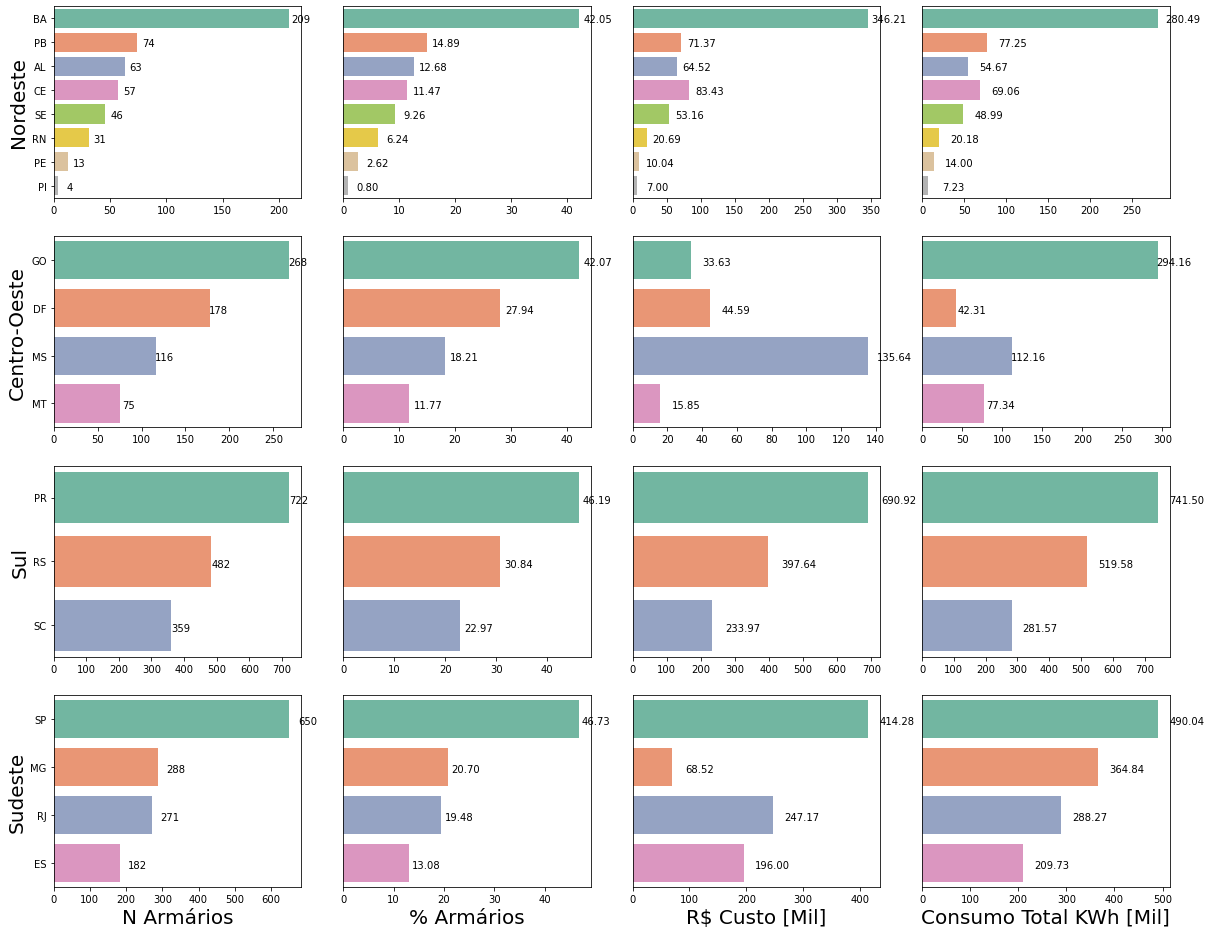

In [55]:
fig = plt.figure(figsize=(20,50))
plt.subplots_adjust(wspace=0.17)


#### Nordeste 

#### Fig A
plot = plt.subplot(12, 4, 1)

ax = sns.barplot(
    x='contagem', 
    y='uf', 
    data=estados_armarios.loc[estados_armarios['macroregiao'] == 'NE'].sort_values(by='contagem', ascending=False),
    palette='Set2', orient='h'
)

for p in ax.patches:
    width = p.get_width()
    plt.text(10+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:.0f}'.format(width),
             ha='center', va='center')

plt.grid(False)
plt.ylabel("Nordeste")
plt.xlabel("")

ax.yaxis.label.set_size(20)

#### Fig B
plot = plt.subplot(12, 4, 2)

ax = sns.barplot(
    x=(estados_armarios['contagem']/sum(estados_armarios['contagem'].loc[estados_armarios['macroregiao'] == 'NE']) * 100), 
    y='uf', 
    data=estados_armarios.loc[estados_armarios['macroregiao'] == 'NE'].sort_values(by='contagem', ascending=False),
    palette='Set2', orient='h'
)

for p in ax.patches:
    width = p.get_width()
    plt.text(3.5+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:.2f}'.format(width),
             ha='center', va='center')

plt.grid(False)
plt.ylabel("")
plt.xlabel("")
ax.get_yaxis().set_visible(False)


#### Fig C
plot = plt.subplot(12, 4, 3)

ax = sns.barplot(
    x=estados_armarios['custo']/1000, 
    y='uf', 
    data=estados_armarios.loc[estados_armarios['macroregiao'] == 'NE'].sort_values(by='contagem', ascending=False),
    palette='Set2', orient='h'
)

for p in ax.patches:
    width = p.get_width()
    plt.text(30+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:.2f}'.format(width),
             ha='center', va='center')

plt.grid(False)
plt.ylabel("")
plt.xlabel("")
ax.get_yaxis().set_visible(False)


#### Fig D
plot = plt.subplot(12, 4, 4)

ax = sns.barplot(
    x=estados_armarios['consumo']/1000, 
    y='uf', 
    data=estados_armarios.loc[estados_armarios['macroregiao'] == 'NE'].sort_values(by='contagem', ascending=False),
    palette='Set2', orient='h'
)

for p in ax.patches:
    width = p.get_width()
    plt.text(30+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:.2f}'.format(width),
             ha='center', va='center')

plt.grid(False)
plt.ylabel("")
plt.xlabel("")
ax.get_yaxis().set_visible(False)



#### Centro-Oeste 

#### Fig A
plot = plt.subplot(12, 4, 5)

ax = sns.barplot(
    x='contagem', 
    y='uf', 
    data=estados_armarios.loc[estados_armarios['macroregiao'] == 'CO'].sort_values(by='contagem', ascending=False),
    palette='Set2', orient='h'
)

for p in ax.patches:
    width = p.get_width()
    plt.text(10+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:.0f}'.format(width),
             ha='center', va='center')

plt.grid(False)
plt.ylabel("Centro-Oeste")
plt.xlabel("")

ax.yaxis.label.set_size(20)

#### Fig B
plot = plt.subplot(12, 4, 6)

ax = sns.barplot(
    x=(estados_armarios['contagem']/sum(estados_armarios['contagem'].loc[estados_armarios['macroregiao'] == 'CO']) * 100), 
    y='uf', 
    data=estados_armarios.loc[estados_armarios['macroregiao'] == 'CO'].sort_values(by='contagem', ascending=False),
    palette='Set2', orient='h'
)

for p in ax.patches:
    width = p.get_width()
    plt.text(3.5+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:.2f}'.format(width),
             ha='center', va='center')

plt.grid(False)
plt.ylabel("")
plt.xlabel("")
ax.get_yaxis().set_visible(False)

#### Fig C
plot = plt.subplot(12, 4, 7)

ax = sns.barplot(
    x=estados_armarios['custo']/1000, 
    y='uf', 
    data=estados_armarios.loc[estados_armarios['macroregiao'] == 'CO'].sort_values(by='contagem', ascending=False),
    palette='Set2', orient='h'
)

for p in ax.patches:
    width = p.get_width()
    plt.text(15+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:.2f}'.format(width),
             ha='center', va='center')

plt.grid(False)
plt.ylabel("")
plt.xlabel("")
ax.get_yaxis().set_visible(False)


#### Fig D
plot = plt.subplot(12, 4, 8)

ax = sns.barplot(
    x=estados_armarios['consumo']/1000, 
    y='uf', 
    data=estados_armarios.loc[estados_armarios['macroregiao'] == 'CO'].sort_values(by='contagem', ascending=False),
    palette='Set2', orient='h'
)

for p in ax.patches:
    width = p.get_width()
    plt.text(20+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:.2f}'.format(width),
             ha='center', va='center')

plt.grid(False)
plt.ylabel("")
plt.xlabel("")
ax.get_yaxis().set_visible(False)


#### Sul

#### Fig A
plot = plt.subplot(12, 4, 9)

ax = sns.barplot(
    x='contagem', 
    y='uf', 
    data=estados_armarios.loc[estados_armarios['macroregiao'] == 'S'].sort_values(by='contagem', ascending=False),
    palette='Set2', orient='h'
)

for p in ax.patches:
    width = p.get_width()
    plt.text(30+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:.0f}'.format(width),
             ha='center', va='center')

plt.grid(False)
plt.ylabel("Sul")
plt.xlabel("")
ax.yaxis.label.set_size(20)

#### Fig B
plot = plt.subplot(12, 4, 10)

ax = sns.barplot(
    x=(estados_armarios['contagem']/sum(estados_armarios['contagem'].loc[estados_armarios['macroregiao'] == 'S']) * 100), 
    y='uf', 
    data=estados_armarios.loc[estados_armarios['macroregiao'] == 'S'].sort_values(by='contagem', ascending=False),
    palette='Set2', orient='h'
)

for p in ax.patches:
    width = p.get_width()
    plt.text(3.5+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:.2f}'.format(width),
             ha='center', va='center')

plt.grid(False)
plt.ylabel("")
plt.xlabel("")
ax.get_yaxis().set_visible(False)
    

    
#### Fig C
plot = plt.subplot(12, 4, 11)

ax = sns.barplot(
    x=estados_armarios['custo']/1000, 
    y='uf', 
    data=estados_armarios.loc[estados_armarios['macroregiao'] == 'S'].sort_values(by='contagem', ascending=False),
    palette='Set2', orient='h'
)

for p in ax.patches:
    width = p.get_width()
    plt.text(90+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:.2f}'.format(width),
             ha='center', va='center')

plt.grid(False)
plt.ylabel("")
plt.xlabel("")
ax.get_yaxis().set_visible(False)


#### Fig D
plot = plt.subplot(12, 4, 12)

ax = sns.barplot(
    x=estados_armarios['consumo']/1000, 
    y='uf', 
    data=estados_armarios.loc[estados_armarios['macroregiao'] == 'S'].sort_values(by='contagem', ascending=False),
    palette='Set2', orient='h'
)

for p in ax.patches:
    width = p.get_width()
    plt.text(90+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:.2f}'.format(width),
             ha='center', va='center')

plt.grid(False)
plt.ylabel("")
plt.xlabel("")
ax.get_yaxis().set_visible(False)
    
    

#### Sudeste

#### Fig A
plot = plt.subplot(12, 4, 13)

ax = sns.barplot(
    x='contagem', 
    y='uf', 
    data=estados_armarios.loc[estados_armarios['macroregiao'] == 'SE'].sort_values(by='contagem', ascending=False),
    palette='Set2', orient='h'
)

for p in ax.patches:
    width = p.get_width()
    plt.text(50+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:.0f}'.format(width),
             ha='center', va='center')

plt.grid(False)
plt.ylabel("Sudeste")
plt.xlabel("N Armários")
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)

#### Fig B
plot = plt.subplot(12, 4, 14)

ax = sns.barplot(
    x=(estados_armarios['contagem']/sum(estados_armarios['contagem'].loc[estados_armarios['macroregiao'] == 'SE']) * 100), 
    y='uf', 
    data=estados_armarios.loc[estados_armarios['macroregiao'] == 'SE'].sort_values(by='contagem', ascending=False),
    palette='Set2', orient='h'
)

for p in ax.patches:
    width = p.get_width()
    plt.text(3.5+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:.2f}'.format(width),
             ha='center', va='center')

plt.grid(False)
plt.ylabel("")
plt.xlabel("% Armários")
ax.get_yaxis().set_visible(False)
ax.xaxis.label.set_size(20)


#### Fig C
plot = plt.subplot(12, 4, 15)

ax = sns.barplot(
    x=estados_armarios['custo']/1000, 
    y='uf', 
    data=estados_armarios.loc[estados_armarios['macroregiao'] == 'SE'].sort_values(by='contagem', ascending=False),
    palette='Set2', orient='h'
)

for p in ax.patches:
    width = p.get_width()
    plt.text(50+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:.2f}'.format(width),
             ha='center', va='center')

plt.grid(False)
plt.ylabel("")
plt.xlabel("R$ Custo [Mil]")
ax.get_yaxis().set_visible(False)
ax.xaxis.label.set_size(20)


#### Fig D
plot = plt.subplot(12, 4, 16)

ax = sns.barplot(
    x=estados_armarios['consumo']/1000, 
    y='uf', 
    data=estados_armarios.loc[estados_armarios['macroregiao'] == 'SE'].sort_values(by='contagem', ascending=False),
    palette='Set2', orient='h'
)

for p in ax.patches:
    width = p.get_width()
    plt.text(60+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:.2f}'.format(width),
             ha='center', va='center')

plt.grid(False)
plt.ylabel("")
plt.xlabel("Consumo Total KWh [Mil]")
ax.get_yaxis().set_visible(False)
ax.xaxis.label.set_size(20)


del ax


plt.show()

In [56]:
estados_armarios.loc[estados_armarios['macroregiao'] == 'NE']

contagem      custo   consumo     mes  uf macroregiao
5          4    7000.97    7227.0  202205  PI          NE
9         13   10044.01   14004.0  202205  PE          NE
10        31   20686.91   20178.0  202205  RN          NE
11        46   53155.08   48993.0  202205  SE          NE
12        57   83428.25   69064.0  202205  CE          NE
6         63   64517.01   54675.0  202205  AL          NE
8         74   71372.80   77250.0  202205  PB          NE
7        209  346212.75  280487.0  202205  BA          NE

In [57]:
estados_armarios_03 = pd.read_csv(PATH + 'contagem_faturado_consumo_estados_202203.txt', sep = '\t')
estados_armarios_04 = pd.read_csv(PATH + 'contagem_faturado_consumo_estados_202204.txt', sep = '\t')

In [58]:
total = int(sum(estados_armarios_03['contagem']))
total

4366

In [59]:
total = int(sum(estados_armarios_04['contagem']))
total

4248

In [60]:
estados_armarios_03 = estados_armarios_03.sort_values(by=['macroregiao', 'contagem'])
estados_armarios_04 = estados_armarios_04.sort_values(by=['macroregiao', 'contagem'])

In [61]:
df = estados_armarios.merge(estados_armarios_03, on= ['uf', 'macroregiao'])
df2 = df.merge(estados_armarios_04, on= ['uf', 'macroregiao'])
df2

contagem_x    custo_x  consumo_x   mes_x  uf macroregiao  contagem_y  \
0           75   15851.52   77339.00  202205  MT          CO          78   
1          116  135637.29  112157.00  202205  MS          CO         120   
2          178   44591.59   42313.00  202205  DF          CO         208   
3          268   33632.40  294161.37  202205  GO          CO         272   
4            1    2063.19    1776.00  202205  AM           N           1   
5            4    7000.97    7227.00  202205  PI          NE           4   
6           13   10044.01   14004.00  202205  PE          NE          15   
7           31   20686.91   20178.00  202205  RN          NE          44   
8           46   53155.08   48993.00  202205  SE          NE          51   
9           57   83428.25   69064.00  202205  CE          NE         180   
10          63   64517.01   54675.00  202205  AL          NE          62   
11          74   71372.80   77250.00  202205  PB          NE          82   
12         209  346212.75  280487.00  202205  BA          NE         214   
13         359  233974.63  281570.00  202205  SC           S         361   
14         482  397640.81  519581.84  202205  RS           S         494   
15         722  690918.19  741501.00  202205  PR           S         755   
16         182  195998.85  209734.00  202205  ES          SE         184   
17         271  247170.27  288266.00  202205  RJ          SE         277   
18         288   68521.01  364837.00  202205  MG          SE         315   
19         650  414281.32  490040.60  202205  SP          SE         648   

      custo_y  consumo_y   mes_y  contagem      custo    consumo     mes  
0    15230.59   80502.00  202203        77   14200.52   80453.00  202204  
1   143759.93  123443.00  202203       120  141982.44  119981.00  202204  
2    70529.54   60465.00  202203       179   47036.47   38142.00  202204  
3    82997.37  303745.93  202203       267   56179.57  277696.54  202204  
4     2278.41    1680.00  202203         1    2414.34    1882.00  202204  
5     9515.05    8085.00  202203         4    8252.65    7181.00  202204  
6    15948.40   18962.00  202203        17   10094.48   16899.00  202204  
7    34116.89   31291.00  202203        37   28030.18   25731.00  202204  
8    66601.54   57396.00  202203        48   61351.73   54582.00  202204  
9   288756.06  227601.00  202203       138  215116.93  170563.00  202204  
10   74518.22   56492.00  202203        63   70255.64   54228.00  202204  
11   96827.69   87480.00  202203        81   94133.82   86398.00  202204  
12  377519.36  299421.00  202203       210  342849.08  272552.00  202204  
13  308546.72  307695.00  202203       361  280431.78  285823.00  202204  
14  671056.57  586551.51  202203       485  485280.75  545797.69  202204  
15  936109.47  845200.00  202203       748  845704.94  776124.00  202204  
16  257255.31  227993.00  202203       183  226431.68  208119.00  202204  
17  398396.84  311160.00  202203       283  398192.97  291187.00  202204  
18  105250.19  408459.00  202203       295   85022.37  371251.00  202204  
19  494212.83  517381.20  202203       650  482995.08  501224.80  202204

In [64]:
df2.to_csv(PATH + 'dados_ajeitar.txt', index=False)

In [65]:
df = pd.read_csv(PATH + 'dados_ajeitar.txt', sep = '\t')
df.columns

Index(['contagem', 'custo', 'consumo', 'mês', 'uf', 'macroregiao'], dtype='object')

In [66]:
df

contagem      custo    consumo     mês  uf macroregiao
0         75   15851.52   77339.00  202205  MT          CO
1        116  135637.29  112157.00  202205  MS          CO
2        178   44591.59   42313.00  202205  DF          CO
3        268   33632.40  294161.37  202205  GO          CO
4          1    2063.19    1776.00  202205  AM           N
5          4    7000.97    7227.00  202205  PI          NE
6         13   10044.01   14004.00  202205  PE          NE
7         31   20686.91   20178.00  202205  RN          NE
8         46   53155.08   48993.00  202205  SE          NE
9         57   83428.25   69064.00  202205  CE          NE
10        63   64517.01   54675.00  202205  AL          NE
11        74   71372.80   77250.00  202205  PB          NE
12       209  346212.75  280487.00  202205  BA          NE
13       359  233974.63  281570.00  202205  SC           S
14       482  397640.81  519581.84  202205  RS           S
15       722  690918.19  741501.00  202205  PR           S
16       182  195998.85  209734.00  202205  ES          SE
17       271  247170.27  288266.00  202205  RJ          SE
18       288   68521.01  364837.00  202205  MG          SE
19       650  414281.32  490040.60  202205  SP          SE
20        77   14200.52   80453.00  202204  MT          CO
21       120  141982.44  119981.00  202204  MS          CO
22       179   47036.47   38142.00  202204  DF          CO
23       267   56179.57  277696.54  202204  GO          CO
24         1    2414.34    1882.00  202204  AM           N
25         4    8252.65    7181.00  202204  PI          NE
26        17   10094.48   16899.00  202204  PE          NE
27        37   28030.18   25731.00  202204  RN          NE
28        48   61351.73   54582.00  202204  SE          NE
29       138  215116.93  170563.00  202204  CE          NE
30        63   70255.64   54228.00  202204  AL          NE
31        81   94133.82   86398.00  202204  PB          NE
32       210  342849.08  272552.00  202204  BA          NE
33       361  280431.78  285823.00  202204  SC           S
34       485  485280.75  545797.69  202204  RS           S
35       748  845704.94  776124.00  202204  PR           S
36       183  226431.68  208119.00  202204  ES          SE
37       283  398192.97  291187.00  202204  RJ          SE
38       295   85022.37  371251.00  202204  MG          SE
39       650  482995.08  501224.80  202204  SP          SE
40        78   15230.59   80502.00  202203  MT          CO
41       120  143759.93  123443.00  202203  MS          CO
42       208   70529.54   60465.00  202203  DF          CO
43       272   82997.37  303745.93  202203  GO          CO
44         1    2278.41    1680.00  202203  AM           N
45         4    9515.05    8085.00  202203  PI          NE
46        15   15948.40   18962.00  202203  PE          NE
47        44   34116.89   31291.00  202203  RN          NE
48        51   66601.54   57396.00  202203  SE          NE
49       180  288756.06  227601.00  202203  CE          NE
50        62   74518.22   56492.00  202203  AL          NE
51        82   96827.69   87480.00  202203  PB          NE
52       214  377519.36  299421.00  202203  BA          NE
53       361  308546.72  307695.00  202203  SC           S
54       494  671056.57  586551.51  202203  RS           S
55       755  936109.47  845200.00  202203  PR           S
56       184  257255.31  227993.00  202203  ES          SE
57       277  398396.84  311160.00  202203  RJ          SE
58       315  105250.19  408459.00  202203  MG          SE
59       648  494212.83  517381.20  202203  SP          SE

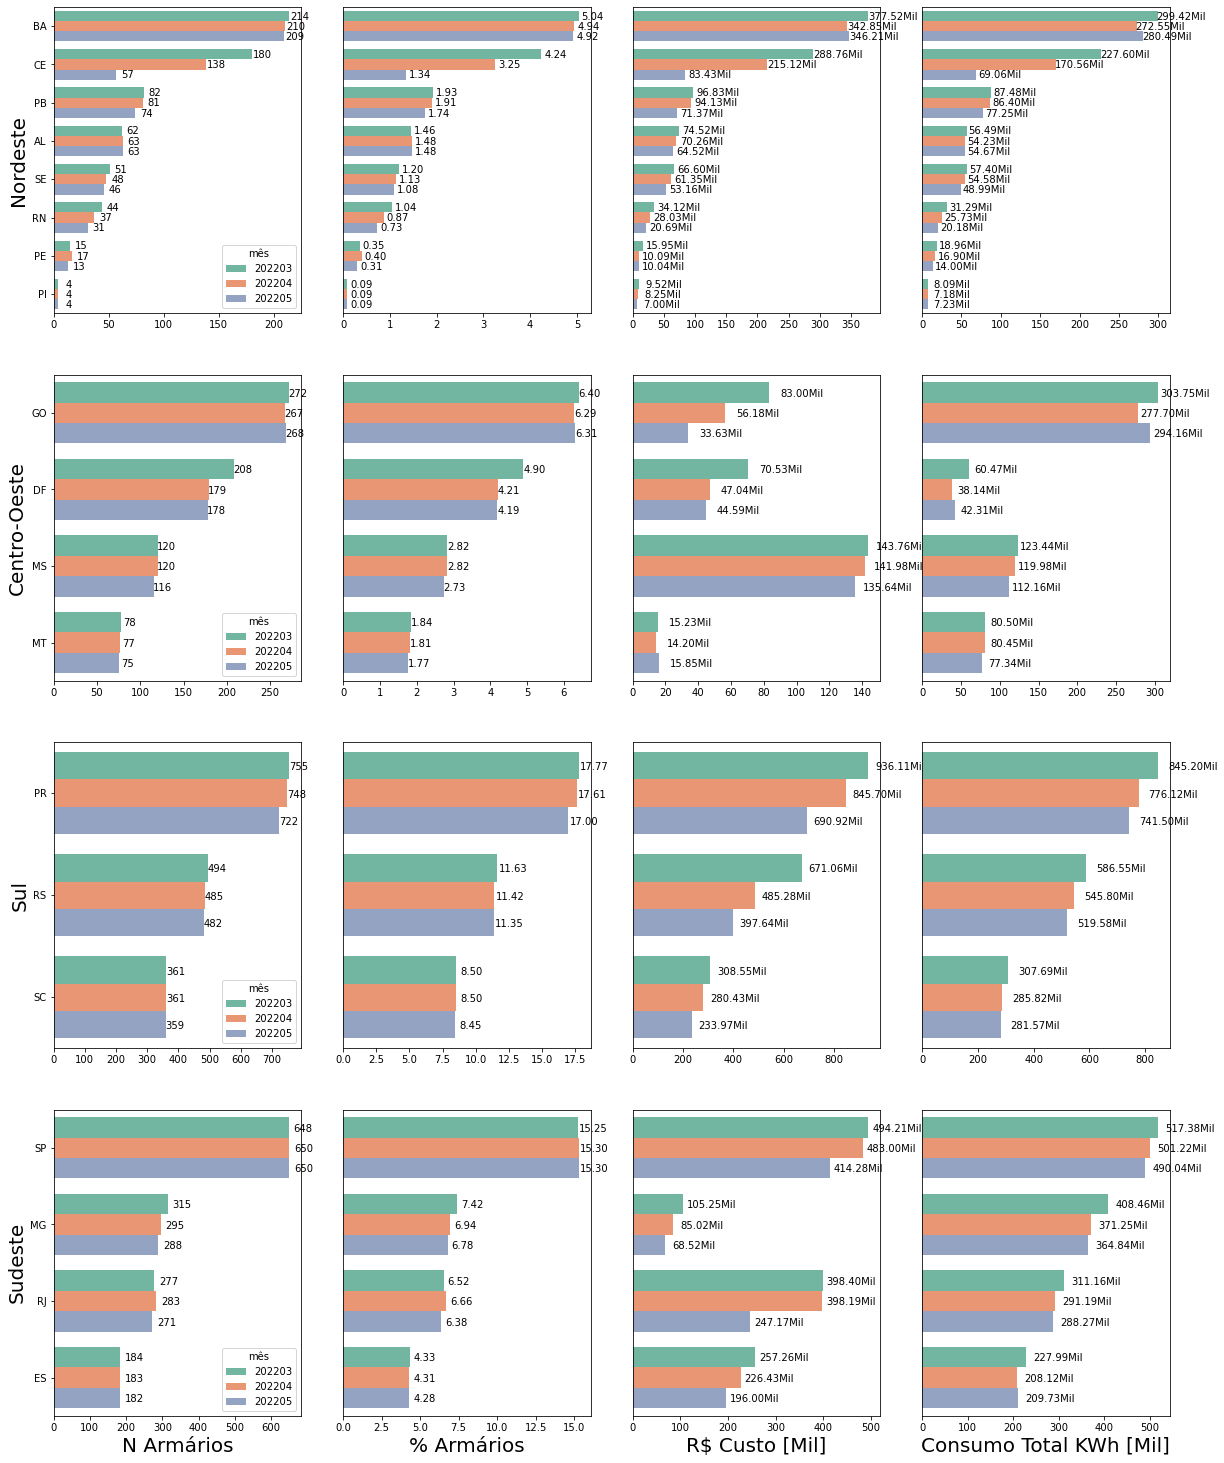

In [71]:
fig = plt.figure(figsize=(20,80))
plt.subplots_adjust(wspace=0.17)


#### Nordeste 

#### Fig A
plot = plt.subplot(12, 4, 1)

ax = sns.barplot(
    x='contagem', 
    y='uf', hue = 'mês', 
    data=df.loc[df['macroregiao'] == 'NE'].sort_values(by='contagem', ascending=False),
    palette='Set2', orient='h'
)

for p in ax.patches:
    width = p.get_width()
    plt.text(10+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:.0f}'.format(width),
             ha='center', va='center')

plt.grid(False)
plt.ylabel("Nordeste")
plt.xlabel("")

ax.yaxis.label.set_size(20)

#### Fig B
plot = plt.subplot(12, 4, 2)

ax = sns.barplot(
    x=(df['contagem']/total)*100, 
    y='uf', hue = 'mês', 
    data=df.loc[df['macroregiao'] == 'NE'].sort_values(by='contagem', ascending=False),
    palette='Set2', orient='h'
)

for p in ax.patches:
    width = p.get_width()
    plt.text(0.3+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:.2f}'.format(width),
             ha='center', va='center')

plt.grid(False)
plt.ylabel("")
plt.xlabel("")
ax.get_yaxis().set_visible(False)
leg = plt.legend()

ax.get_legend().set_visible(False)

#### Fig C
plot = plt.subplot(12, 4, 3)

ax = sns.barplot(
    x=df['custo']/1000, 
    y='uf', hue = 'mês', 
    data=df.loc[df['macroregiao'] == 'NE'].sort_values(by='contagem', ascending=False),
    palette='Set2', orient='h'
)

for p in ax.patches:
    width = p.get_width()
    plt.text(40+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:.2f}Mil'.format(width),
             ha='center', va='center')

plt.grid(False)
plt.ylabel("")
plt.xlabel("")
ax.get_yaxis().set_visible(False)
leg = plt.legend()

ax.get_legend().set_visible(False)

#### Fig D
plot = plt.subplot(12, 4, 4)

ax = sns.barplot(
    x=df['consumo']/1000, 
    y='uf', hue = 'mês', 
    data=df.loc[df['macroregiao'] == 'NE'].sort_values(by='contagem', ascending=False),
    palette='Set2', orient='h'
)

for p in ax.patches:
    width = p.get_width()
    plt.text(30+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:.2f}Mil'.format(width),
             ha='center', va='center')

plt.grid(False)
plt.ylabel("")
plt.xlabel("")
ax.get_yaxis().set_visible(False)
leg = plt.legend()

ax.get_legend().set_visible(False)


#### Centro-Oeste 

#### Fig A
plot = plt.subplot(12, 4, 5)

ax = sns.barplot(
    x='contagem', 
    y='uf', hue = 'mês', 
    data=df.loc[df['macroregiao'] == 'CO'].sort_values(by='contagem', ascending=False),
    palette='Set2', orient='h'
)

for p in ax.patches:
    width = p.get_width()
    plt.text(10+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:.0f}'.format(width),
             ha='center', va='center')

plt.grid(False)
plt.ylabel("Centro-Oeste")
plt.xlabel("")

ax.yaxis.label.set_size(20)

#### Fig B
plot = plt.subplot(12, 4, 6)

ax = sns.barplot(
    x=(df['contagem']/total)*100, 
    y='uf', hue = 'mês', 
    data=df.loc[df['macroregiao'] == 'CO'].sort_values(by='contagem', ascending=False),
    palette='Set2', orient='h'
)

for p in ax.patches:
    width = p.get_width()
    plt.text(0.3+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:.2f}'.format(width),
             ha='center', va='center')

plt.grid(False)
plt.ylabel("")
plt.xlabel("")
ax.get_yaxis().set_visible(False)
leg = plt.legend()

ax.get_legend().set_visible(False)

#### Fig C
plot = plt.subplot(12, 4, 7)

ax = sns.barplot(
    x=df['custo']/1000, 
    y='uf', hue = 'mês', 
    data=df.loc[df['macroregiao'] == 'CO'].sort_values(by='contagem', ascending=False),
    palette='Set2', orient='h'
)

for p in ax.patches:
    width = p.get_width()
    plt.text(20+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:.2f}Mil'.format(width),
             ha='center', va='center')

plt.grid(False)
plt.ylabel("")
plt.xlabel("")
ax.get_yaxis().set_visible(False)
leg = plt.legend()

ax.get_legend().set_visible(False)

#### Fig D
plot = plt.subplot(12, 4, 8)

ax = sns.barplot(
    x=df['consumo']/1000, 
    y='uf', hue = 'mês', 
    data=df.loc[df['macroregiao'] == 'CO'].sort_values(by='contagem', ascending=False),
    palette='Set2', orient='h'
)

for p in ax.patches:
    width = p.get_width()
    plt.text(35+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:.2f}Mil'.format(width),
             ha='center', va='center')

plt.grid(False)
plt.ylabel("")
plt.xlabel("")
ax.get_yaxis().set_visible(False)
leg = plt.legend()

ax.get_legend().set_visible(False)

#### Sul

#### Fig A
plot = plt.subplot(12, 4, 9)

ax = sns.barplot(
    x='contagem', 
    y='uf', hue = 'mês', 
    data=df.loc[df['macroregiao'] == 'S'].sort_values(by='contagem', ascending=False),
    palette='Set2', orient='h'
)

for p in ax.patches:
    width = p.get_width()
    plt.text(30+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:.0f}'.format(width),
             ha='center', va='center')

plt.grid(False)
plt.ylabel("Sul")
plt.xlabel("")
ax.yaxis.label.set_size(20)

#### Fig B
plot = plt.subplot(12, 4, 10)

ax = sns.barplot(
    x=(df['contagem']/total)*100, 
    y='uf', hue = 'mês', 
    data=df.loc[df['macroregiao'] == 'S'].sort_values(by='contagem', ascending=False),
    palette='Set2', orient='h'
)

for p in ax.patches:
    width = p.get_width()
    plt.text(1.2+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:.2f}'.format(width),
             ha='center', va='center')

plt.grid(False)
plt.ylabel("")
plt.xlabel("")
ax.get_yaxis().set_visible(False)
leg = plt.legend()

ax.get_legend().set_visible(False)    

    
#### Fig C
plot = plt.subplot(12, 4, 11)

ax = sns.barplot(
    x=df['custo']/1000, 
    y='uf', hue = 'mês', 
    data=df.loc[df['macroregiao'] == 'S'].sort_values(by='contagem', ascending=False),
    palette='Set2', orient='h'
)

for p in ax.patches:
    width = p.get_width()
    plt.text(125+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:.2f}Mil'.format(width),
             ha='center', va='center')

plt.grid(False)
plt.ylabel("")
plt.xlabel("")
ax.get_yaxis().set_visible(False)
leg = plt.legend()

ax.get_legend().set_visible(False)

#### Fig D
plot = plt.subplot(12, 4, 12)

ax = sns.barplot(
    x=df['consumo']/1000, 
    y='uf', hue = 'mês', 
    data=df.loc[df['macroregiao'] == 'S'].sort_values(by='contagem', ascending=False),
    palette='Set2', orient='h'
)

for p in ax.patches:
    width = p.get_width()
    plt.text(125+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:.2f}Mil'.format(width),
             ha='center', va='center')

plt.grid(False)
plt.ylabel("")
plt.xlabel("")
ax.get_yaxis().set_visible(False)
leg = plt.legend()

ax.get_legend().set_visible(False)    
    

#### Sudeste

#### Fig A
plot = plt.subplot(12, 4, 13)

ax = sns.barplot(
    x='contagem', 
    y='uf', hue = 'mês', 
    data=df.loc[df['macroregiao'] == 'SE'].sort_values(by='contagem', ascending=False),
    palette='Set2', orient='h'
)

for p in ax.patches:
    width = p.get_width()
    plt.text(40+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:.0f}'.format(width),
             ha='center', va='center')

plt.grid(False)
plt.ylabel("Sudeste")
plt.xlabel("N Armários")
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)

#### Fig B
plot = plt.subplot(12, 4, 14)

ax = sns.barplot(
    x=(df['contagem']/total)*100, 
    y='uf', hue = 'mês', 
    data=df.loc[df['macroregiao'] == 'SE'].sort_values(by='contagem', ascending=False),
    palette='Set2', orient='h'
)

for p in ax.patches:
    width = p.get_width()
    plt.text(1+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:.2f}'.format(width),
             ha='center', va='center')

plt.grid(False)
plt.ylabel("")
plt.xlabel("% Armários")
ax.get_yaxis().set_visible(False)
ax.xaxis.label.set_size(20)
leg = plt.legend()

ax.get_legend().set_visible(False)

#### Fig C
plot = plt.subplot(12, 4, 15)

ax = sns.barplot(
    x=df['custo']/1000, 
    y='uf', hue = 'mês', 
    data=df.loc[df['macroregiao'] == 'SE'].sort_values(by='contagem', ascending=False),
    palette='Set2', orient='h'
)

for p in ax.patches:
    width = p.get_width()
    plt.text(60+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:.2f}Mil'.format(width),
             ha='center', va='center')

plt.grid(False)
plt.ylabel("")
plt.xlabel("R$ Custo [Mil]")
ax.get_yaxis().set_visible(False)
ax.xaxis.label.set_size(20)
leg = plt.legend()

ax.get_legend().set_visible(False)

#### Fig D
plot = plt.subplot(12, 4, 16)

ax = sns.barplot(
    x=df['consumo']/1000, 
    y='uf', hue = 'mês', 
    data=df.loc[df['macroregiao'] == 'SE'].sort_values(by='contagem', ascending=False),
    palette='Set2', orient='h'
)

for p in ax.patches:
    width = p.get_width()
    plt.text(70+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:.2f}Mil'.format(width),
             ha='center', va='center')

plt.grid(False)
plt.ylabel("")
plt.xlabel("Consumo Total KWh [Mil]")
ax.get_yaxis().set_visible(False)
ax.xaxis.label.set_size(20)
leg = plt.legend()

ax.get_legend().set_visible(False)

del ax


plt.show()

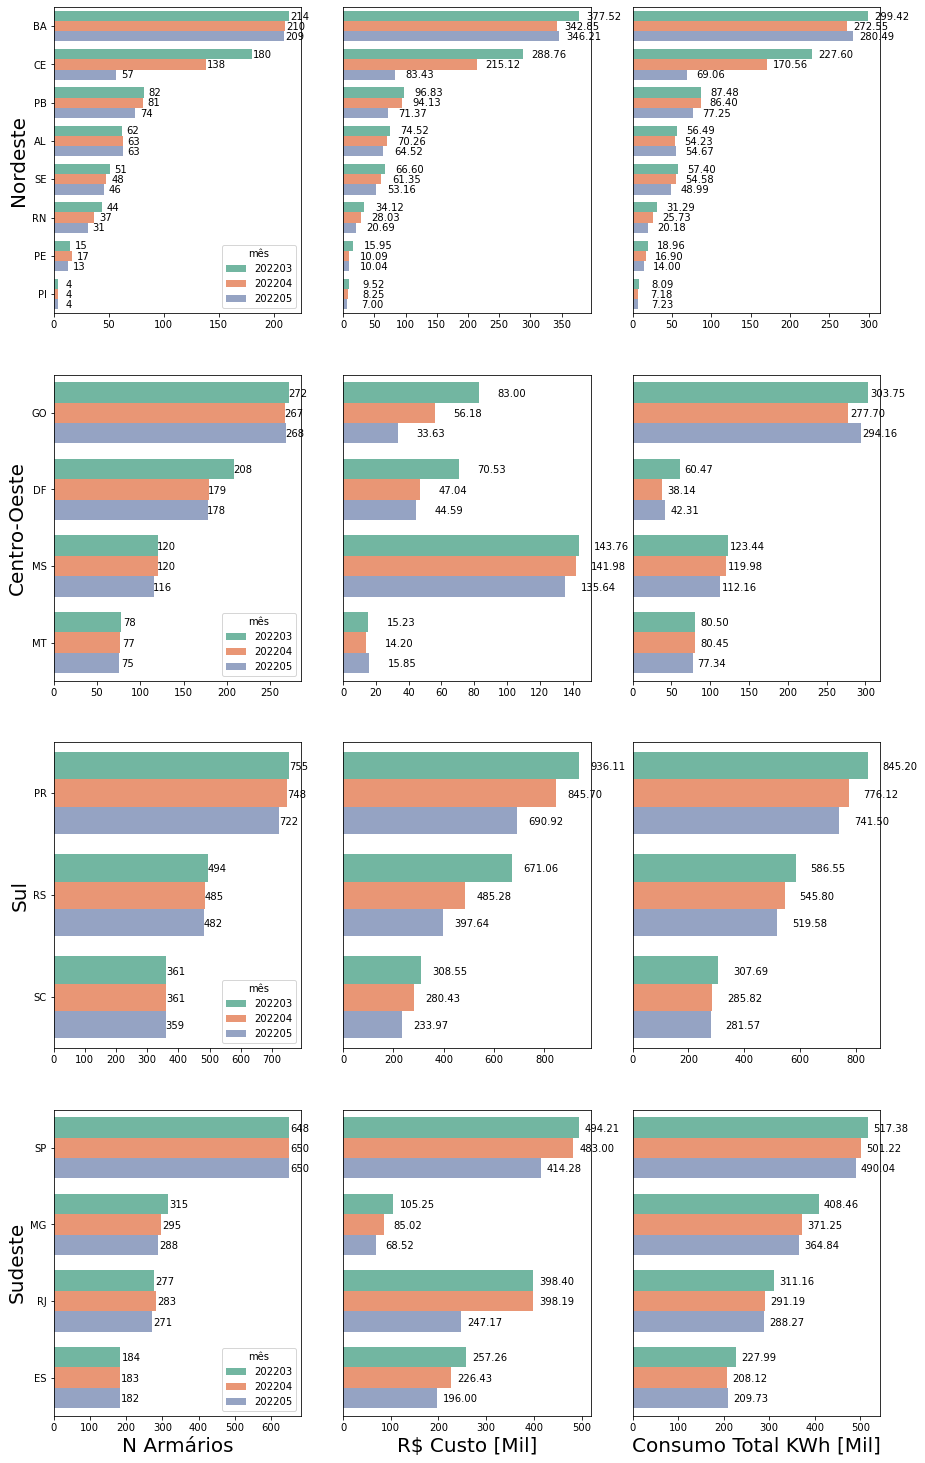

In [73]:
fig = plt.figure(figsize=(20,80))
plt.subplots_adjust(wspace=0.17)


#### Nordeste 

#### Fig A
plot = plt.subplot(12, 4, 1)

ax = sns.barplot(
    x='contagem', 
    y='uf', hue = 'mês', 
    data=df.loc[df['macroregiao'] == 'NE'].sort_values(by='contagem', ascending=False),
    palette='Set2', orient='h'
)

for p in ax.patches:
    width = p.get_width()
    plt.text(10+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:.0f}'.format(width),
             ha='center', va='center')

plt.grid(False)
plt.ylabel("Nordeste")
plt.xlabel("")

ax.yaxis.label.set_size(20)



#### Fig C
plot = plt.subplot(12, 4, 2)

ax = sns.barplot(
    x=df['custo']/1000, 
    y='uf', hue = 'mês', 
    data=df.loc[df['macroregiao'] == 'NE'].sort_values(by='contagem', ascending=False),
    palette='Set2', orient='h'
)

for p in ax.patches:
    width = p.get_width()
    plt.text(40+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:.2f}'.format(width),
             ha='center', va='center')

plt.grid(False)
plt.ylabel("")
plt.xlabel("")
ax.get_yaxis().set_visible(False)
leg = plt.legend()

ax.get_legend().set_visible(False)

#### Fig D
plot = plt.subplot(12, 4, 3)

ax = sns.barplot(
    x=df['consumo']/1000, 
    y='uf', hue = 'mês', 
    data=df.loc[df['macroregiao'] == 'NE'].sort_values(by='contagem', ascending=False),
    palette='Set2', orient='h'
)

for p in ax.patches:
    width = p.get_width()
    plt.text(30+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:.2f}'.format(width),
             ha='center', va='center')

plt.grid(False)
plt.ylabel("")
plt.xlabel("")
ax.get_yaxis().set_visible(False)
leg = plt.legend()

ax.get_legend().set_visible(False)


#### Centro-Oeste 

#### Fig A
plot = plt.subplot(12, 4, 5)

ax = sns.barplot(
    x='contagem', 
    y='uf', hue = 'mês', 
    data=df.loc[df['macroregiao'] == 'CO'].sort_values(by='contagem', ascending=False),
    palette='Set2', orient='h'
)

for p in ax.patches:
    width = p.get_width()
    plt.text(10+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:.0f}'.format(width),
             ha='center', va='center')

plt.grid(False)
plt.ylabel("Centro-Oeste")
plt.xlabel("")

ax.yaxis.label.set_size(20)


#### Fig C
plot = plt.subplot(12, 4, 6)

ax = sns.barplot(
    x=df['custo']/1000, 
    y='uf', hue = 'mês', 
    data=df.loc[df['macroregiao'] == 'CO'].sort_values(by='contagem', ascending=False),
    palette='Set2', orient='h'
)

for p in ax.patches:
    width = p.get_width()
    plt.text(20+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:.2f}'.format(width),
             ha='center', va='center')

plt.grid(False)
plt.ylabel("")
plt.xlabel("")
ax.get_yaxis().set_visible(False)
leg = plt.legend()

ax.get_legend().set_visible(False)

#### Fig D
plot = plt.subplot(12, 4, 7)

ax = sns.barplot(
    x=df['consumo']/1000, 
    y='uf', hue = 'mês', 
    data=df.loc[df['macroregiao'] == 'CO'].sort_values(by='contagem', ascending=False),
    palette='Set2', orient='h'
)

for p in ax.patches:
    width = p.get_width()
    plt.text(25+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:.2f}'.format(width),
             ha='center', va='center')

plt.grid(False)
plt.ylabel("")
plt.xlabel("")
ax.get_yaxis().set_visible(False)
leg = plt.legend()

ax.get_legend().set_visible(False)

#### Sul

#### Fig A
plot = plt.subplot(12, 4, 9)

ax = sns.barplot(
    x='contagem', 
    y='uf', hue = 'mês', 
    data=df.loc[df['macroregiao'] == 'S'].sort_values(by='contagem', ascending=False),
    palette='Set2', orient='h'
)

for p in ax.patches:
    width = p.get_width()
    plt.text(30+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:.0f}'.format(width),
             ha='center', va='center')

plt.grid(False)
plt.ylabel("Sul")
plt.xlabel("")
ax.yaxis.label.set_size(20)

    
#### Fig C
plot = plt.subplot(12, 4, 10)

ax = sns.barplot(
    x=df['custo']/1000, 
    y='uf', hue = 'mês', 
    data=df.loc[df['macroregiao'] == 'S'].sort_values(by='contagem', ascending=False),
    palette='Set2', orient='h'
)

for p in ax.patches:
    width = p.get_width()
    plt.text(115+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:.2f}'.format(width),
             ha='center', va='center')

plt.grid(False)
plt.ylabel("")
plt.xlabel("")
ax.get_yaxis().set_visible(False)
leg = plt.legend()

ax.get_legend().set_visible(False)

#### Fig D
plot = plt.subplot(12, 4, 11)

ax = sns.barplot(
    x=df['consumo']/1000, 
    y='uf', hue = 'mês', 
    data=df.loc[df['macroregiao'] == 'S'].sort_values(by='contagem', ascending=False),
    palette='Set2', orient='h'
)

for p in ax.patches:
    width = p.get_width()
    plt.text(115+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:.2f}'.format(width),
             ha='center', va='center')

plt.grid(False)
plt.ylabel("")
plt.xlabel("")
ax.get_yaxis().set_visible(False)
leg = plt.legend()

ax.get_legend().set_visible(False)    
    

#### Sudeste

#### Fig A
plot = plt.subplot(12, 4, 13)

ax = sns.barplot(
    x='contagem', 
    y='uf', hue = 'mês', 
    data=df.loc[df['macroregiao'] == 'SE'].sort_values(by='contagem', ascending=False),
    palette='Set2', orient='h'
)

for p in ax.patches:
    width = p.get_width()
    plt.text(30+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:.0f}'.format(width),
             ha='center', va='center')

plt.grid(False)
plt.ylabel("Sudeste")
plt.xlabel("N Armários")
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)


#### Fig C
plot = plt.subplot(12, 4, 14)

ax = sns.barplot(
    x=df['custo']/1000, 
    y='uf', hue = 'mês', 
    data=df.loc[df['macroregiao'] == 'SE'].sort_values(by='contagem', ascending=False),
    palette='Set2', orient='h'
)

for p in ax.patches:
    width = p.get_width()
    plt.text(50+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:.2f}'.format(width),
             ha='center', va='center')

plt.grid(False)
plt.ylabel("")
plt.xlabel("R$ Custo [Mil]")
ax.get_yaxis().set_visible(False)
ax.xaxis.label.set_size(20)
leg = plt.legend()

ax.get_legend().set_visible(False)

#### Fig D
plot = plt.subplot(12, 4, 15)

ax = sns.barplot(
    x=df['consumo']/1000, 
    y='uf', hue = 'mês', 
    data=df.loc[df['macroregiao'] == 'SE'].sort_values(by='contagem', ascending=False),
    palette='Set2', orient='h'
)

for p in ax.patches:
    width = p.get_width()
    plt.text(50+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:.2f}'.format(width),
             ha='center', va='center')

plt.grid(False)
plt.ylabel("")
plt.xlabel("Consumo Total KWh [Mil]")
ax.get_yaxis().set_visible(False)
ax.xaxis.label.set_size(20)
leg = plt.legend()

ax.get_legend().set_visible(False)

del ax


plt.show()

In [100]:
df_media = pd.DataFrame()

df_media['media_custo'] = df['custo']/df['contagem']
df_media['media_consumo'] = df['consumo']/df['contagem']
df_media['uf'] = df['uf']
df_media['macroregiao'] = df['macroregiao']
df_media['mes'] = df['mes']
df_media['contagem'] = df['contagem']

df_media

media_custo  media_consumo  uf macroregiao     mes  contagem
0   1382.211667    1542.838333  GO          CO  202205         6
1    211.353600    1031.186667  MT          CO  202205        75
2   1169.286983     966.870690  MS          CO  202205       116
3    250.514551     237.713483  DF          CO  202205       178
4   2063.190000    1776.000000  AM           N  202205         1
5   1750.242500    1806.750000  PI          NE  202205         4
6    772.616154    1077.230769  PE          NE  202205        13
7    667.319677     650.903226  RN          NE  202205        31
8   1155.545217    1065.065217  SE          NE  202205        46
9   1463.653509    1211.649123  CE          NE  202205        57
10  1024.079524     867.857143  AL          NE  202205        63
11   964.497297    1043.918919  PB          NE  202205        74
12  1656.520335    1342.043062  BA          NE  202205       209
13   651.739916     784.317549  SC           S  202205       359
14   824.980934    1077.970622  RS           S  202205       482
15   956.950402    1027.009695  PR           S  202205       722
16  1076.916758    1152.384615  ES          SE  202205       182
17   912.067417    1063.712177  RJ          SE  202205       271
18   237.920174    1266.795139  MG          SE  202205       288
19   637.355877     753.908615  SP          SE  202205       650
20   373.965000    1146.250000  GO          CO  202204         4
21   184.422338    1044.844156  MT          CO  202204        77
22  1183.187000     999.841667  MS          CO  202204       120
23   262.773575     213.083799  DF          CO  202204       179
24  2414.340000    1882.000000  AM           N  202204         1
25  2063.162500    1795.250000  PI          NE  202204         4
26   593.792941     994.058824  PE          NE  202204        17
27   757.572432     695.432432  RN          NE  202204        37
28  1278.161042    1137.125000  SE          NE  202204        48
29  1558.818333    1235.963768  CE          NE  202204       138
30  1115.168889     860.761905  AL          NE  202204        63
31  1162.145926    1066.641975  PB          NE  202204        81
32  1632.614667    1297.866667  BA          NE  202204       210
33   776.819335     791.753463  SC           S  202204       361
34  1000.578866    1125.356062  RS           S  202204       485
35  1130.621578    1037.598930  PR           S  202204       748
36  1237.331585    1137.262295  ES          SE  202204       183
37  1407.042297    1028.929329  RJ          SE  202204       283
38   288.211424    1258.477966  MG          SE  202204       295
39   743.069354     771.115077  SP          SE  202204       650
40  1321.487500    1669.695000  GO          CO  202203         4
41   195.263974    1032.076923  MT          CO  202203        78
42  1197.999417    1028.691667  MS          CO  202203       120
43   339.084327     290.697115  DF          CO  202203       208
44  2278.410000    1680.000000  AM           N  202203         1
45  2378.762500    2021.250000  PI          NE  202203         4
46  1063.226667    1264.133333  PE          NE  202203        15
47   775.383864     711.159091  RN          NE  202203        44
48  1305.912549    1125.411765  SE          NE  202203        51
49  1604.200333    1264.450000  CE          NE  202203       180
50  1201.906774     911.161290  AL          NE  202203        62
51  1180.825488    1066.829268  PB          NE  202203        82
52  1764.109159    1399.163551  BA          NE  202203       214
53   854.700055     852.340720  SC           S  202203       361
54  1358.414109    1187.351235  RS           S  202203       494
55  1239.880093    1119.470199  PR           S  202203       755
56  1398.126685    1239.092391  ES          SE  202203       184
57  1438.255740    1123.321300  RJ          SE  202203       277
58   334.127587    1296.695238  MG          SE  202203       315
59   762.674120     798.427778  SP          SE  202203       648

In [148]:
df

contagem    faturado     consumo     mês  uf Macroregiao
0          9    17709.51    19304.03  202205  GO          CO
1         78    16034.58    77339.00  202205  MT          CO
2        119   166297.42   208027.39  202205  MS          CO
3        229    54287.22    44871.00  202205  DF          CO
4          1     2063.19     1776.00  202205  AM           N
5          4     7000.97     7227.00  202205  PI          NE
6         14    14684.69    20120.00  202205  PE          NE
7         33    43060.96    50257.90  202205  RN          NE
8         47    53201.84    48993.00  202205  SE          NE
9         57    83428.25    69064.00  202205  CE          NE
10        65    69398.31    59132.00  202205  AL          NE
11        75    75133.37    81402.00  202205  PB          NE
12       212   346506.14   280737.00  202205  BA          NE
13       391   299863.77   365644.00  202205  SC           S
14       525   771594.33   978247.05  202205  RS           S
15       743   832255.50   919985.00  202205  PR           S
16       192   225717.41   242222.00  202205  ES          SE
17       287   305156.81   336587.00  202205  RJ          SE
18       309    74956.63   402692.00  202205  MG          SE
19       672   452054.61   543604.29  202205  SP          SE
20         8    14013.80    16152.00  202204  GO          CO
21        81    14378.31    80453.00  202204  MT          CO
22       124   173619.68   219890.54  202204  MS          CO
23       237    58939.38    40815.00  202204  DF          CO
24         1     2414.34     1882.00  202204  AM           N
25         4     8252.65     7181.00  202204  PI          NE
26        18    14291.80    22915.00  202204  PE          NE
27        38    65386.39    69576.63  202204  RN          NE
28        50    61491.68    54582.00  202204  SE          NE
29       138   215116.93   170563.00  202204  CE          NE
30        65    70412.08    54288.00  202204  AL          NE
31        82    94163.98    86398.00  202204  PB          NE
32       212   343027.01   272702.00  202204  BA          NE
33       394   364270.14   375800.00  202204  SC           S
34       542   918613.28  1020875.17  202204  RS           S
35       772  1024404.16   971690.00  202204  PR           S
36       192   258517.57   238925.00  202204  ES          SE
37       299   460868.66   340642.00  202204  RJ          SE
38       314    90860.15   406841.00  202204  MG          SE
39       667   526295.29   557208.66  202204  SP          SE
40         7    17868.20    17157.78  202203  GO          CO
41        81    15402.43    80502.00  202203  MT          CO
42       124   170864.80   215186.00  202203  MS          CO
43       239    76889.90    61986.00  202203  DF          CO
44         1     2278.41     1680.00  202203  AM           N
45         4     9515.05     8085.00  202203  PI          NE
46        17    21917.49    25539.00  202203  PE          NE
47        45    69502.38    71886.37  202203  RN          NE
48        51    66601.54    57396.00  202203  SE          NE
49       181   288792.57   227631.00  202203  CE          NE
50        65    80273.70    60956.00  202203  AL          NE
51        83   101622.25    91858.00  202203  PB          NE
52       216   377698.25   299571.00  202203  BA          NE
53       395   414220.79   418680.00  202203  SC           S
54       545  1121534.62  1046729.06  202203  RS           S
55       779  1111987.65  1032196.53  202203  PR           S
56       192   290636.51   258571.00  202203  ES          SE
57       296   472478.81   364740.00  202203  RJ          SE
58       334   111290.66   448108.00  202203  MG          SE
59       668   555995.39   589249.94  202203  SP          SE

In [10]:
df_mediana = pd.read_csv(PATH + 'mediana_estados_03_04_05.txt', sep = '\t')
df_mediana

contagem  mediana_consumo  mediana_custo     mes macroregiao  uf
0        208            194.0          208.0  202203          CO  DF
1        272           1023.0           51.0  202203          CO  GO
2        120            932.0         1086.0  202203          CO  MS
3         78            981.5          134.0  202203          CO  MT
4         62            802.0         1082.5  202203          NE  AL
5        214           1244.0         1591.5  202203          NE  BA
6        180           1254.5         1639.0  202203          NE  CE
7         82           1076.0         1184.0  202203          NE  PB
8         15           1137.0          987.0  202203          NE  PE
9          4           2026.5         2384.5  202203          NE  PI
10        44            647.0          705.5  202203          NE  RN
11        51           1067.0         1262.0  202203          NE  SE
12       755           1042.0         1161.0  202203           S  PR
13       494            963.5         1093.5  202203           S  RS
14       361            650.5          653.0  202203           S  SC
15       184           1249.0         1418.5  202203          SE  ES
16       315           1258.0          255.5  202203          SE  MG
17       277            987.5         1256.5  202203          SE  RJ
18       648            702.0          653.5  202203          SE  SP
19       179            123.5          152.0  202204          CO  DF
20       267            956.0           52.0  202204          CO  GO
21       120            920.0         1070.0  202204          CO  MS
22        77           1004.0          134.0  202204          CO  MT
23        63            780.0         1009.0  202204          NE  AL
24       210           1153.5         1489.5  202204          NE  BA
25       138           1242.0         1583.0  202204          NE  CE
26        81            995.0         1112.0  202204          NE  PB
27        17           1030.0          524.0  202204          NE  PE
28         4           1754.0         2039.0  202204          NE  PI
29        37            696.0          765.0  202204          NE  RN
30        48           1034.0         1146.0  202204          NE  SE
31       748            957.0         1048.0  202204           S  PR
32       485            932.0          868.5  202204           S  RS
33       361            611.5          603.0  202204           S  SC
34       183           1129.0         1231.0  202204          SE  ES
35       295           1222.0          239.5  202204          SE  MG
36       283            945.5         1300.0  202204          SE  RJ
37       650            670.5          646.0  202204          SE  SP
38       178            145.0          153.0  202205          CO  DF
39       268           1015.0           42.0  202205          CO  GO
40       116            878.0         1070.0  202205          CO  MS
41        75            972.0          152.0  202205          CO  MT
42        63            815.0          974.0  202205          NE  AL
43       209           1186.0         1494.0  202205          NE  BA
44        57           1202.5         1509.0  202205          NE  CE
45        74           1083.0         1019.0  202205          NE  PB
46        13           1195.0          783.0  202205          NE  PE
47         4           1842.0         1793.5  202205          NE  PI
48        31            580.0          591.0  202205          NE  RN
49        46           1043.0         1113.0  202205          NE  SE
50       722            953.0          890.0  202205           S  PR
51       482            902.0          694.0  202205           S  RS
52       359            620.0          511.5  202205           S  SC
53       182           1145.0         1086.5  202205          SE  ES
54       288           1220.0          189.0  202205          SE  MG
55       271            975.0          563.0  202205          SE  RJ
56       650            659.5          549.0  202205          SE  SP

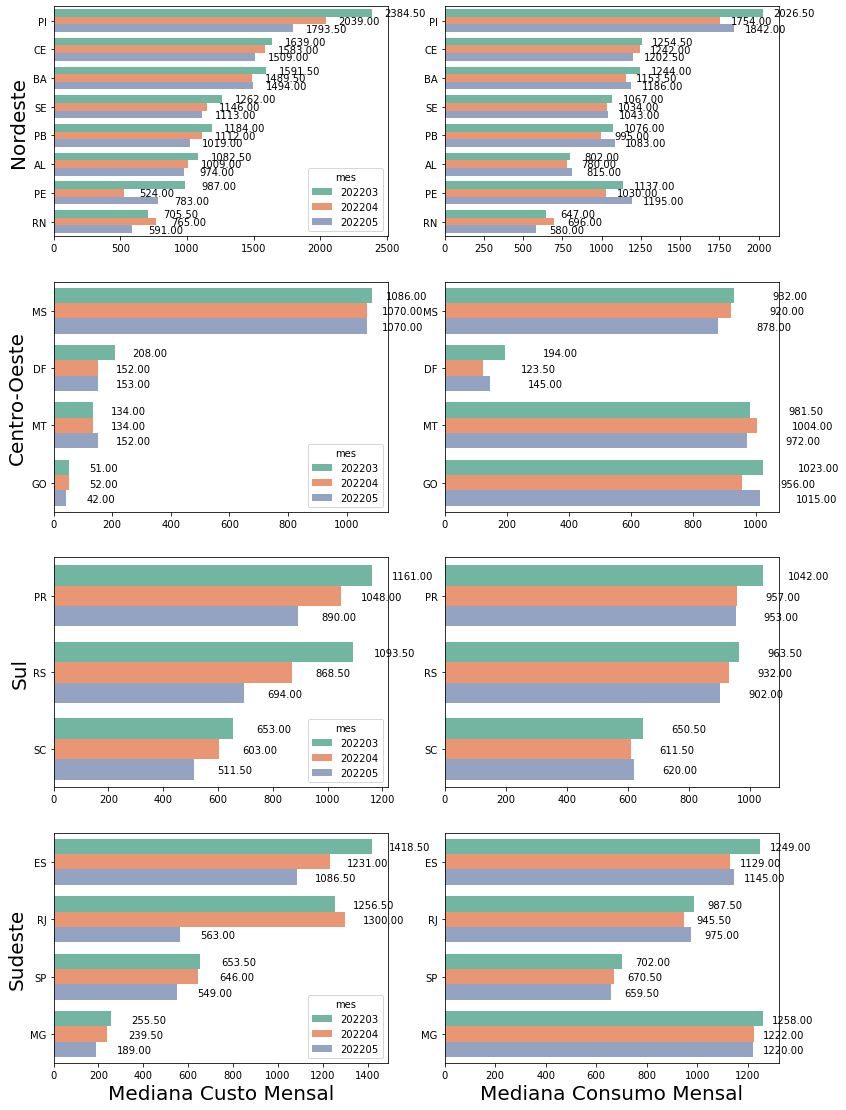

In [8]:
fig = plt.figure(figsize=(20,60))
plt.subplots_adjust(wspace=0.17)


#### Nordeste 

#### Fig A
plot = plt.subplot(12, 3, 1)

ax = sns.barplot(
    x='mediana_custo', 
    y='uf', hue = 'mes', 
    data=df_mediana.loc[df_mediana['macroregiao'] == 'NE'].sort_values(by='mediana_custo', ascending=False),
    palette='Set2', orient='h'
)

for p in ax.patches:
    width = p.get_width()
    plt.text(250+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:.2f}'.format(width),
             ha='center', va='center')

plt.grid(False)
plt.ylabel("Nordeste")
plt.xlabel("")

ax.yaxis.label.set_size(20)

#### Fig B
plot = plt.subplot(12, 3, 2)

ax = sns.barplot(
    x='mediana_consumo', 
    y='uf', hue = 'mes', 
    data=df_mediana.loc[df_mediana['macroregiao'] == 'NE'].sort_values(by='mediana_custo', ascending=False),
    palette='Set2', orient='h'
)

for p in ax.patches:
    width = p.get_width()
    plt.text(200+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:.2f}'.format(width),
             ha='center', va='center')

plt.grid(False)
plt.ylabel("")
plt.xlabel("")
leg = plt.legend()

ax.get_legend().set_visible(False)


#### Centro-Oeste 

#### Fig A
plot = plt.subplot(12, 3, 4)

ax = sns.barplot(
    x='mediana_custo', 
    y='uf', hue = 'mes', 
    data=df_mediana.loc[df_mediana['macroregiao'] == 'CO'].sort_values(by='mediana_custo', ascending=False),
    palette='Set2', orient='h'
)

for p in ax.patches:
    width = p.get_width()
    plt.text(120+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:.2f}'.format(width),
             ha='center', va='center')

plt.grid(False)
plt.ylabel("Centro-Oeste")
plt.xlabel("")

ax.yaxis.label.set_size(20)

#### Fig B
plot = plt.subplot(12, 3, 5)

ax = sns.barplot(
    x='mediana_consumo', 
    y='uf', hue = 'mes', 
    data=df_mediana.loc[df_mediana['macroregiao'] == 'CO'].sort_values(by='mediana_custo', ascending=False),
    palette='Set2', orient='h'
)

for p in ax.patches:
    width = p.get_width()
    plt.text(180+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:.2f}'.format(width),
             ha='center', va='center')

plt.grid(False)
plt.ylabel("")
plt.xlabel("")
leg = plt.legend()

ax.get_legend().set_visible(False)

#### Sul

#### Fig A
plot = plt.subplot(12, 3, 7)

ax = sns.barplot(
    x='mediana_custo', 
    y='uf', hue = 'mes', 
    data=df_mediana.loc[df_mediana['macroregiao'] == 'S'].sort_values(by='mediana_custo', ascending=False),
    palette='Set2', orient='h'
)

for p in ax.patches:
    width = p.get_width()
    plt.text(150+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:.2f}'.format(width),
             ha='center', va='center')

plt.grid(False)
plt.ylabel("Sul")
plt.xlabel("")
ax.yaxis.label.set_size(20)

#### Fig B
plot = plt.subplot(12, 3, 8)

ax = sns.barplot(
    x='mediana_consumo', 
    y='uf', hue = 'mes', 
    data=df_mediana.loc[df_mediana['macroregiao'] == 'S'].sort_values(by='mediana_custo', ascending=False),
    palette='Set2', orient='h'
)

for p in ax.patches:
    width = p.get_width()
    plt.text(150+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:.2f}'.format(width),
             ha='center', va='center')

plt.grid(False)
plt.ylabel("")
plt.xlabel("")
leg = plt.legend()

ax.get_legend().set_visible(False)    

#### Sudeste

#### Fig A
plot = plt.subplot(12, 3, 10)

ax = sns.barplot(
    x='mediana_custo', 
    y='uf', hue = 'mes', 
    data=df_mediana.loc[df_mediana['macroregiao'] == 'SE'].sort_values(by='mediana_custo', ascending=False),
    palette='Set2', orient='h'
)

for p in ax.patches:
    width = p.get_width()
    plt.text(170+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:.2f}'.format(width),
             ha='center', va='center')

plt.grid(False)
plt.ylabel("Sudeste")
plt.xlabel("Mediana Custo Mensal")
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)

#### Fig B
plot = plt.subplot(12, 3, 11)

ax = sns.barplot(
    x='mediana_consumo', 
    y='uf', hue = 'mes', 
    data=df_mediana.loc[df_mediana['macroregiao'] == 'SE'].sort_values(by='mediana_custo', ascending=False),
    palette='Set2', orient='h'
)

for p in ax.patches:
    width = p.get_width()
    plt.text(120+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:.2f}'.format(width),
             ha='center', va='center')

plt.grid(False)
plt.ylabel("")
plt.xlabel("Mediana Consumo Mensal")
ax.xaxis.label.set_size(20)
leg = plt.legend()

ax.get_legend().set_visible(False)

del ax

In [ ]:
fig = plt.figure(figsize=(20,60))
plt.subplots_adjust(wspace=0.17)


#### Nordeste 

#### Fig A
plot = plt.subplot(12, 3, 1)

ax = sns.barplot(
    x='media_custo', 
    y='uf', hue = 'mes', 
    data=df_media.loc[df_media['macroregiao'] == 'NE'].sort_values(by='media_custo', ascending=False),
    palette='Set2', orient='h'
)

for p in ax.patches:
    width = p.get_width()
    plt.text(250+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:.2f}'.format(width),
             ha='center', va='center')

plt.grid(False)
plt.ylabel("Nordeste")
plt.xlabel("")

ax.yaxis.label.set_size(20)

#### Fig B
plot = plt.subplot(12, 3, 2)

ax = sns.barplot(
    x='media_consumo', 
    y='uf', hue = 'mes', 
    data=df_media.loc[df_media['macroregiao'] == 'NE'].sort_values(by='media_custo', ascending=False),
    palette='Set2', orient='h'
)

for p in ax.patches:
    width = p.get_width()
    plt.text(200+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:.2f}'.format(width),
             ha='center', va='center')

plt.grid(False)
plt.ylabel("")
plt.xlabel("")
leg = plt.legend()

ax.get_legend().set_visible(False)


#### Centro-Oeste 

#### Fig A
plot = plt.subplot(12, 3, 4)

ax = sns.barplot(
    x='media_custo', 
    y='uf', hue = 'mes', 
    data=df_media.loc[df_media['macroregiao'] == 'CO'].sort_values(by='media_custo', ascending=False),
    palette='Set2', orient='h'
)

for p in ax.patches:
    width = p.get_width()
    plt.text(120+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:.2f}'.format(width),
             ha='center', va='center')

plt.grid(False)
plt.ylabel("Centro-Oeste")
plt.xlabel("")

ax.yaxis.label.set_size(20)

#### Fig B
plot = plt.subplot(12, 3, 5)

ax = sns.barplot(
    x='media_consumo', 
    y='uf', hue = 'mes', 
    data=df_media.loc[df_media['macroregiao'] == 'CO'].sort_values(by='media_custo', ascending=False),
    palette='Set2', orient='h'
)

for p in ax.patches:
    width = p.get_width()
    plt.text(180+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:.2f}'.format(width),
             ha='center', va='center')

plt.grid(False)
plt.ylabel("")
plt.xlabel("")
leg = plt.legend()

ax.get_legend().set_visible(False)

#### Sul

#### Fig A
plot = plt.subplot(12, 3, 7)

ax = sns.barplot(
    x='media_custo', 
    y='uf', hue = 'mes', 
    data=df_media.loc[df_media['macroregiao'] == 'S'].sort_values(by='media_custo', ascending=False),
    palette='Set2', orient='h'
)

for p in ax.patches:
    width = p.get_width()
    plt.text(150+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:.2f}'.format(width),
             ha='center', va='center')

plt.grid(False)
plt.ylabel("Sul")
plt.xlabel("")
ax.yaxis.label.set_size(20)

#### Fig B
plot = plt.subplot(12, 3, 8)

ax = sns.barplot(
    x='media_consumo', 
    y='uf', hue = 'mes', 
    data=df_media.loc[df_media['macroregiao'] == 'S'].sort_values(by='media_custo', ascending=False),
    palette='Set2', orient='h'
)

for p in ax.patches:
    width = p.get_width()
    plt.text(150+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:.2f}'.format(width),
             ha='center', va='center')

plt.grid(False)
plt.ylabel("")
plt.xlabel("")
leg = plt.legend()

ax.get_legend().set_visible(False)    

#### Sudeste

#### Fig A
plot = plt.subplot(12, 3, 10)

ax = sns.barplot(
    x='media_custo', 
    y='uf', hue = 'mes', 
    data=df_media.loc[df_media['macroregiao'] == 'SE'].sort_values(by='media_custo', ascending=False),
    palette='Set2', orient='h'
)

for p in ax.patches:
    width = p.get_width()
    plt.text(170+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:.2f}'.format(width),
             ha='center', va='center')

plt.grid(False)
plt.ylabel("Sudeste")
plt.xlabel("Média Custo Mensal")
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)

#### Fig B
plot = plt.subplot(12, 3, 11)

ax = sns.barplot(
    x='media_consumo', 
    y='uf', hue = 'mes', 
    data=df_media.loc[df_media['macroregiao'] == 'SE'].sort_values(by='media_custo', ascending=False),
    palette='Set2', orient='h'
)

for p in ax.patches:
    width = p.get_width()
    plt.text(120+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:.2f}'.format(width),
             ha='center', va='center')

plt.grid(False)
plt.ylabel("")
plt.xlabel("Média Consumo Mensal")
ax.xaxis.label.set_size(20)
leg = plt.legend()

ax.get_legend().set_visible(False)

del ax

<Figure size 432x288 with 0 Axes>

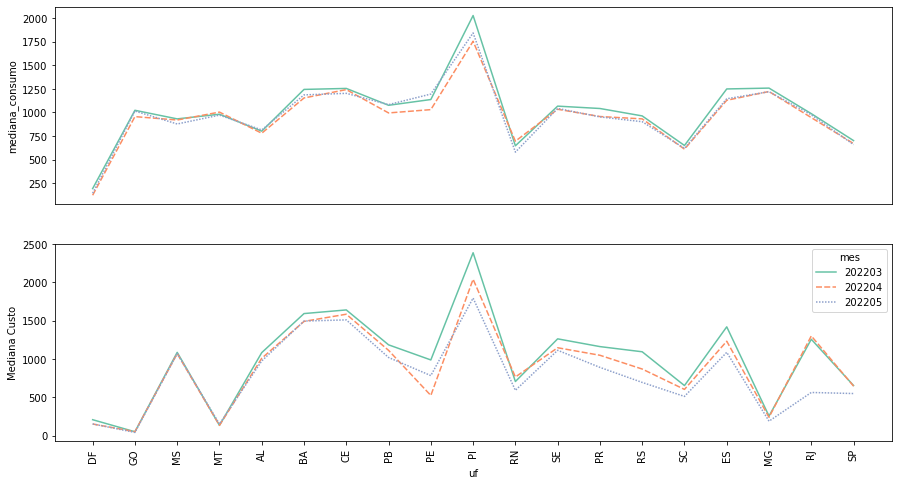

In [10]:
plt.subplots_adjust(wspace=0.17)
fig = plt.figure(figsize=(15,8))

#### Nordeste 

#### Fig A
plot = plt.subplot(2, 1, 1)
#fig = plt.figure(figsize=(15,5))

ax = sns.lineplot(data=df_mediana.loc[df_mediana['macroregiao']!='N'], x="uf", y="mediana_consumo", hue="mes", style="mes", palette="Set2")

plt.xticks(rotation=90)
plt.xlabel("")
plt.xticks("")
#plt.show()
leg = plt.legend()

ax.get_legend().set_visible(False)

plot = plt.subplot(2, 1, 2)
#fig = plt.figure(figsize=(15,5))

sns.lineplot(data=df_mediana.loc[df_mediana['macroregiao']!='N'], x="uf", y="mediana_custo", hue="mes", style="mes", palette="Set2")

plt.xticks(rotation=90)
plt.ylabel("Mediana Custo")
plt.show()

<Figure size 432x288 with 0 Axes>

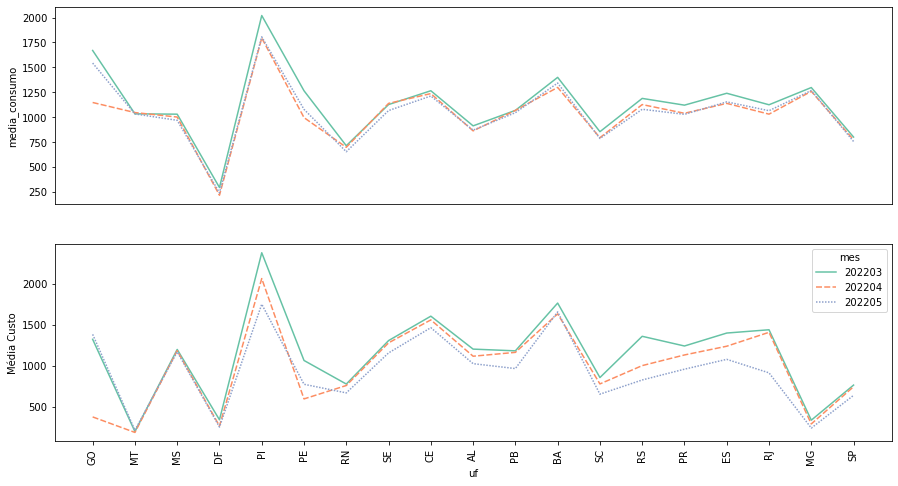

In [102]:
plt.subplots_adjust(wspace=0.17)
fig = plt.figure(figsize=(15,8))

#### Nordeste 

#### Fig A
plot = plt.subplot(2, 1, 1)
#fig = plt.figure(figsize=(15,5))

ax = sns.lineplot(data=df_media.loc[df_media['macroregiao']!='N'], x="uf", y="media_consumo", hue="mes", style="mes", palette="Set2")

plt.xticks(rotation=90)
plt.xlabel("")
plt.xticks("")
#plt.show()
leg = plt.legend()

ax.get_legend().set_visible(False)

plot = plt.subplot(2, 1, 2)
#fig = plt.figure(figsize=(15,5))

sns.lineplot(data=df_media.loc[df_media['macroregiao']!='N'], x="uf", y="media_custo", hue="mes", style="mes", palette="Set2")

plt.xticks(rotation=90)
plt.ylabel("Média Custo")
plt.show()

In [103]:
consumo_macroregioes = pd.read_csv(PATH + 'consumo_macroregioes.txt', sep = '\t')
consumo_macroregioes['mes'] = consumo_macroregioes['mes'].astype('string')
consumo_macroregioes.dtypes

contagem         int64
custo          float64
consumo        float64
mes             string
macroregiao     object
dtype: object

In [104]:
estados_armarios['consumo'].loc[estados_armarios['macroregiao'] == 'NE'].sum()

571878.0

In [105]:
consumo_macroregioes

contagem       custo     consumo     mes macroregiao
0         442   480234.46   651819.30  201701          NE
1        1621  1736961.80  2578865.00  201701           S
2         717   679924.46   979926.39  201701          CO
3        1534  1370699.86  1975685.45  201701          SE
4         726   652974.70   933461.28  201702          CO
..        ...         ...         ...     ...         ...
318       375   204373.67   241066.03  202205          CO
319         1     2063.19     1776.00  202205           N
320       497   656417.78   571878.00  202205          NE
321      1563  1322533.63  1542652.84  202205           S
322      1391   925971.45  1352877.60  202205          SE

[323 rows x 5 columns]

No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

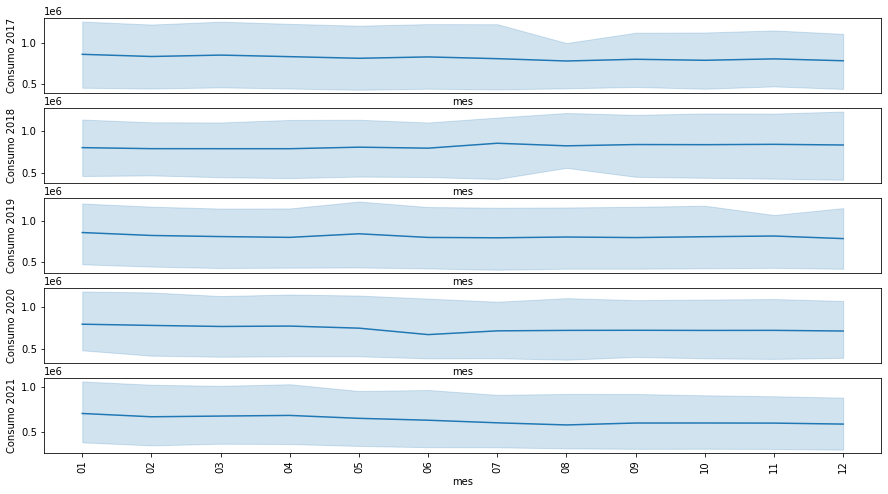

In [106]:
plt.subplots_adjust(wspace=0.17)
fig = plt.figure(figsize=(15,8))

#### Nordeste 

#### Fig A
plot = plt.subplot(5, 1, 1)
#fig = plt.figure(figsize=(15,5))

ax = sns.lineplot(data=dados_2017, x=dados_2017['mes'].dt.strftime('%m'), y="consumo", palette="Set2")

plt.xticks("")
plt.ylabel("Consumo 2017")
leg = plt.legend()

ax.get_legend().set_visible(False)

plot = plt.subplot(5, 1, 2)
#fig = plt.figure(figsize=(15,5))

sns.lineplot(data=dados_2018, x=dados_2018['mes'].dt.strftime('%m'), y="consumo", palette="Set2")

plt.xticks("")
plt.ylabel("Consumo 2018")

plot = plt.subplot(5, 1, 3)
#fig = plt.figure(figsize=(15,5))

sns.lineplot(data=dados_2019, x=dados_2019['mes'].dt.strftime('%m'), y="consumo", palette="Set2")

plt.xticks("")
plt.ylabel("Consumo 2019")

plot = plt.subplot(5, 1, 4)
#fig = plt.figure(figsize=(15,5))

sns.lineplot(data=dados_2020, x=dados_2020['mes'].dt.strftime('%m'), y="consumo", palette="Set2")

plt.xticks("")
plt.ylabel("Consumo 2020")

plot = plt.subplot(5, 1, 5)
#fig = plt.figure(figsize=(15,5))

sns.lineplot(data=dados_2021, x=dados_2021['mes'].dt.strftime('%m'), y="consumo", palette="Set2")

plt.xticks(rotation=90)
plt.ylabel("Consumo 2021")


plt.show()

In [107]:
consumo_macroregioes = pd.read_csv(PATH + 'consumo_macroregioes.txt', sep = '\t')
consumo_macroregioes['mes'] = consumo_macroregioes['mes'].astype('string')
consumo_macroregioes.dtypes

contagem         int64
custo          float64
consumo        float64
mes             string
macroregiao     object
dtype: object

<Figure size 432x288 with 0 Axes>

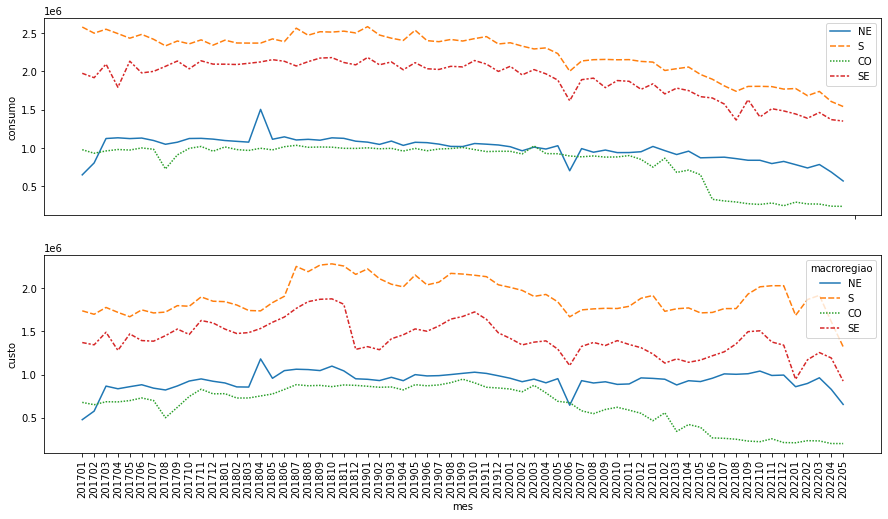

In [108]:
plt.subplots_adjust(wspace=0.17)
fig = plt.figure(figsize=(15,8))


plot = plt.subplot(2, 1, 1)
sns.lineplot(data=consumo_macroregioes.loc[consumo_macroregioes['macroregiao']!='N'], x="mes", y="consumo", hue="macroregiao", style="macroregiao")
plt.xticks(rotation=90)
plt.xlabel("")
plt.xticks("")
#plt.show()
leg = plt.legend()

ax.get_legend().set_visible(False)


plot = plt.subplot(2, 1, 2)
sns.lineplot(data=consumo_macroregioes.loc[consumo_macroregioes['macroregiao']!='N'], x="mes", y="custo", hue="macroregiao", style="macroregiao")
plt.xticks(rotation=90)
plt.show()


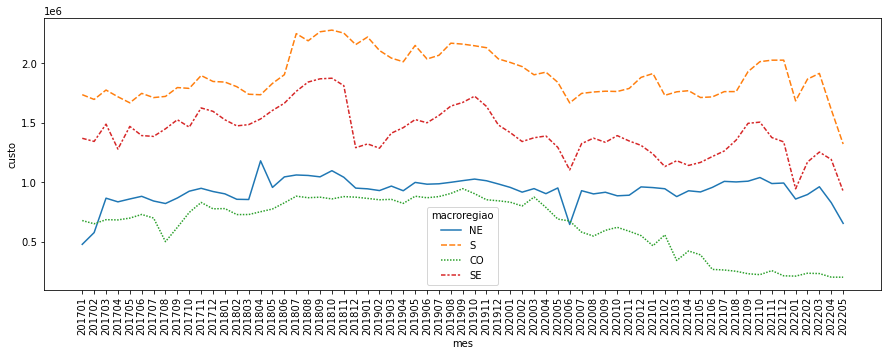

In [109]:
fig = plt.figure(figsize=(15,5))

sns.lineplot(data=consumo_macroregioes.loc[consumo_macroregioes['macroregiao']!='N'], x="mes", y="custo", hue="macroregiao", style="macroregiao")
plt.xticks(rotation=90)
plt.show()

In [110]:
mediana = pd.read_csv(PATH + 'mediana_03_04_05.txt', sep = '\t')
mediana

contagem  mediana_consumo  mediana_custo     mes macroregiao
0        410            554.0          245.0  202203          CO
1        652           1147.0         1443.0  202203          NE
2       1610            962.0         1059.0  202203           S
3       1424            938.0          741.5  202203          SE
4        380            605.0          177.0  202204          CO
5        598           1074.0         1301.0  202204          NE
6       1594            891.0          932.0  202204           S
7       1411            892.0          705.0  202204          SE
8        375            591.0          173.0  202205          CO
9        497           1095.0         1251.0  202205          NE
10      1563            885.0          770.5  202205           S
11      1391            885.5          512.5  202205          SE

<Figure size 432x288 with 0 Axes>

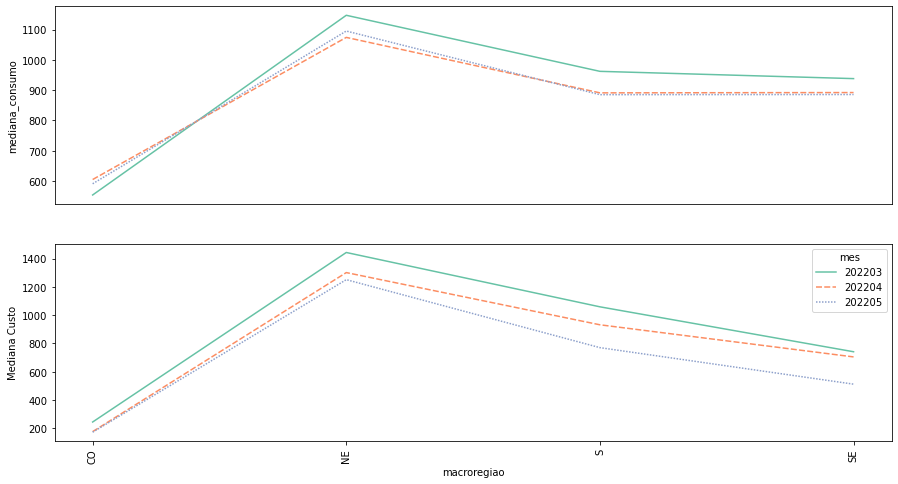

In [111]:
plt.subplots_adjust(wspace=0.17)
fig = plt.figure(figsize=(15,8))

#### Nordeste 

#### Fig A
plot = plt.subplot(2, 1, 1)
#fig = plt.figure(figsize=(15,5))

ax = sns.lineplot(data=mediana.loc[mediana['macroregiao']!='N'], x="macroregiao", y="mediana_consumo", hue="mes", style="mes", palette="Set2")

plt.xticks(rotation=90)
plt.xlabel("")
plt.xticks("")
#plt.show()
leg = plt.legend()

ax.get_legend().set_visible(False)

plot = plt.subplot(2, 1, 2)
#fig = plt.figure(figsize=(15,5))

sns.lineplot(data=mediana.loc[mediana['macroregiao']!='N'], x="macroregiao", y="mediana_custo", hue="mes", style="mes", palette="Set2")

plt.xticks(rotation=90)
plt.ylabel("Mediana Custo")
plt.show()

In [112]:
PATH = "../Dados/"
armarios_co = pd.read_csv(PATH + 'contagem_produtos_porarmario.txt', sep = '\t')
mapeamento_armario = pd.read_csv(PATH + 'mapeamento_armario_sigla.txt', sep = '\t')
lista_co = 'MT', 'MS', 'GO', 'DF'
co = armarios_co.merge(mapeamento_armario.query('UF in @lista_co'), on= 'ARMARIO')
co

ARMARIO STATUS_ARMARIO   BL   LN  TV  Total Geral  UF UF_SIGLA
0    DFBSA_O1A01          ATIVO   89  262   0          351  DF    DFG98
1    DFBSA_O1A02          ATIVO  139  259   6          404  DF    DFG99
2    DFBSA_O1A0Q          ATIVO   80  105   1          186  DF    DFQ03
3    DFBSA_O1A0S          ATIVO  156  191  31          378  DF    DFQ04
4    DFBSA_O1A0U          ATIVO   12   28   1           41  DF    DFQ06
..           ...            ...  ...  ...  ..          ...  ..      ...
645  MTVAZ_O1B04          ATIVO  101  139   0          240  MT    MTG26
646  MTVAZ_O1B05          ATIVO   27   74   0          101  MT    MTG18
647  MTVAZ_O1B06          ATIVO  102  107   0          209  MT    MTG27
648  MTVAZ_O1B07          ATIVO  121  141   0          262  MT    MTG21
649  MTVAZ_O1B08          ATIVO  318  330   0          648  MT    MTG23

[650 rows x 8 columns]

In [113]:
co.groupby('UF')['BL', 'LN', 'TV'].sum()

C:\Users\TALMEI~1\AppData\Local\Temp/ipykernel_1332/1844590496.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  co.groupby('UF')['BL', 'LN', 'TV'].sum()


BL     LN    TV
UF                    
DF  34214  45495  3870
GO  37336  51905  3315
MS  15232  19493   820
MT   7654  11649     0

In [114]:
co.loc[co['UF'] == 'DF']

ARMARIO STATUS_ARMARIO   BL   LN  TV  Total Geral  UF UF_SIGLA
0    DFBSA_O1A01          ATIVO   89  262   0          351  DF    DFG98
1    DFBSA_O1A02          ATIVO  139  259   6          404  DF    DFG99
2    DFBSA_O1A0Q          ATIVO   80  105   1          186  DF    DFQ03
3    DFBSA_O1A0S          ATIVO  156  191  31          378  DF    DFQ04
4    DFBSA_O1A0U          ATIVO   12   28   1           41  DF    DFQ06
..           ...            ...  ...  ...  ..          ...  ..      ...
228  DFTAGAO1B69          ATIVO  140  151  16          307  DF    DFG62
229  DFTAGAO1B70          ATIVO  236  251  19          506  DF    DFG63
230  DFTAGAO1B71          ATIVO  182  192  25          399  DF    DFG45
231  DFTAGAO1B72          ATIVO  114  121  11          246  DF    DFG93
232  DFTAGAO1I01          ATIVO   83  141   6          230  DF    DFV97

[233 rows x 8 columns]

In [115]:
teste = co.groupby('UF')['BL', 'LN', 'TV'].sum()
teste.reset_index(inplace=True)
teste.to_csv(PATH + 'distribuicao_produtos_co.txt', index = False)

C:\Users\TALMEI~1\AppData\Local\Temp/ipykernel_1332/2449703415.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  teste = co.groupby('UF')['BL', 'LN', 'TV'].sum()


In [116]:
teste = co.groupby('UF')['BL', 'LN', 'TV'].sum()
teste = teste.reset_index()
teste

C:\Users\TALMEI~1\AppData\Local\Temp/ipykernel_1332/2139192194.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  teste = co.groupby('UF')['BL', 'LN', 'TV'].sum()


UF     BL     LN    TV
0  DF  34214  45495  3870
1  GO  37336  51905  3315
2  MS  15232  19493   820
3  MT   7654  11649     0

In [117]:
teste = co.groupby('UF')['BL', 'LN', 'TV'].sum()
teste = teste.reset_index()
teste.to_csv(PATH + 'Armarios/distribucao_produtos.txt', index = False)

C:\Users\TALMEI~1\AppData\Local\Temp/ipykernel_1332/249619593.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  teste = co.groupby('UF')['BL', 'LN', 'TV'].sum()


In [118]:
teste = pd.read_csv(PATH + 'Armarios/distribucao_produtos.txt', sep = ',')
teste

UF     BL     LN    TV
0  DF  34214  45495  3870
1  GO  37336  51905  3315
2  MS  15232  19493   820
3  MT   7654  11649     0

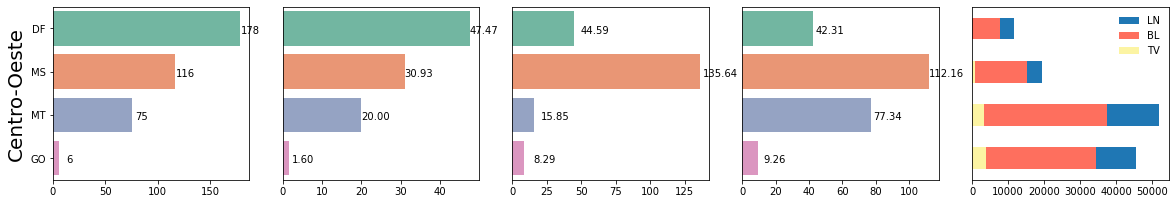

In [119]:
fig = plt.figure(figsize=(17,10))
plt.subplots_adjust(wspace=0.17)


#### Centro-Oeste 

#### Fig A
plot = plt.subplot(2, 5, 1)

ax = sns.barplot(
    x='contagem', 
    y='uf', 
    data=estados_armarios.loc[estados_armarios['macroregiao'] == 'CO'].sort_values(by='contagem', ascending=False),
    palette='Set2', orient='h'
)

for p in ax.patches:
    width = p.get_width()
    plt.text(10+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:.0f}'.format(width),
             ha='center', va='center')

plt.grid(False)
plt.ylabel("Centro-Oeste")
plt.xlabel("")

ax.yaxis.label.set_size(20)

#### Fig B
plot = plt.subplot(2, 5, 2)

ax = sns.barplot(
    x=(estados_armarios['contagem']/sum(estados_armarios['contagem'].loc[estados_armarios['macroregiao'] == 'CO']) * 100), 
    y='uf', 
    data=estados_armarios.loc[estados_armarios['macroregiao'] == 'CO'].sort_values(by='contagem', ascending=False),
    palette='Set2', orient='h'
)

for p in ax.patches:
    width = p.get_width()
    plt.text(3.5+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:.2f}'.format(width),
             ha='center', va='center')

plt.grid(False)
plt.ylabel("")
plt.xlabel("")
ax.get_yaxis().set_visible(False)

#### Fig C
plot = plt.subplot(2, 5, 3)

ax = sns.barplot(
    x=estados_armarios['custo']/1000, 
    y='uf', 
    data=estados_armarios.loc[estados_armarios['macroregiao'] == 'CO'].sort_values(by='contagem', ascending=False),
    palette='Set2', orient='h'
)

for p in ax.patches:
    width = p.get_width()
    plt.text(15+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:.2f}'.format(width),
             ha='center', va='center')

plt.grid(False)
plt.ylabel("")
plt.xlabel("")
ax.get_yaxis().set_visible(False)


#### Fig D
plot = plt.subplot(2, 5, 4)

ax = sns.barplot(
    x=estados_armarios['consumo']/1000, 
    y='uf', 
    data=estados_armarios.loc[estados_armarios['macroregiao'] == 'CO'].sort_values(by='contagem', ascending=False),
    palette='Set2', orient='h'
)

for p in ax.patches:
    width = p.get_width()
    plt.text(10+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:.2f}'.format(width),
             ha='center', va='center')

plt.grid(False)
plt.ylabel("")
plt.xlabel("")
ax.get_yaxis().set_visible(False)


#### Fig E

plot = plt.subplot(2, 5, 5)


ax = teste.set_index("UF")['LN'][0:].plot(kind="barh", figsize=(20, 7), label = 'LN')
ax = teste.set_index("UF")['BL'][0:].plot(kind="barh", figsize=(20, 7), color='#fe6f5e', label = 'BL')
ax = teste.set_index("UF")['TV'][0:].plot(kind="barh", figsize=(20, 7), color = '#fcf4a3', label = 'TV')


plt.legend()
leg = plt.legend(loc = 0, ncol = 1, shadow = False, fancybox = True, frameon = False, numpoints = 1)
leg.get_frame().set_alpha(0.5)
plt.grid(False)


ax.set(yticklabels=[]) # remove the tick labels
ax.tick_params(left=False) # remove the ticks

plt.ylabel("")
plt.xlabel("")
ax.get_yaxis().set_visible(False)

plt.show()




In [24]:
dados = pd.read_csv(PATH + 'historico_sul.txt', sep = '\t')
dados

contagem      custo     consumo     mes macroregiao  uf
0         764  849308.40  1260349.00  201701           S  PR
1         489  589802.11   867875.00  201701           S  RS
2         368  297851.29   450641.00  201701           S  SC
3         488  573652.55   834290.00  201702           S  RS
4         771  828448.08  1223808.00  201702           S  PR
..        ...        ...         ...     ...         ...  ..
190       485  485280.75   545797.69  202204           S  RS
191       361  280431.78   285823.00  202204           S  SC
192       722  690918.19   741501.00  202205           S  PR
193       482  397640.81   519581.84  202205           S  RS
194       359  233974.63   281570.00  202205           S  SC

[195 rows x 6 columns]

In [25]:
dados['mes'] = dados['mes'].apply(lambda x: pd.to_datetime(str(x) + '01'))
dados

contagem      custo     consumo        mes macroregiao  uf
0         764  849308.40  1260349.00 2017-01-01           S  PR
1         489  589802.11   867875.00 2017-01-01           S  RS
2         368  297851.29   450641.00 2017-01-01           S  SC
3         488  573652.55   834290.00 2017-02-01           S  RS
4         771  828448.08  1223808.00 2017-02-01           S  PR
..        ...        ...         ...        ...         ...  ..
190       485  485280.75   545797.69 2022-04-01           S  RS
191       361  280431.78   285823.00 2022-04-01           S  SC
192       722  690918.19   741501.00 2022-05-01           S  PR
193       482  397640.81   519581.84 2022-05-01           S  RS
194       359  233974.63   281570.00 2022-05-01           S  SC

[195 rows x 6 columns]

In [122]:
dados_2017 = dados.loc[dados['mes'].dt.year ==2017]
dados_2018 = dados.loc[dados['mes'].dt.year ==2018]
dados_2019 = dados.loc[dados['mes'].dt.year ==2019]
dados_2020 = dados.loc[dados['mes'].dt.year ==2020]
dados_2021 = dados.loc[dados['mes'].dt.year ==2021]
dados_2022 = dados.loc[dados['mes'].dt.year ==2022]

<Figure size 432x288 with 0 Axes>

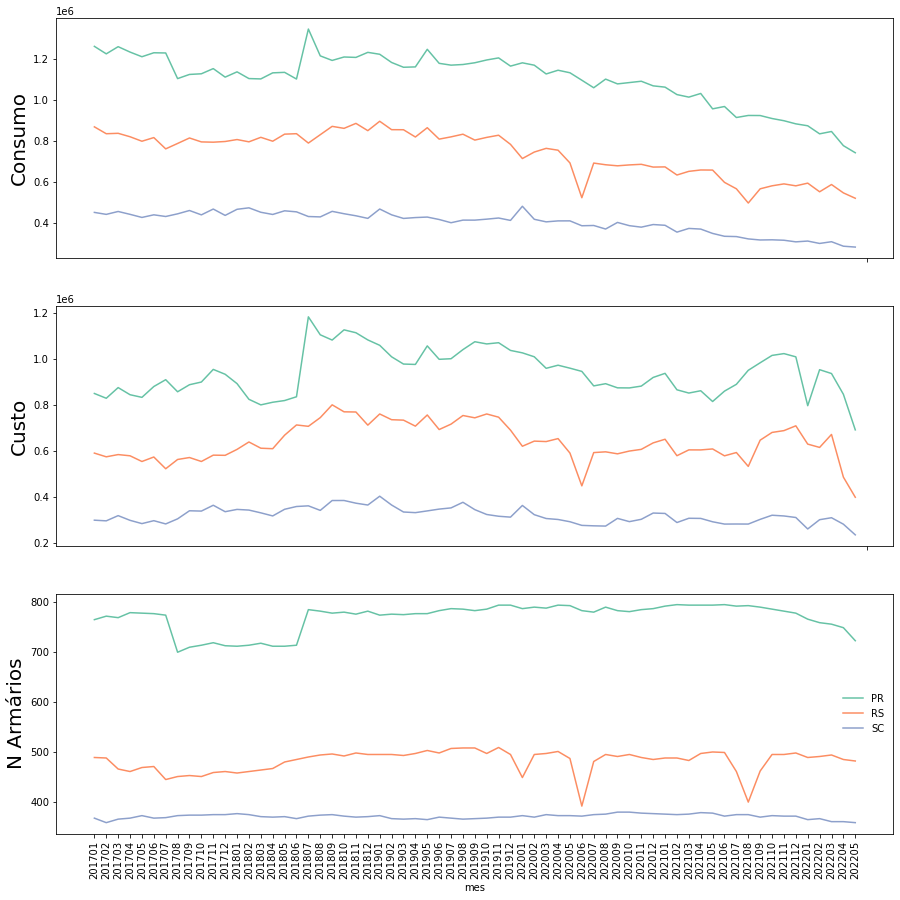

In [26]:
plt.subplots_adjust(wspace=0.17)
fig = plt.figure(figsize=(15,15))


plot = plt.subplot(3, 1, 1)
ax = sns.lineplot(data=dados, x=dados['mes'].dt.strftime('%Y%m'), y="consumo", hue = 'uf', palette="Set2")
plt.xticks(rotation=90)
plt.ylabel("Consumo")
plt.xlabel("")
plt.xticks("")
ax.yaxis.label.set_size(20)
#plt.show()
leg = plt.legend()

ax.get_legend().set_visible(False)


plot = plt.subplot(3, 1, 2)
ax = sns.lineplot(data=dados, x=dados['mes'].dt.strftime('%Y%m'), y="custo", hue = 'uf', palette="Set2")
plt.xticks(rotation=90)
plt.ylabel("Custo")
plt.xlabel("")
plt.xticks("")
ax.yaxis.label.set_size(20)
#plt.show()
leg = plt.legend()

ax.get_legend().set_visible(False)

plot = plt.subplot(3, 1, 3)
ax = sns.lineplot(data=dados, x=dados['mes'].dt.strftime('%Y%m'), y="contagem", hue = 'uf', palette="Set2")
plt.xticks(rotation=90)
plt.ylabel("N Armários")
ax.yaxis.label.set_size(20)

plt.legend()
leg = plt.legend(loc = 0, ncol = 1, shadow = False, fancybox = True, frameon = False, numpoints = 1)
leg.get_frame().set_alpha(0.5)
plt.grid(False)
plt.show()


<Figure size 432x288 with 0 Axes>

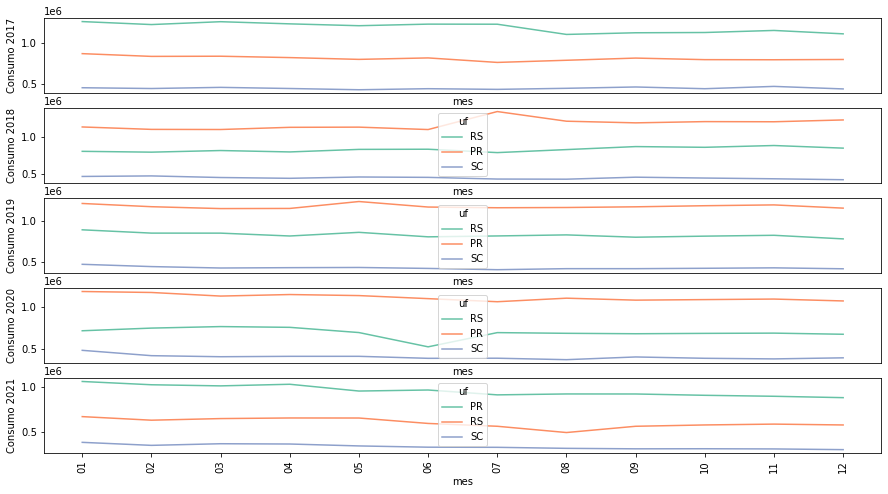

In [123]:
plt.subplots_adjust(wspace=0.17)
fig = plt.figure(figsize=(15,8))

#### Nordeste 

#### Fig A
plot = plt.subplot(5, 1, 1)
#fig = plt.figure(figsize=(15,5))

ax = sns.lineplot(data=dados_2017, x=dados_2017['mes'].dt.strftime('%m'), y="consumo", hue = 'uf', palette="Set2")

plt.xticks("")
plt.ylabel("Consumo 2017")
leg = plt.legend()

ax.get_legend().set_visible(False)

plot = plt.subplot(5, 1, 2)
#fig = plt.figure(figsize=(15,5))

sns.lineplot(data=dados_2018, x=dados_2018['mes'].dt.strftime('%m'), y="consumo", hue = 'uf', palette="Set2")

plt.xticks("")
plt.ylabel("Consumo 2018")

plot = plt.subplot(5, 1, 3)
#fig = plt.figure(figsize=(15,5))

sns.lineplot(data=dados_2019, x=dados_2019['mes'].dt.strftime('%m'), y="consumo", hue = 'uf', palette="Set2")

plt.xticks("")
plt.ylabel("Consumo 2019")

plot = plt.subplot(5, 1, 4)
#fig = plt.figure(figsize=(15,5))

sns.lineplot(data=dados_2020, x=dados_2020['mes'].dt.strftime('%m'), y="consumo", hue = 'uf', palette="Set2")

plt.xticks("")
plt.ylabel("Consumo 2020")

plot = plt.subplot(5, 1, 5)
#fig = plt.figure(figsize=(15,5))

sns.lineplot(data=dados_2021, x=dados_2021['mes'].dt.strftime('%m'), y="consumo", hue = 'uf', palette="Set2")

plt.xticks(rotation=90)
plt.ylabel("Consumo 2021")


plt.show()

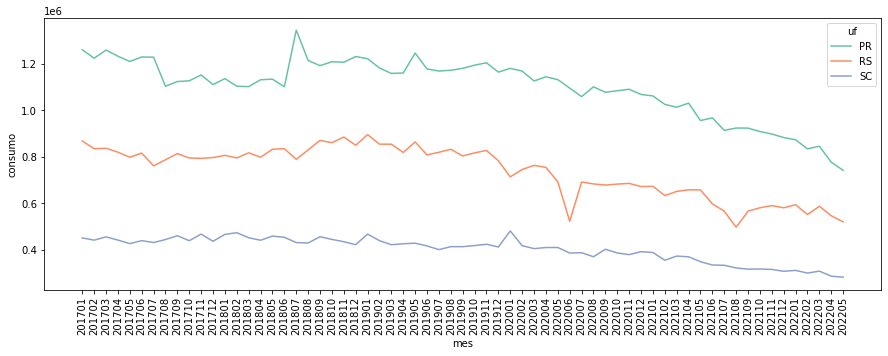

In [124]:
fig = plt.figure(figsize=(15,5))
sns.lineplot(data=dados, x=dados['mes'].dt.strftime('%Y%m'), y="consumo", hue = 'uf', palette="Set2")
plt.xticks(rotation=90)

plt.show()

In [125]:
dados['mes']

0     2017-01-01
1     2017-01-01
2     2017-01-01
3     2017-02-01
4     2017-02-01
         ...    
190   2022-04-01
191   2022-04-01
192   2022-05-01
193   2022-05-01
194   2022-05-01
Name: mes, Length: 195, dtype: datetime64[ns]

In [8]:
dados_sudeste = pd.read_csv(PATH + 'historico_sudeste.txt', sep = '\t')
dados_sudeste['mes'] = dados_sudeste['mes'].apply(lambda x: pd.to_datetime(str(x) + '01'))
dados_sudeste

contagem      custo    consumo        mes macroregiao  uf
0         174  199208.38  286286.00 2017-01-01          SE  ES
1         317  390779.63  507522.00 2017-01-01          SE  MG
2         302  336198.18  421168.00 2017-01-01          SE  RJ
3         741  444513.67  760709.45 2017-01-01          SE  SP
4         178  196314.47  277307.74 2017-02-01          SE  ES
..        ...        ...        ...        ...         ...  ..
255       650  482995.08  501224.80 2022-04-01          SE  SP
256       182  195998.85  209734.00 2022-05-01          SE  ES
257       288   68521.01  364837.00 2022-05-01          SE  MG
258       271  247170.27  288266.00 2022-05-01          SE  RJ
259       650  414281.32  490040.60 2022-05-01          SE  SP

[260 rows x 6 columns]

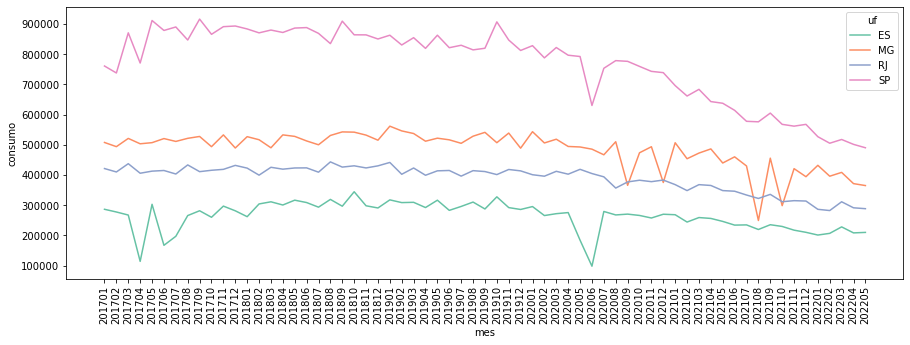

In [127]:
fig = plt.figure(figsize=(15,5))
sns.lineplot(data=dados, x=dados['mes'].dt.strftime('%Y%m'), y="consumo", hue = 'uf', palette="Set2")
plt.xticks(rotation=90)

plt.show()

<Figure size 432x288 with 0 Axes>

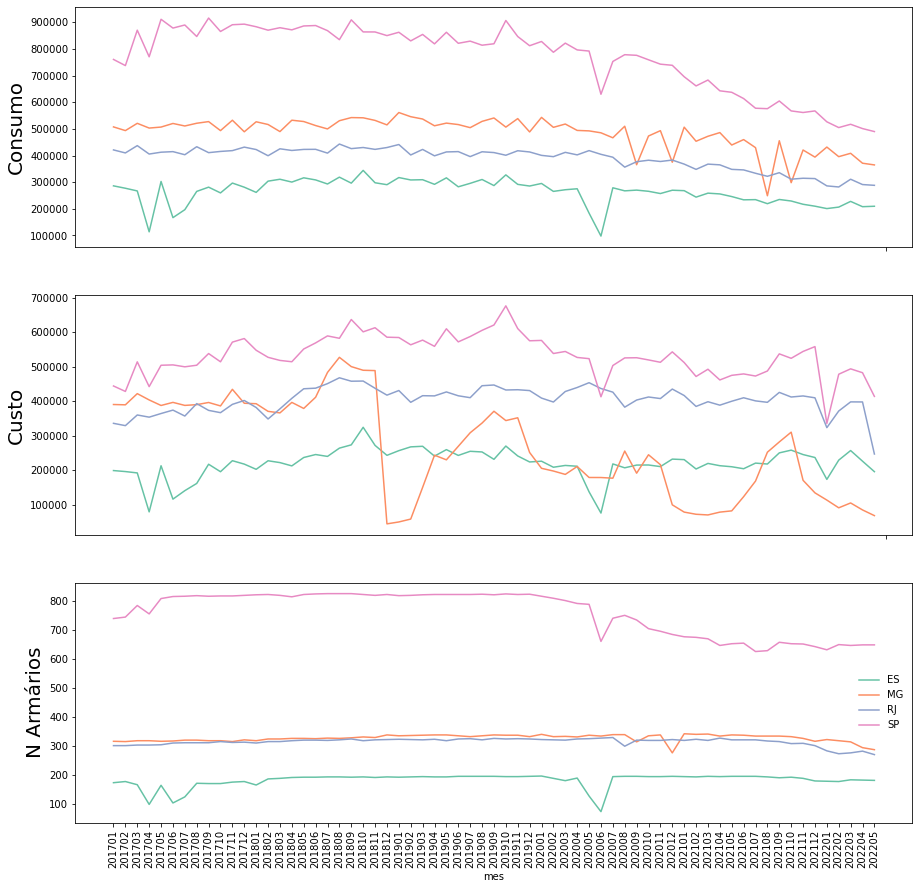

In [11]:
plt.subplots_adjust(wspace=0.17)
fig = plt.figure(figsize=(15,15))


plot = plt.subplot(3, 1, 1)
ax = sns.lineplot(data=dados_sudeste, x=dados_sudeste['mes'].dt.strftime('%Y%m'), y="consumo", hue = 'uf', palette="Set2")
plt.xticks(rotation=90)
plt.ylabel("Consumo")
plt.xlabel("")
plt.xticks("")
ax.yaxis.label.set_size(20)
#plt.show()
leg = plt.legend()

ax.get_legend().set_visible(False)


plot = plt.subplot(3, 1, 2)
ax = sns.lineplot(data=dados_sudeste, x=dados_sudeste['mes'].dt.strftime('%Y%m'), y="custo", hue = 'uf', palette="Set2")
plt.xticks(rotation=90)
plt.ylabel("Custo")
plt.xlabel("")
plt.xticks("")
ax.yaxis.label.set_size(20)
#plt.show()
leg = plt.legend()

ax.get_legend().set_visible(False)

plot = plt.subplot(3, 1, 3)
ax = sns.lineplot(data=dados_sudeste, x=dados_sudeste['mes'].dt.strftime('%Y%m'), y="contagem", hue = 'uf', palette="Set2")
plt.xticks(rotation=90)
plt.ylabel("N Armários")
ax.yaxis.label.set_size(20)

plt.legend()
leg = plt.legend(loc = 0, ncol = 1, shadow = False, fancybox = True, frameon = False, numpoints = 1)
leg.get_frame().set_alpha(0.5)
plt.grid(False)
plt.show()


In [13]:
dados_sudeste

contagem      custo    consumo        mes macroregiao  uf
0         174  199208.38  286286.00 2017-01-01          SE  ES
1         317  390779.63  507522.00 2017-01-01          SE  MG
2         302  336198.18  421168.00 2017-01-01          SE  RJ
3         741  444513.67  760709.45 2017-01-01          SE  SP
4         178  196314.47  277307.74 2017-02-01          SE  ES
..        ...        ...        ...        ...         ...  ..
255       650  482995.08  501224.80 2022-04-01          SE  SP
256       182  195998.85  209734.00 2022-05-01          SE  ES
257       288   68521.01  364837.00 2022-05-01          SE  MG
258       271  247170.27  288266.00 2022-05-01          SE  RJ
259       650  414281.32  490040.60 2022-05-01          SE  SP

[260 rows x 6 columns]

<Figure size 432x288 with 0 Axes>

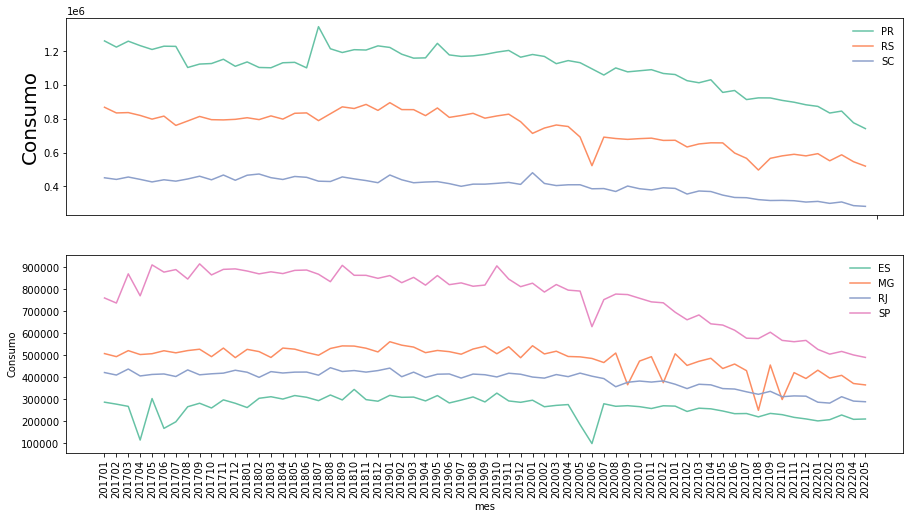

In [16]:
plt.subplots_adjust(wspace=0.17)
fig = plt.figure(figsize=(15,8))

plot = plt.subplot(2, 1, 1)
ax = sns.lineplot(data=dados, x=dados['mes'].dt.strftime('%Y%m'), y="consumo", hue = 'uf', palette="Set2")
plt.xticks(rotation=90)
plt.ylabel("Consumo")
plt.xlabel("")
plt.xticks("")

ax.yaxis.label.set_size(20)
#plt.show()

plt.legend()
leg = plt.legend(loc = 0, ncol = 1, shadow = False, fancybox = True, frameon = False, numpoints = 1)
leg.get_frame().set_alpha(0.5)



plot = plt.subplot(2, 1, 2)
sns.lineplot(data=dados_sudeste, x=dados_sudeste['mes'].dt.strftime('%Y%m'), y="consumo", hue = 'uf', palette="Set2")
plt.xticks(rotation=90)
plt.ylabel("Consumo")
ax.yaxis.label.set_size(20)

plt.legend()
leg = plt.legend(loc = 0, ncol = 1, shadow = False, fancybox = True, frameon = False, numpoints = 1)
leg.get_frame().set_alpha(0.5)
plt.grid(False)
plt.show()


In [13]:
dados = pd.read_csv(PATH + 'historico_nordeste.txt', sep = '\t')
dados['mes'] = dados['mes'].apply(lambda x: pd.to_datetime(str(x) + '01'))
dados

contagem      custo    consumo        mes macroregiao  uf
0          59   47076.41   68556.00 2017-01-01          NE  AL
1         217  272450.29  397424.19 2017-01-01          NE  BA
2           2    3149.63    3789.00 2017-01-01          NE  CE
3          92  100554.77   98842.23 2017-01-01          NE  PB
4          17   15465.50   22078.88 2017-01-01          NE  PE
..        ...        ...        ...        ...         ...  ..
503        74   71372.80   77250.00 2022-05-01          NE  PB
504        13   10044.01   14004.00 2022-05-01          NE  PE
505         4    7000.97    7227.00 2022-05-01          NE  PI
506        31   20686.91   20178.00 2022-05-01          NE  RN
507        46   53155.08   48993.00 2022-05-01          NE  SE

[508 rows x 6 columns]

<Figure size 432x288 with 0 Axes>

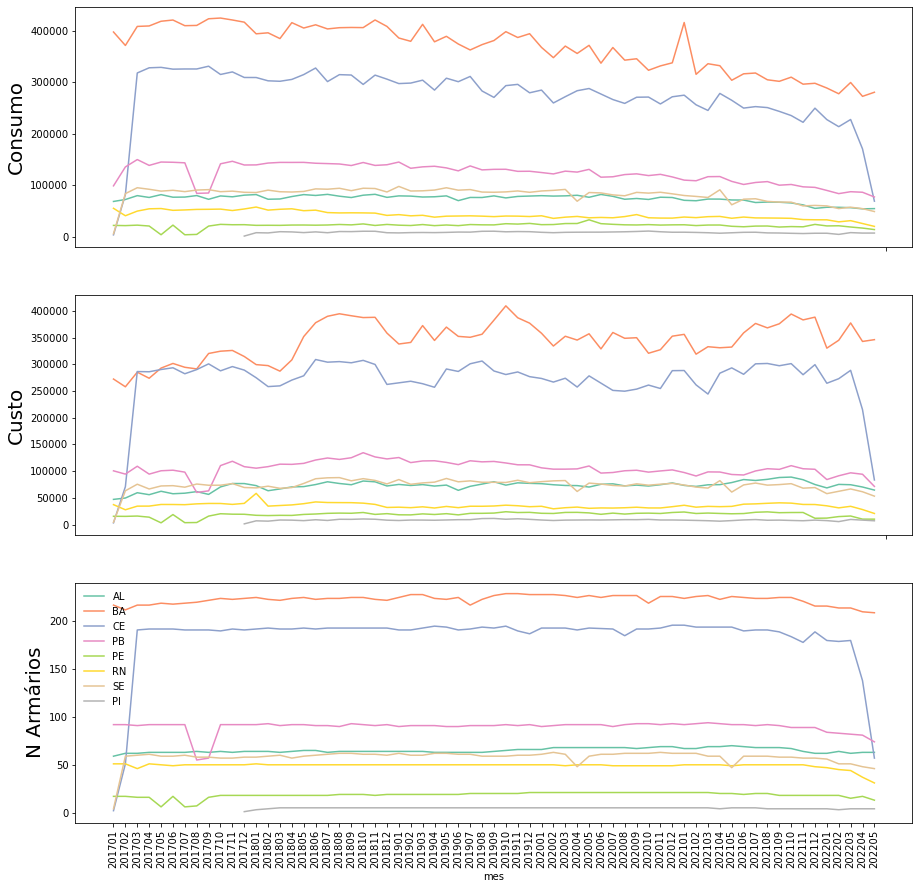

In [15]:
plt.subplots_adjust(wspace=0.17)
fig = plt.figure(figsize=(15,15))


plot = plt.subplot(3, 1, 1)
ax = sns.lineplot(data=dados, x=dados['mes'].dt.strftime('%Y%m'), y="consumo", hue = 'uf', palette="Set2")
plt.xticks(rotation=90)
plt.ylabel("Consumo")
plt.xlabel("")
plt.xticks("")
ax.yaxis.label.set_size(20)
#plt.show()
leg = plt.legend()

ax.get_legend().set_visible(False)


plot = plt.subplot(3, 1, 2)
ax = sns.lineplot(data=dados, x=dados['mes'].dt.strftime('%Y%m'), y="custo", hue = 'uf', palette="Set2")
plt.xticks(rotation=90)
plt.ylabel("Custo")
plt.xlabel("")
plt.xticks("")
ax.yaxis.label.set_size(20)
#plt.show()
leg = plt.legend()

ax.get_legend().set_visible(False)

plot = plt.subplot(3, 1, 3)
ax = sns.lineplot(data=dados, x=dados['mes'].dt.strftime('%Y%m'), y="contagem", hue = 'uf', palette="Set2")
plt.xticks(rotation=90)
plt.ylabel("N Armários")
ax.yaxis.label.set_size(20)

plt.legend()
leg = plt.legend(loc = 0, ncol = 1, shadow = False, fancybox = True, frameon = False, numpoints = 1)
leg.get_frame().set_alpha(0.5)
plt.grid(False)
plt.show()


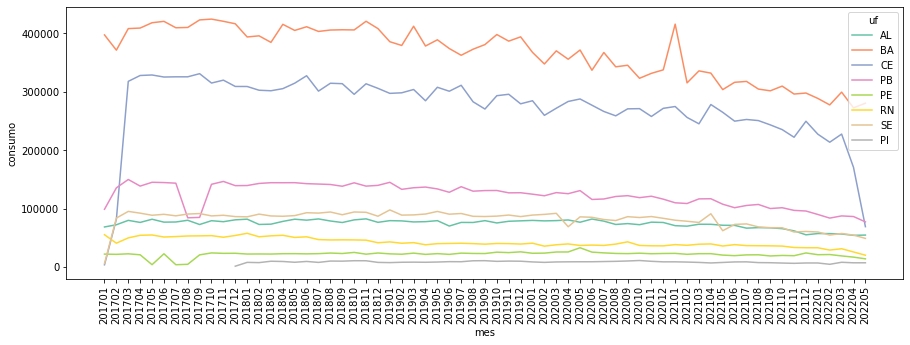

In [9]:
fig = plt.figure(figsize=(15,5))
sns.lineplot(data=dados, x=dados['mes'].dt.strftime('%Y%m'), y="consumo", hue = 'uf', palette="Set2")
plt.xticks(rotation=90)

plt.show()

<Figure size 432x288 with 0 Axes>

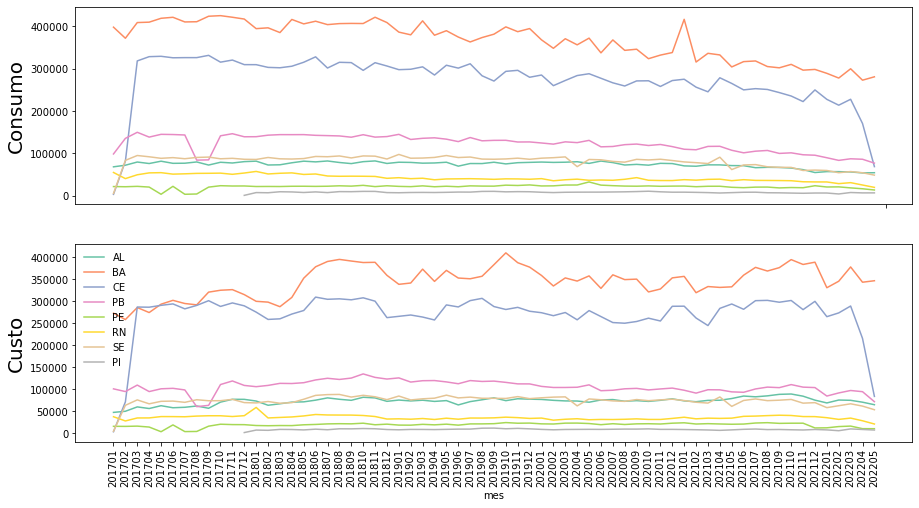

In [10]:
plt.subplots_adjust(wspace=0.17)
fig = plt.figure(figsize=(15,8))


plot = plt.subplot(2, 1, 1)
ax = sns.lineplot(data=dados, x=dados['mes'].dt.strftime('%Y%m'), y="consumo", hue = 'uf', palette="Set2")
plt.xticks(rotation=90)
plt.ylabel("Consumo")
plt.xlabel("")
plt.xticks("")
ax.yaxis.label.set_size(20)
#plt.show()
leg = plt.legend()

ax.get_legend().set_visible(False)


plot = plt.subplot(2, 1, 2)
ax = sns.lineplot(data=dados, x=dados['mes'].dt.strftime('%Y%m'), y="custo", hue = 'uf', palette="Set2")
plt.xticks(rotation=90)
plt.ylabel("Custo")
ax.yaxis.label.set_size(20)

plt.legend()
leg = plt.legend(loc = 0, ncol = 1, shadow = False, fancybox = True, frameon = False, numpoints = 1)
leg.get_frame().set_alpha(0.5)
plt.grid(False)
plt.show()


In [16]:
dados = pd.read_csv(PATH + 'historico_centrooeste.txt', sep = '\t')
dados['mes'] = dados['mes'].apply(lambda x: pd.to_datetime(str(x) + '01'))
dados

contagem      custo    consumo        mes macroregiao  uf
0         253  142995.97  197037.00 2017-01-01          CO  DF
1         289  317902.59  481709.39 2017-01-01          CO  GO
2          96  120142.91  177800.00 2017-01-01          CO  MS
3          79   98882.99  123380.00 2017-01-01          CO  MT
4         254  138678.84  199835.00 2017-02-01          CO  DF
..        ...        ...        ...        ...         ...  ..
255        77   14200.52   80453.00 2022-04-01          CO  MT
256       178   44591.59   42313.00 2022-05-01          CO  DF
257         6    8293.27    9257.03 2022-05-01          CO  GO
258       116  135637.29  112157.00 2022-05-01          CO  MS
259        75   15851.52   77339.00 2022-05-01          CO  MT

[260 rows x 6 columns]

In [17]:
goias = pd.read_csv(PATH + 'goias.txt', sep = '\t')
goias['mes'] = goias['mes'].apply(lambda x: pd.to_datetime(str(x) + '01'))
goias['macroregiao'] = 'CO'
goias

contagem      custo    consumo        mes  uf macroregiao
0        274  306630.97  464724.39 2017-01-01  GO          CO
1        274  297445.81  446307.28 2017-02-01  GO          CO
2        276  294971.10  437075.61 2017-03-01  GO          CO
3        273  316722.84  469207.48 2017-04-01  GO          CO
4        274  315454.50  449235.86 2017-05-01  GO          CO
..       ...        ...        ...        ...  ..         ...
60       280   55067.57  325322.06 2022-01-01  GO          CO
61       275   72045.08  307874.34 2022-02-01  GO          CO
62       267   78730.35  300141.93 2022-03-01  GO          CO
63       264   56179.57  277696.54 2022-04-01  GO          CO
64       266   30167.24  290491.37 2022-05-01  GO          CO

[65 rows x 6 columns]

In [18]:
dados = dados.loc[dados['uf']!='GO']
dados

contagem      custo   consumo        mes macroregiao  uf
0         253  142995.97  197037.0 2017-01-01          CO  DF
2          96  120142.91  177800.0 2017-01-01          CO  MS
3          79   98882.99  123380.0 2017-01-01          CO  MT
4         254  138678.84  199835.0 2017-02-01          CO  DF
6         105  114059.52  157138.0 2017-02-01          CO  MS
..        ...        ...       ...        ...         ...  ..
254       120  141982.44  119981.0 2022-04-01          CO  MS
255        77   14200.52   80453.0 2022-04-01          CO  MT
256       178   44591.59   42313.0 2022-05-01          CO  DF
258       116  135637.29  112157.0 2022-05-01          CO  MS
259        75   15851.52   77339.0 2022-05-01          CO  MT

[195 rows x 6 columns]

In [19]:
dados = pd.concat([dados, goias], axis=0).sort_values(by = 'mes')
dados

contagem      custo    consumo        mes macroregiao  uf
0         253  142995.97  197037.00 2017-01-01          CO  DF
3          79   98882.99  123380.00 2017-01-01          CO  MT
0         274  306630.97  464724.39 2017-01-01          CO  GO
2          96  120142.91  177800.00 2017-01-01          CO  MS
4         254  138678.84  199835.00 2017-02-01          CO  DF
..        ...        ...        ...        ...         ...  ..
255        77   14200.52   80453.00 2022-04-01          CO  MT
258       116  135637.29  112157.00 2022-05-01          CO  MS
256       178   44591.59   42313.00 2022-05-01          CO  DF
259        75   15851.52   77339.00 2022-05-01          CO  MT
64        266   30167.24  290491.37 2022-05-01          CO  GO

[260 rows x 6 columns]

In [20]:
dados.to_csv(PATH + 'teste.txt', index = False)

In [21]:
dados = pd.read_csv(PATH + 'teste.txt', sep = ',')
dados['mes'] = dados['mes'].apply(lambda x: pd.to_datetime(str(x)))
dados

contagem      custo    consumo        mes macroregiao  uf
0         253  142995.97  197037.00 2017-01-01          CO  DF
1          79   98882.99  123380.00 2017-01-01          CO  MT
2         274  306630.97  464724.39 2017-01-01          CO  GO
3          96  120142.91  177800.00 2017-01-01          CO  MS
4         254  138678.84  199835.00 2017-02-01          CO  DF
..        ...        ...        ...        ...         ...  ..
255        77   14200.52   80453.00 2022-04-01          CO  MT
256       116  135637.29  112157.00 2022-05-01          CO  MS
257       178   44591.59   42313.00 2022-05-01          CO  DF
258        75   15851.52   77339.00 2022-05-01          CO  MT
259       266   30167.24  290491.37 2022-05-01          CO  GO

[260 rows x 6 columns]

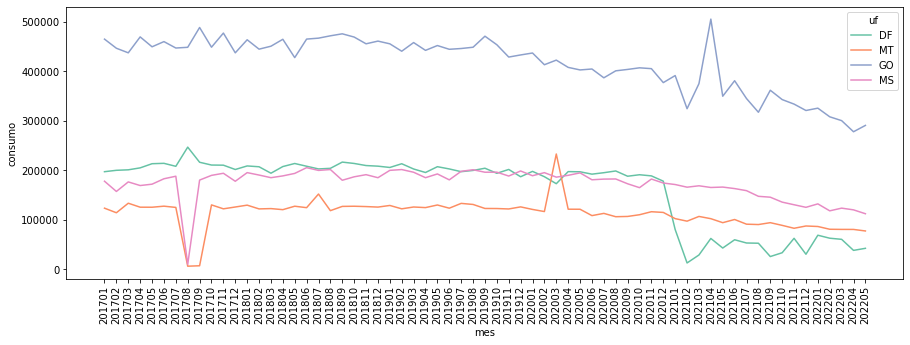

In [22]:
fig = plt.figure(figsize=(15,5))
sns.lineplot(data=dados, x=dados['mes'].dt.strftime('%Y%m'), y="consumo", hue = 'uf', palette="Set2")
plt.xticks(rotation=90)

plt.show()

<Figure size 432x288 with 0 Axes>

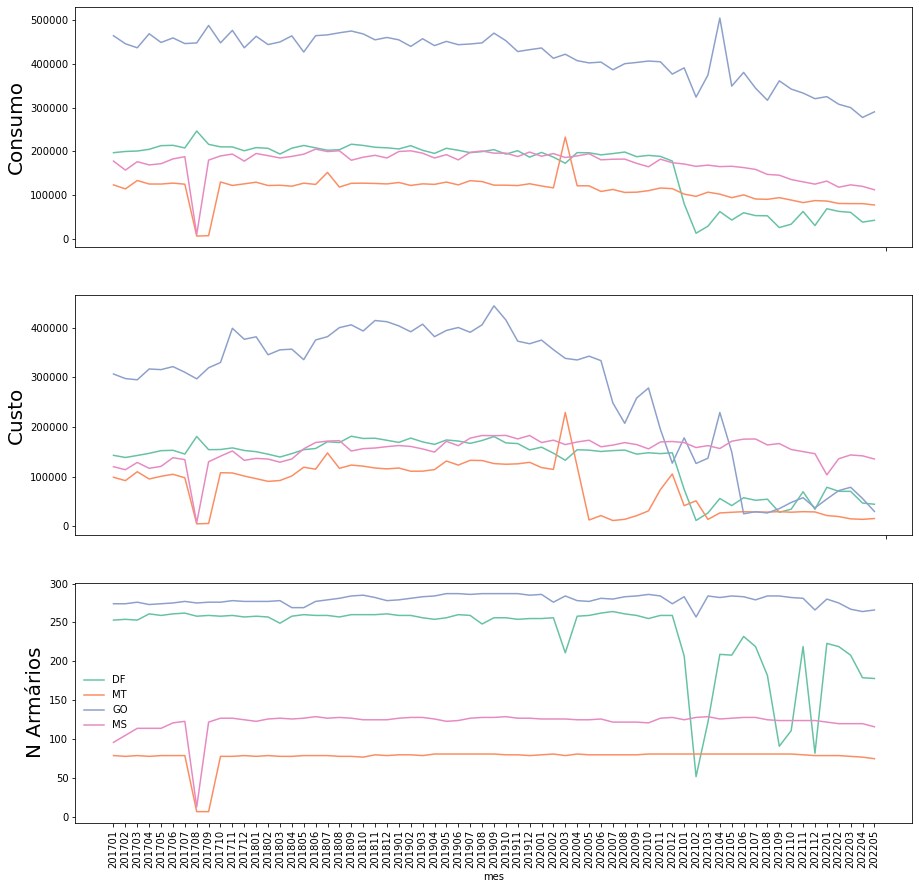

In [23]:
plt.subplots_adjust(wspace=0.17)
fig = plt.figure(figsize=(15,15))


plot = plt.subplot(3, 1, 1)
ax = sns.lineplot(data=dados, x=dados['mes'].dt.strftime('%Y%m'), y="consumo", hue = 'uf', palette="Set2")
plt.xticks(rotation=90)
plt.ylabel("Consumo")
plt.xlabel("")
plt.xticks("")
ax.yaxis.label.set_size(20)
#plt.show()
leg = plt.legend()

ax.get_legend().set_visible(False)


plot = plt.subplot(3, 1, 2)
ax = sns.lineplot(data=dados, x=dados['mes'].dt.strftime('%Y%m'), y="custo", hue = 'uf', palette="Set2")
plt.xticks(rotation=90)
plt.ylabel("Custo")
plt.xlabel("")
plt.xticks("")
ax.yaxis.label.set_size(20)
#plt.show()
leg = plt.legend()

ax.get_legend().set_visible(False)

plot = plt.subplot(3, 1, 3)
ax = sns.lineplot(data=dados, x=dados['mes'].dt.strftime('%Y%m'), y="contagem", hue = 'uf', palette="Set2")
plt.xticks(rotation=90)
plt.ylabel("N Armários")
ax.yaxis.label.set_size(20)

plt.legend()
leg = plt.legend(loc = 0, ncol = 1, shadow = False, fancybox = True, frameon = False, numpoints = 1)
leg.get_frame().set_alpha(0.5)
plt.grid(False)
plt.show()


In [134]:
dados_co = pd.read_csv(PATH + 'Armarios/armarios_por_uf_co.txt', sep = '\t')
dados_co['mes'] = dados_co['mes'].apply(lambda x: pd.to_datetime(str(x) + '01'))
dados_co

contagem  uf        mes
0         253  DF 2017-01-01
1         289  GO 2017-01-01
2          96  MS 2017-01-01
3          79  MT 2017-01-01
4         254  DF 2017-02-01
..        ...  ..        ...
255        77  MT 2022-04-01
256       178  DF 2022-05-01
257         6  GO 2022-05-01
258       116  MS 2022-05-01
259        75  MT 2022-05-01

[260 rows x 3 columns]

<Figure size 432x288 with 0 Axes>

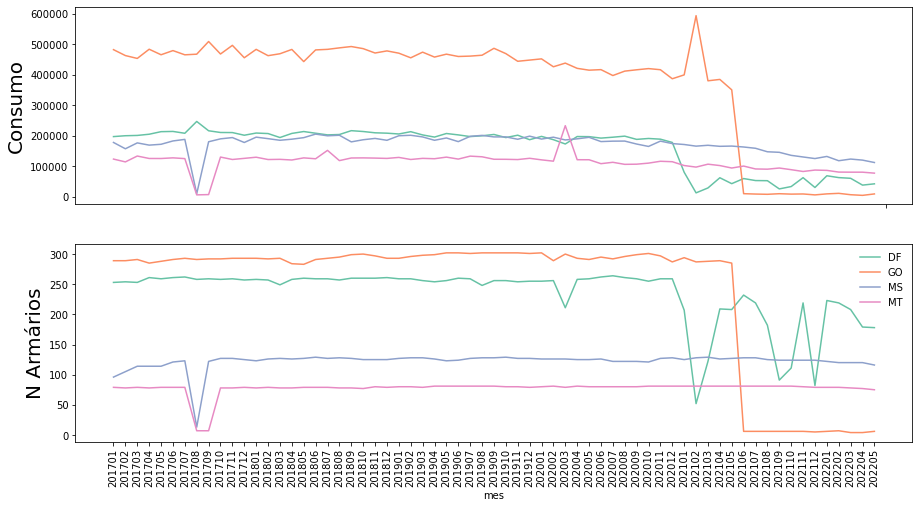

In [135]:
plt.subplots_adjust(wspace=0.17)
fig = plt.figure(figsize=(15,8))


plot = plt.subplot(2, 1, 1)
ax = sns.lineplot(data=dados, x=dados['mes'].dt.strftime('%Y%m'), y="consumo", hue = 'uf', palette="Set2")
plt.xticks(rotation=90)
plt.ylabel("Consumo")
plt.xlabel("")
plt.xticks("")
ax.yaxis.label.set_size(20)
#plt.show()
leg = plt.legend()

ax.get_legend().set_visible(False)


plot = plt.subplot(2, 1, 2)
ax = sns.lineplot(data=dados_co, x=dados_co['mes'].dt.strftime('%Y%m'), y="contagem", hue = 'uf', palette="Set2")
plt.xticks(rotation=90)
plt.ylabel("N Armários")
ax.yaxis.label.set_size(20)

plt.legend()
leg = plt.legend(loc = 0, ncol = 1, shadow = False, fancybox = True, frameon = False, numpoints = 1)
leg.get_frame().set_alpha(0.5)
plt.grid(False)
plt.show()


In [27]:
df = pd.read_csv(PATH + 'RS_Z56.txt', sep = '\t')
df['mes'] = df['mes'].apply(lambda x: pd.to_datetime(str(x) + '01'))
df

mes  uf sigladosite  consumoacumuladodomes  valortotal
0  2017-01-01  RS         Z56                 1499.0      911.37
1  2017-02-01  RS         Z56                 1473.0      896.02
2  2017-03-01  RS         Z56                34157.0    20840.98
3  2017-04-01  RS         Z56                  221.0      218.62
4  2017-05-01  RS         Z56                23098.0    14883.44
..        ...  ..         ...                    ...         ...
60 2022-01-01  RS         Z56                37800.0    42823.76
61 2022-02-01  RS         Z56                 7272.0     8057.52
62 2022-03-01  RS         Z56                 6735.0     7449.58
63 2022-04-01  RS         Z56                 7290.0     7821.64
64 2022-05-01  RS         Z56                 7890.0     7106.79

[65 rows x 5 columns]

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

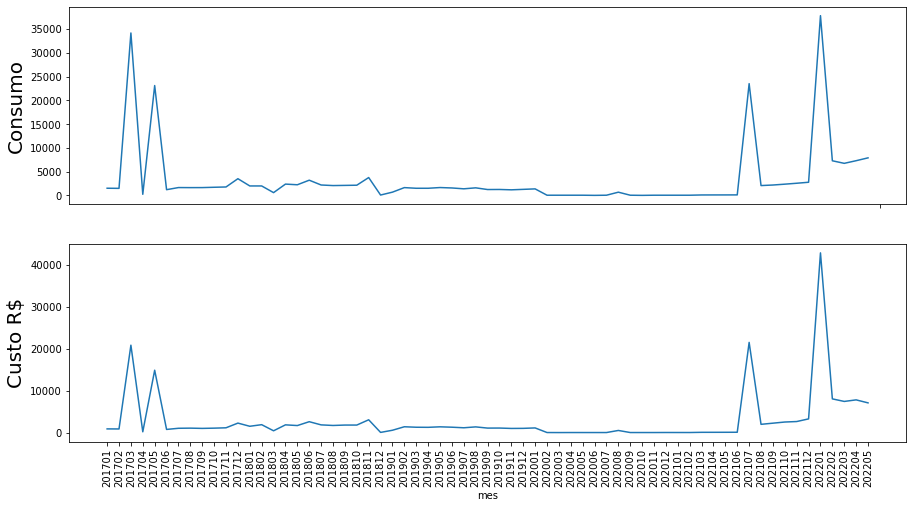

In [28]:
plt.subplots_adjust(wspace=0.17)
fig = plt.figure(figsize=(15,8))


plot = plt.subplot(2, 1, 1)
ax = sns.lineplot(data=df, x=df['mes'].dt.strftime('%Y%m'), y="consumoacumuladodomes", palette="Set2")
plt.xticks(rotation=90)
plt.ylabel("Consumo")
plt.xlabel("")
plt.xticks("")
ax.yaxis.label.set_size(20)
#plt.show()
leg = plt.legend()

ax.get_legend().set_visible(False)


plot = plt.subplot(2, 1, 2)
ax = sns.lineplot(data=df, x=df['mes'].dt.strftime('%Y%m'), y="valortotal", palette="Set2")
plt.xticks(rotation=90)
plt.ylabel("Consumo")
ax.yaxis.label.set_size(20)

plt.legend()
leg = plt.legend(loc = 0, ncol = 1, shadow = False, fancybox = True, frameon = False, numpoints = 1)
leg.get_frame().set_alpha(0.5)
plt.grid(False)
plt.show()


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

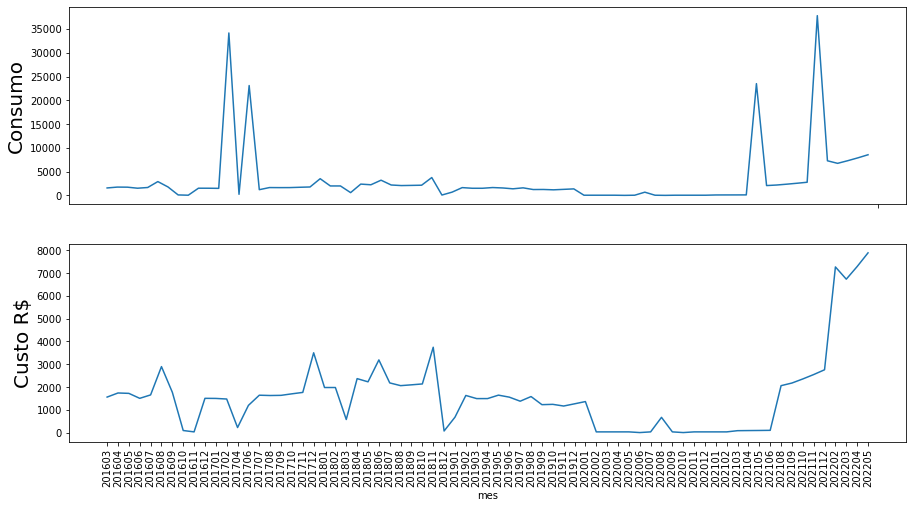

In [26]:
plt.subplots_adjust(wspace=0.17)
fig = plt.figure(figsize=(15,8))


plot = plt.subplot(2, 1, 1)
ax = sns.lineplot(data=df, x=df['mes'].dt.strftime('%Y%m'), y="consumoacumuladodomes", palette="Set2")
plt.xticks(rotation=90)
plt.ylabel("Consumo")
plt.xlabel("")
plt.xticks("")
ax.yaxis.label.set_size(20)
#plt.show()
leg = plt.legend()

ax.get_legend().set_visible(False)


plot = plt.subplot(2, 1, 2)
ax = sns.lineplot(data=df.loc[df['consumoacumuladodomes']<8000], x=df['mes'].dt.strftime('%Y%m').loc[df['consumoacumuladodomes']<8000], y="consumoacumuladodomes", palette="Set2")
plt.xticks(rotation=90)
plt.ylabel("Custo R$")
ax.yaxis.label.set_size(20)

plt.legend()
leg = plt.legend(loc = 0, ncol = 1, shadow = False, fancybox = True, frameon = False, numpoints = 1)
leg.get_frame().set_alpha(0.5)
plt.grid(False)
plt.show()


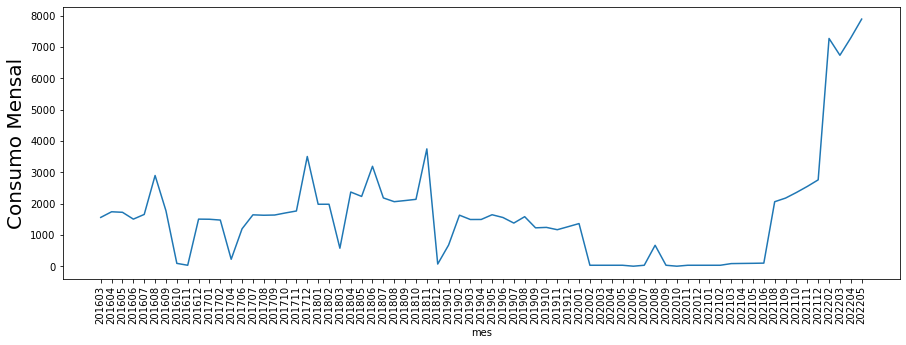

In [139]:
fig = plt.figure(figsize=(15,5))
ax = sns.lineplot(data=df.loc[df['consumoacumuladodomes']<8000], x=df['mes'].dt.strftime('%Y%m').loc[df['consumoacumuladodomes']<8000], y="consumoacumuladodomes", palette="Set2")
plt.xticks(rotation=90)
plt.ylabel("Consumo Mensal")
ax.yaxis.label.set_size(20)

plt.show()

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

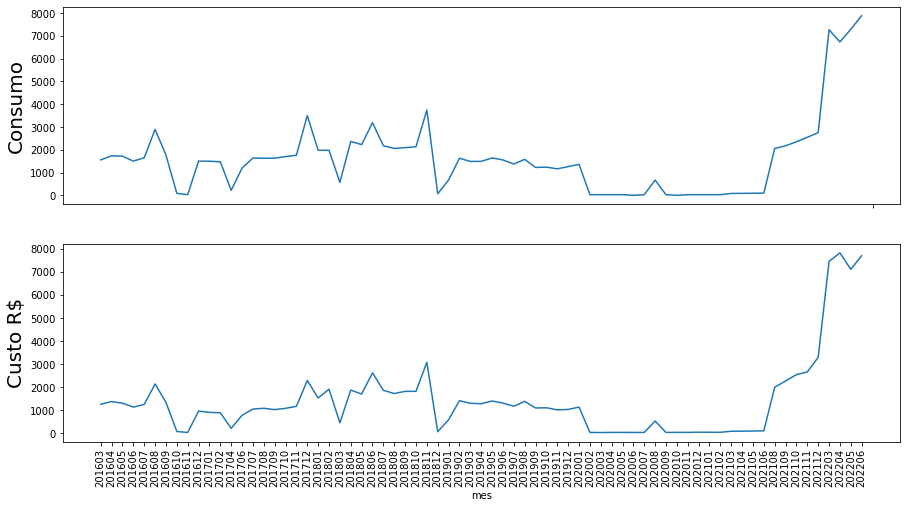

In [140]:
plt.subplots_adjust(wspace=0.17)
fig = plt.figure(figsize=(15,8))


plot = plt.subplot(2, 1, 1)
ax = sns.lineplot(data=df.loc[df['consumoacumuladodomes']<8000], x=df['mes'].dt.strftime('%Y%m').loc[df['consumoacumuladodomes']<8000], y="consumoacumuladodomes", palette="Set2")
plt.xticks(rotation=90)
plt.ylabel("Consumo")
plt.xlabel("")
plt.xticks("")
ax.yaxis.label.set_size(20)
#plt.show()
leg = plt.legend()

ax.get_legend().set_visible(False)


plot = plt.subplot(2, 1, 2)
ax = sns.lineplot(data=df.loc[df['valortotal']<8000], x=df['mes'].dt.strftime('%Y%m').loc[df['valortotal']<8000], y="valortotal", palette="Set2")
plt.xticks(rotation=90)
plt.ylabel("Custo R$")
ax.yaxis.label.set_size(20)

plt.legend()
leg = plt.legend(loc = 0, ncol = 1, shadow = False, fancybox = True, frameon = False, numpoints = 1)
leg.get_frame().set_alpha(0.5)
plt.grid(False)
plt.show()


In [141]:
consumo_macroregioes

contagem       custo     consumo     mes macroregiao
0         442   480234.46   651819.30  201701          NE
1        1621  1736961.80  2578865.00  201701           S
2         717   679924.46   979926.39  201701          CO
3        1534  1370699.86  1975685.45  201701          SE
4         726   652974.70   933461.28  201702          CO
..        ...         ...         ...     ...         ...
318       375   204373.67   241066.03  202205          CO
319         1     2063.19     1776.00  202205           N
320       497   656417.78   571878.00  202205          NE
321      1563  1322533.63  1542652.84  202205           S
322      1391   925971.45  1352877.60  202205          SE

[323 rows x 5 columns]

In [6]:
df = pd.read_csv(PATH + 'Consumo_minimo_mensal.txt', sep = '\t')
df

contagem     mes
0        274  201701
1        231  201702
2        245  201703
3        245  201704
4        241  201705
..       ...     ...
60       235  202201
61       196  202202
62       187  202203
63       216  202204
64       202  202205

[65 rows x 2 columns]

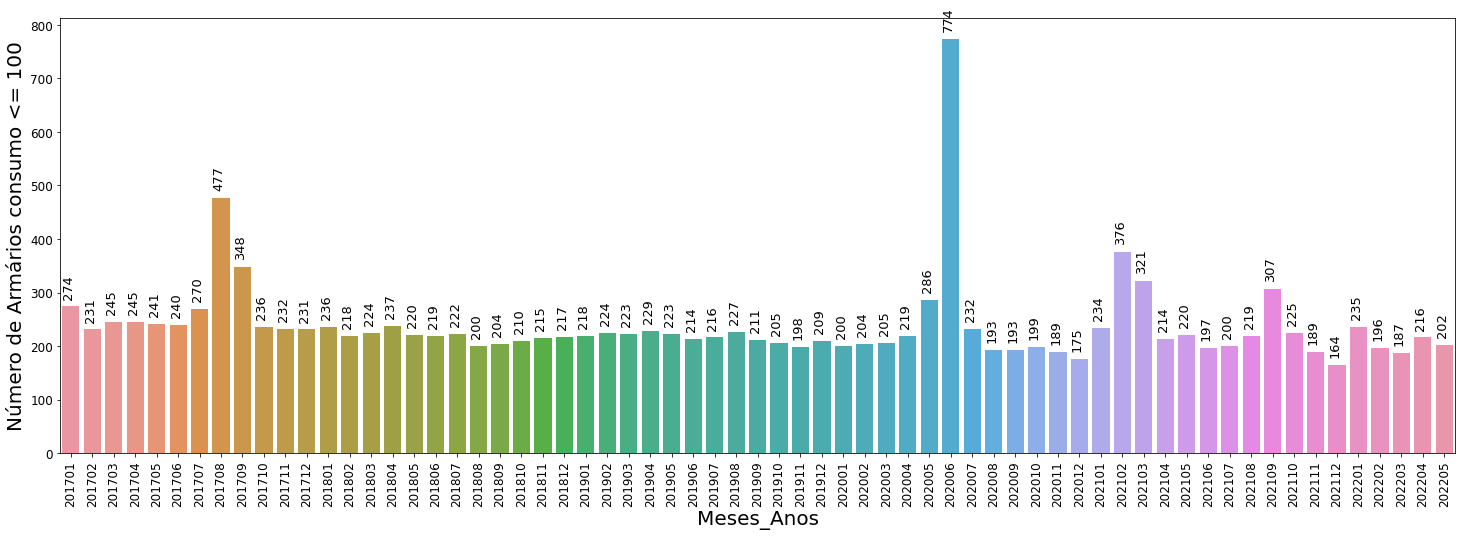

In [7]:
plt.figure(figsize=(25, 8))

ax = sns.barplot(x = 'mes', y = 'contagem', data = df)

plt.xticks(rotation=90, fontsize = 12)
plt.yticks(fontsize = 12)


for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x(), p.get_height()+20), rotation = 90, fontsize = 13)
    
ax.set(xlabel='Meses_Anos', ylabel='Número de Armários consumo <= 100')
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)

plt.show()

In [11]:
df = pd.read_csv(PATH + 'Consumo_acima_mensal.txt', sep = '\t')
df

contagem     mes
0         94  201701
1         92  201702
2         96  201703
3         80  201704
4         88  201705
..       ...     ...
60        69  202201
61        61  202202
62        62  202203
63        57  202204
64        54  202205

[65 rows x 2 columns]

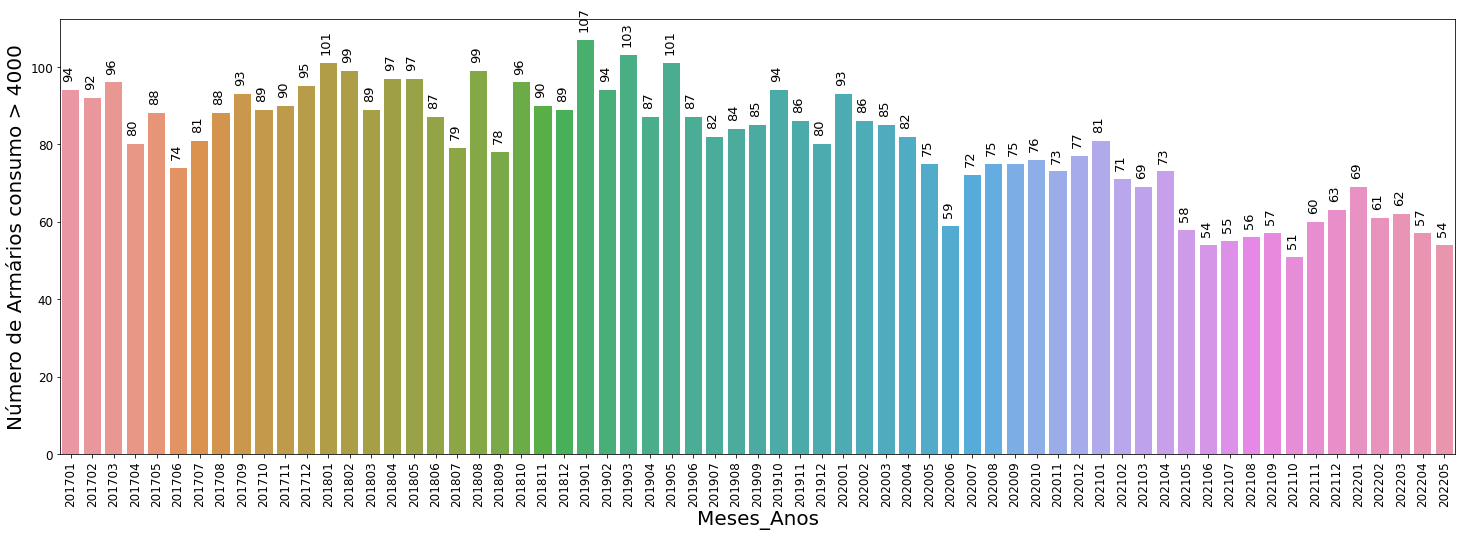

In [14]:
plt.figure(figsize=(25, 8))

ax = sns.barplot(x = 'mes', y = 'contagem', data = df)

plt.xticks(rotation=90, fontsize = 12)
plt.yticks(fontsize = 12)


for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x(), p.get_height()+3), rotation = 90, fontsize = 13)
    
ax.set(xlabel='Meses_Anos', ylabel='Número de Armários consumo > 4000')
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)

plt.show()

In [8]:
df = pd.read_csv(PATH + 'Consumo_minimo_mensal_por_uf.txt', sep = '\t')
df['mes'] = df['mes'].apply(lambda x: pd.to_datetime(str(x) + '01'))
df

contagem    custo  consumo        mes macroregiao  uf
0           11  2611.36      0.0 2017-01-01          CO  DF
1           13   830.13    460.0 2017-01-01          CO  GO
2           31  7143.20   1250.0 2017-01-01          CO  MS
3            2   377.08    100.0 2017-01-01           N  RO
4            1   358.11      0.0 2017-01-01           N  TO
...        ...      ...      ...        ...         ...  ..
1125        30  1097.56   1354.0 2022-05-01           S  SC
1126         6   233.08    350.0 2022-05-01          SE  ES
1127        18   812.77      0.0 2022-05-01          SE  MG
1128         9  1309.35    580.0 2022-05-01          SE  RJ
1129        18   891.60    861.0 2022-05-01          SE  SP

[1130 rows x 6 columns]

<Figure size 432x288 with 0 Axes>

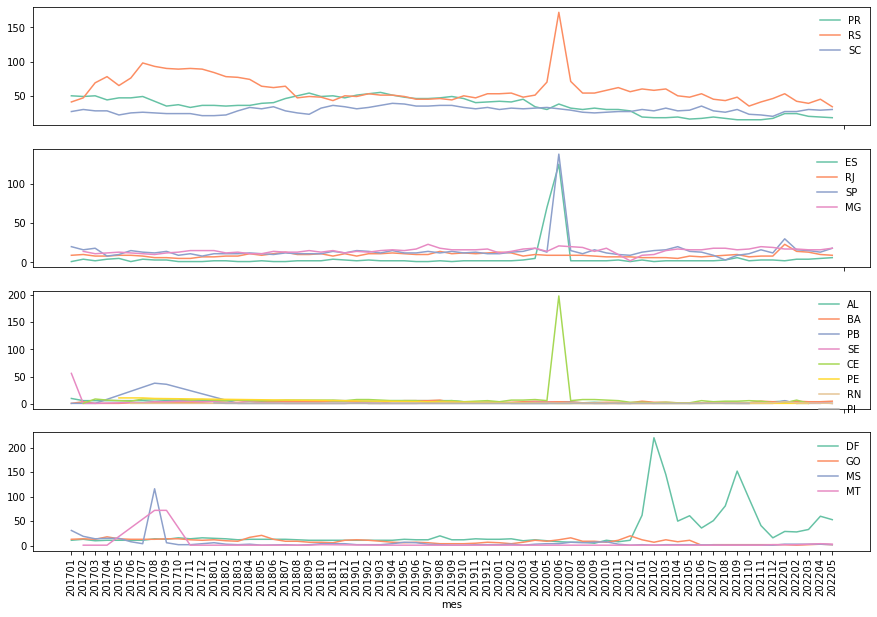

In [18]:
plt.subplots_adjust(wspace=0.17)
fig = plt.figure(figsize=(15,10))


plot = plt.subplot(4, 1, 1)
ax = sns.lineplot(data=df.loc[df['macroregiao']=='S'], x=df['mes'].dt.strftime('%Y%m').loc[df['macroregiao']=='S'], y="contagem", hue = 'uf', palette="Set2")
plt.xticks(rotation=90)
plt.ylabel("")
plt.xlabel("")
plt.xticks("")
ax.yaxis.label.set_size(20)
#plt.show()
plt.legend()
leg = plt.legend(loc = 0, ncol = 1, shadow = False, fancybox = True, frameon = False, numpoints = 1)
leg.get_frame().set_alpha(0.5)
plt.grid(False)


plot = plt.subplot(4, 1, 2)
ax = sns.lineplot(data=df.loc[df['macroregiao']=='SE'], x=df['mes'].dt.strftime('%Y%m').loc[df['macroregiao']=='SE'], y="contagem", hue = 'uf', palette="Set2")
plt.xticks(rotation=90)
plt.ylabel("")
plt.xlabel("")
plt.xticks("")
ax.yaxis.label.set_size(20)
#plt.show()
plt.legend()
leg = plt.legend(loc = 0, ncol = 1, shadow = False, fancybox = True, frameon = False, numpoints = 1)
leg.get_frame().set_alpha(0.5)
plt.grid(False)


plot = plt.subplot(4, 1, 3)
ax = sns.lineplot(data=df.loc[df['macroregiao']=='NE'], x=df['mes'].dt.strftime('%Y%m').loc[df['macroregiao']=='NE'], y="contagem", hue = 'uf', palette="Set2")
plt.xticks(rotation=90)
plt.ylabel("")
plt.xlabel("")
plt.xticks("")
ax.yaxis.label.set_size(20)
#plt.show()
plt.legend()
leg = plt.legend(loc = 0, ncol = 1, shadow = False, fancybox = True, frameon = False, numpoints = 1)
leg.get_frame().set_alpha(0.5)
plt.grid(False)



plot = plt.subplot(4, 1, 4)
ax = sns.lineplot(data=df.loc[df['macroregiao']=='CO'], x=df['mes'].dt.strftime('%Y%m').loc[df['macroregiao']=='CO'], y="contagem", hue = 'uf', palette="Set2")
plt.xticks(rotation=90)
plt.ylabel("")
ax.yaxis.label.set_size(20)

plt.legend()
leg = plt.legend(loc = 0, ncol = 1, shadow = False, fancybox = True, frameon = False, numpoints = 1)
leg.get_frame().set_alpha(0.5)
plt.grid(False)
plt.show()


<Figure size 432x288 with 0 Axes>

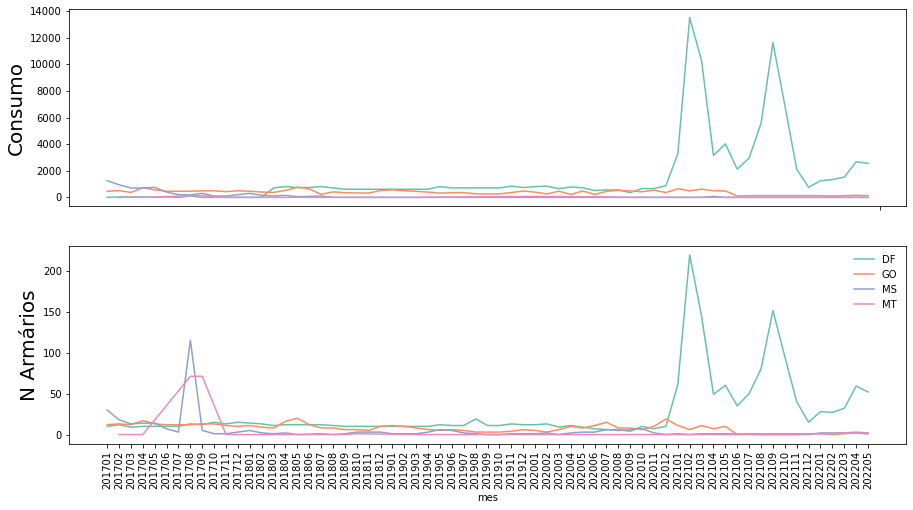

In [19]:
plt.subplots_adjust(wspace=0.17)
fig = plt.figure(figsize=(15,8))


plot = plt.subplot(2, 1, 1)
ax = sns.lineplot(data=df.loc[df['macroregiao']=='CO'], x=df['mes'].dt.strftime('%Y%m').loc[df['macroregiao']=='CO'], y="consumo", hue = 'uf', palette="Set2")
plt.xticks(rotation=90)
plt.ylabel("Consumo")
plt.xlabel("")
plt.xticks("")
ax.yaxis.label.set_size(20)
#plt.show()
leg = plt.legend()

ax.get_legend().set_visible(False)


plot = plt.subplot(2, 1, 2)
ax = sns.lineplot(data=df.loc[df['macroregiao']=='CO'], x=df['mes'].dt.strftime('%Y%m').loc[df['macroregiao']=='CO'], y="contagem", hue = 'uf', palette="Set2")
plt.xticks(rotation=90)
plt.ylabel("N Armários")
ax.yaxis.label.set_size(20)

plt.legend()
leg = plt.legend(loc = 0, ncol = 1, shadow = False, fancybox = True, frameon = False, numpoints = 1)
leg.get_frame().set_alpha(0.5)
plt.grid(False)
plt.show()


<Figure size 432x288 with 0 Axes>

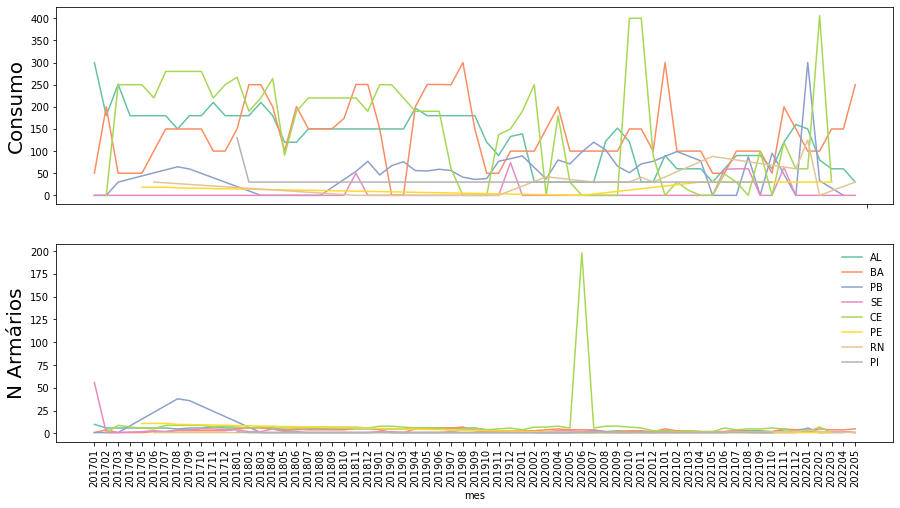

In [22]:
plt.subplots_adjust(wspace=0.17)
fig = plt.figure(figsize=(15,8))

plot = plt.subplot(2, 1, 1)
ax = sns.lineplot(data=df.loc[df['macroregiao']=='NE'], x=df['mes'].dt.strftime('%Y%m').loc[df['macroregiao']=='NE'], y="consumo", hue = 'uf', palette="Set2")
plt.xticks(rotation=90)
plt.ylabel("Consumo")
plt.xlabel("")
plt.xticks("")
ax.yaxis.label.set_size(20)
#plt.show()
leg = plt.legend()

ax.get_legend().set_visible(False)


plot = plt.subplot(2, 1, 2)
ax = sns.lineplot(data=df.loc[df['macroregiao']=='NE'], x=df['mes'].dt.strftime('%Y%m').loc[df['macroregiao']=='NE'], y="contagem", hue = 'uf', palette="Set2")
plt.xticks(rotation=90)
plt.ylabel("N Armários")
ax.yaxis.label.set_size(20)

plt.legend()
leg = plt.legend(loc = 0, ncol = 1, shadow = False, fancybox = True, frameon = False, numpoints = 1)
leg.get_frame().set_alpha(0.5)
plt.grid(False)
plt.show()

<Figure size 432x288 with 0 Axes>

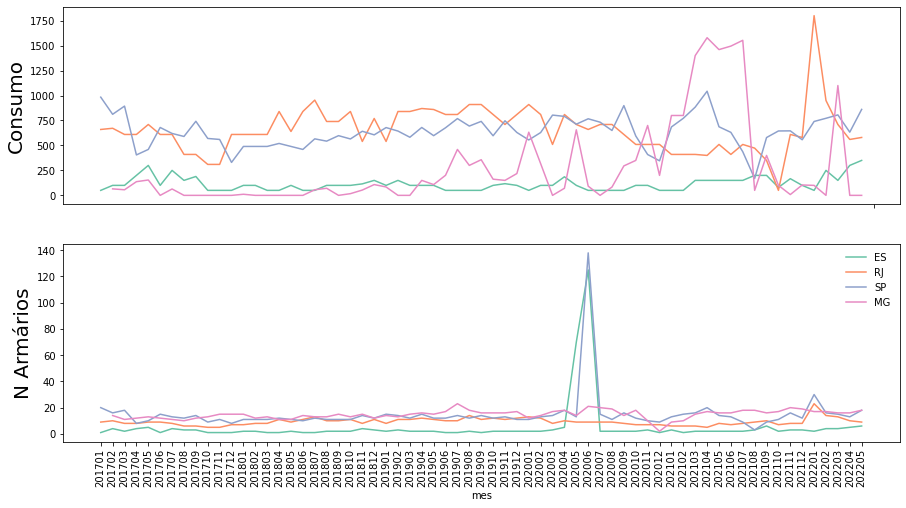

In [24]:
plt.subplots_adjust(wspace=0.17)
fig = plt.figure(figsize=(15,8))

plot = plt.subplot(2, 1, 1)
ax = sns.lineplot(data=df.loc[df['macroregiao']=='SE'], x=df['mes'].dt.strftime('%Y%m').loc[df['macroregiao']=='SE'], y="consumo", hue = 'uf', palette="Set2")
plt.xticks(rotation=90)
plt.ylabel("Consumo")
plt.xlabel("")
plt.xticks("")
ax.yaxis.label.set_size(20)
#plt.show()
leg = plt.legend()

ax.get_legend().set_visible(False)


plot = plt.subplot(2, 1, 2)
ax = sns.lineplot(data=df.loc[df['macroregiao']=='SE'], x=df['mes'].dt.strftime('%Y%m').loc[df['macroregiao']=='SE'], y="contagem", hue = 'uf', palette="Set2")
plt.xticks(rotation=90)
plt.ylabel("N Armários")
ax.yaxis.label.set_size(20)

plt.legend()
leg = plt.legend(loc = 0, ncol = 1, shadow = False, fancybox = True, frameon = False, numpoints = 1)
leg.get_frame().set_alpha(0.5)
plt.grid(False)
plt.show()

<Figure size 432x288 with 0 Axes>

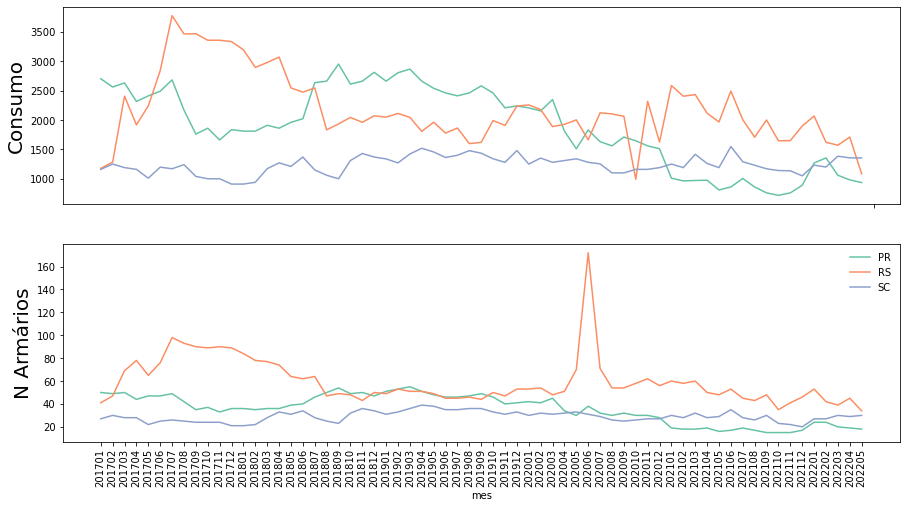

In [25]:
plt.subplots_adjust(wspace=0.17)
fig = plt.figure(figsize=(15,8))

plot = plt.subplot(2, 1, 1)
ax = sns.lineplot(data=df.loc[df['macroregiao']=='S'], x=df['mes'].dt.strftime('%Y%m').loc[df['macroregiao']=='S'], y="consumo", hue = 'uf', palette="Set2")
plt.xticks(rotation=90)
plt.ylabel("Consumo")
plt.xlabel("")
plt.xticks("")
ax.yaxis.label.set_size(20)
#plt.show()
leg = plt.legend()

ax.get_legend().set_visible(False)


plot = plt.subplot(2, 1, 2)
ax = sns.lineplot(data=df.loc[df['macroregiao']=='S'], x=df['mes'].dt.strftime('%Y%m').loc[df['macroregiao']=='S'], y="contagem", hue = 'uf', palette="Set2")
plt.xticks(rotation=90)
plt.ylabel("N Armários")
ax.yaxis.label.set_size(20)

plt.legend()
leg = plt.legend(loc = 0, ncol = 1, shadow = False, fancybox = True, frameon = False, numpoints = 1)
leg.get_frame().set_alpha(0.5)
plt.grid(False)
plt.show()

In [19]:
df = pd.read_csv(PATH + 'Consumo_acima_mensal_por_uf.txt', sep = '\t')
df['mes'] = df['mes'].apply(lambda x: pd.to_datetime(str(x) + '01'))
df

contagem     custo   consumo        mes macroregiao  uf
0           4  14093.25  19188.00 2017-01-01          CO  DF
1           2   4772.44  25088.00 2017-01-01          CO  GO
2           3  55445.01  97993.00 2017-01-01          CO  MS
3           1  10259.49  19344.00 2017-01-01           N  RO
4           1  11932.48  17151.00 2017-01-01           N  TO
..        ...       ...       ...        ...         ...  ..
973        10  64791.58  82720.00 2022-05-01           S  SC
974         3  28461.10  31045.00 2022-05-01          SE  ES
975         5   5622.85  37855.00 2022-05-01          SE  MG
976         7  56615.35  47691.00 2022-05-01          SE  RJ
977         4  36527.38  52276.69 2022-05-01          SE  SP

[978 rows x 6 columns]

<Figure size 432x288 with 0 Axes>

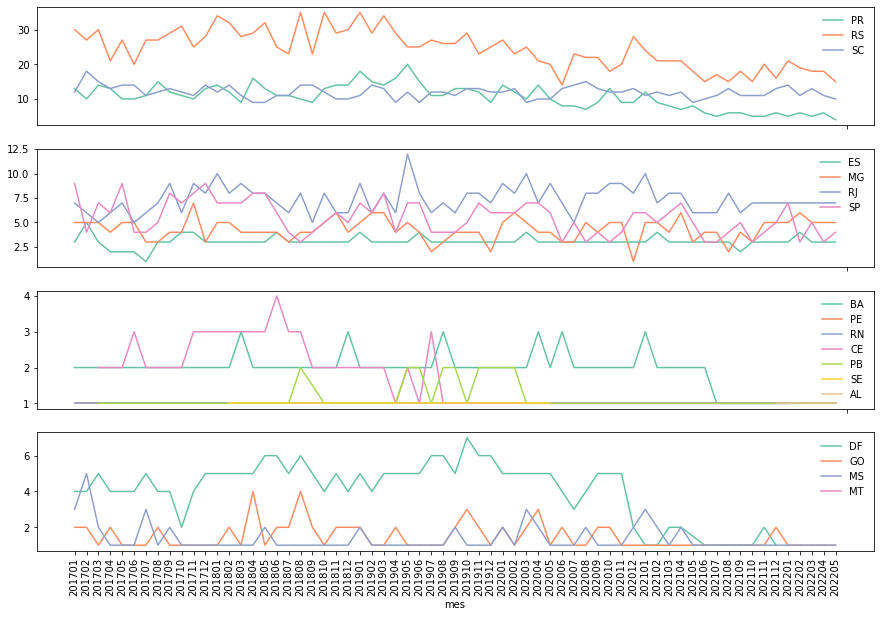

In [23]:
plt.subplots_adjust(wspace=0.17)
fig = plt.figure(figsize=(15,10))


plot = plt.subplot(4, 1, 1)
ax = sns.lineplot(data=df.loc[df['macroregiao']=='S'], x=df['mes'].dt.strftime('%Y%m').loc[df['macroregiao']=='S'], y="contagem", hue = 'uf', palette="Set2")
plt.xticks(rotation=90)
plt.ylabel("")
plt.xlabel("")
plt.xticks("")
ax.yaxis.label.set_size(20)
#plt.show()
plt.legend()
leg = plt.legend(loc = 0, ncol = 1, shadow = False, fancybox = True, frameon = False, numpoints = 1)
leg.get_frame().set_alpha(0.5)
plt.grid(False)


plot = plt.subplot(4, 1, 2)
ax = sns.lineplot(data=df.loc[df['macroregiao']=='SE'], x=df['mes'].dt.strftime('%Y%m').loc[df['macroregiao']=='SE'], y="contagem", hue = 'uf', palette="Set2")
plt.xticks(rotation=90)
plt.ylabel("")
plt.xlabel("")
plt.xticks("")
ax.yaxis.label.set_size(20)
#plt.show()
plt.legend()
leg = plt.legend(loc = 0, ncol = 1, shadow = False, fancybox = True, frameon = False, numpoints = 1)
leg.get_frame().set_alpha(0.5)
plt.grid(False)


plot = plt.subplot(4, 1, 3)
ax = sns.lineplot(data=df.loc[df['macroregiao']=='NE'], x=df['mes'].dt.strftime('%Y%m').loc[df['macroregiao']=='NE'], y="contagem", hue = 'uf', palette="Set2")
plt.xticks(rotation=90)
plt.ylabel("")
plt.xlabel("")
plt.xticks("")
ax.yaxis.label.set_size(20)
#plt.show()
plt.legend()
leg = plt.legend(loc = 1, ncol = 1, shadow = False, fancybox = True, frameon = False, numpoints = 1)
leg.get_frame().set_alpha(0.5)
plt.grid(False)



plot = plt.subplot(4, 1, 4)
ax = sns.lineplot(data=df.loc[df['macroregiao']=='CO'], x=df['mes'].dt.strftime('%Y%m').loc[df['macroregiao']=='CO'], y="contagem", hue = 'uf', palette="Set2")
plt.xticks(rotation=90)
plt.ylabel("")
ax.yaxis.label.set_size(20)

plt.legend()
leg = plt.legend(loc = 0, ncol = 1, shadow = False, fancybox = True, frameon = False, numpoints = 1)
leg.get_frame().set_alpha(0.5)
plt.grid(False)
plt.show()


<Figure size 432x288 with 0 Axes>

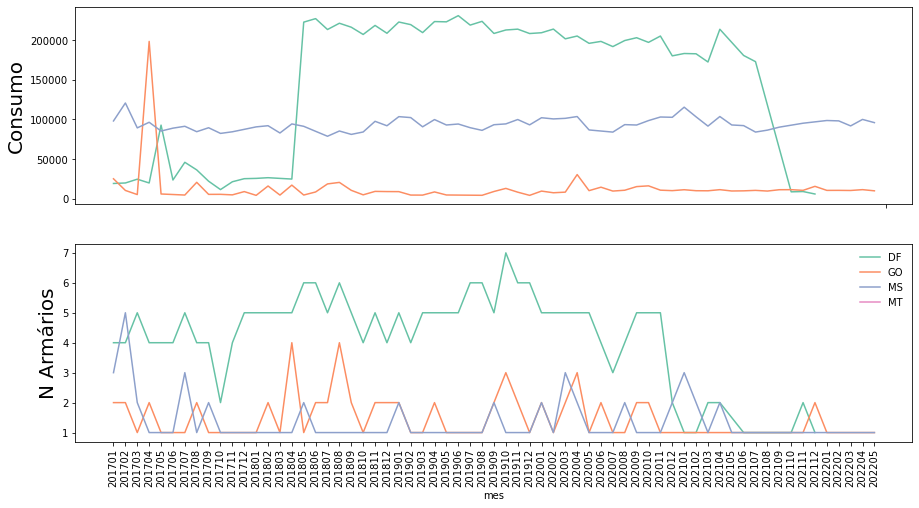

In [28]:
plt.subplots_adjust(wspace=0.17)
fig = plt.figure(figsize=(15,8))


plot = plt.subplot(2, 1, 1)
ax = sns.lineplot(data=df.loc[df['macroregiao']=='CO'], x=df['mes'].dt.strftime('%Y%m').loc[df['macroregiao']=='CO'], y="consumo", hue = 'uf', palette="Set2")
plt.xticks(rotation=90)
plt.ylabel("Consumo")
plt.xlabel("")
plt.xticks("")
ax.yaxis.label.set_size(20)
#plt.show()
leg = plt.legend()

ax.get_legend().set_visible(False)


plot = plt.subplot(2, 1, 2)
ax = sns.lineplot(data=df.loc[df['macroregiao']=='CO'], x=df['mes'].dt.strftime('%Y%m').loc[df['macroregiao']=='CO'], y="contagem", hue = 'uf', palette="Set2")
plt.xticks(rotation=90)
plt.ylabel("N Armários")
ax.yaxis.label.set_size(20)

plt.legend()
leg = plt.legend(loc = 0, ncol = 1, shadow = False, fancybox = True, frameon = False, numpoints = 1)
leg.get_frame().set_alpha(0.5)
plt.grid(False)
plt.show()


<Figure size 432x288 with 0 Axes>

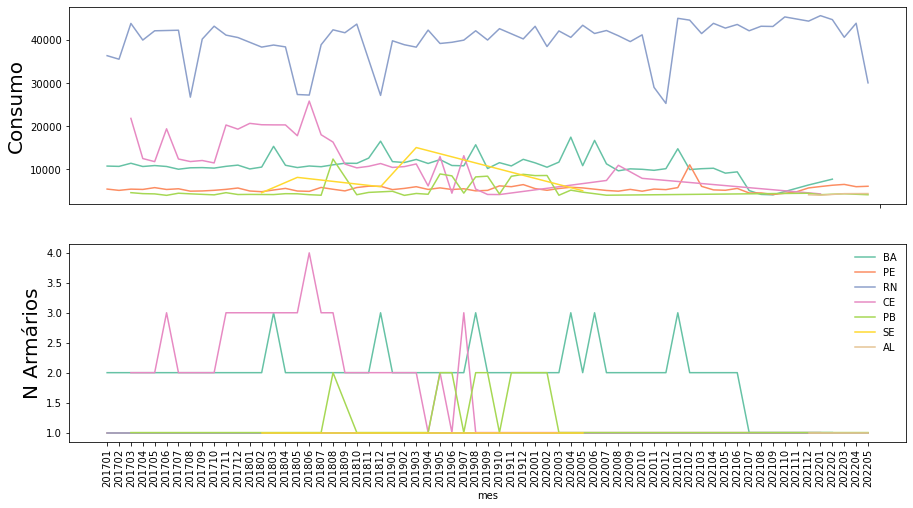

In [29]:
plt.subplots_adjust(wspace=0.17)
fig = plt.figure(figsize=(15,8))

plot = plt.subplot(2, 1, 1)
ax = sns.lineplot(data=df.loc[df['macroregiao']=='NE'], x=df['mes'].dt.strftime('%Y%m').loc[df['macroregiao']=='NE'], y="consumo", hue = 'uf', palette="Set2")
plt.xticks(rotation=90)
plt.ylabel("Consumo")
plt.xlabel("")
plt.xticks("")
ax.yaxis.label.set_size(20)
#plt.show()
leg = plt.legend()

ax.get_legend().set_visible(False)


plot = plt.subplot(2, 1, 2)
ax = sns.lineplot(data=df.loc[df['macroregiao']=='NE'], x=df['mes'].dt.strftime('%Y%m').loc[df['macroregiao']=='NE'], y="contagem", hue = 'uf', palette="Set2")
plt.xticks(rotation=90)
plt.ylabel("N Armários")
ax.yaxis.label.set_size(20)

plt.legend()
leg = plt.legend(loc = 0, ncol = 1, shadow = False, fancybox = True, frameon = False, numpoints = 1)
leg.get_frame().set_alpha(0.5)
plt.grid(False)
plt.show()

<Figure size 432x288 with 0 Axes>

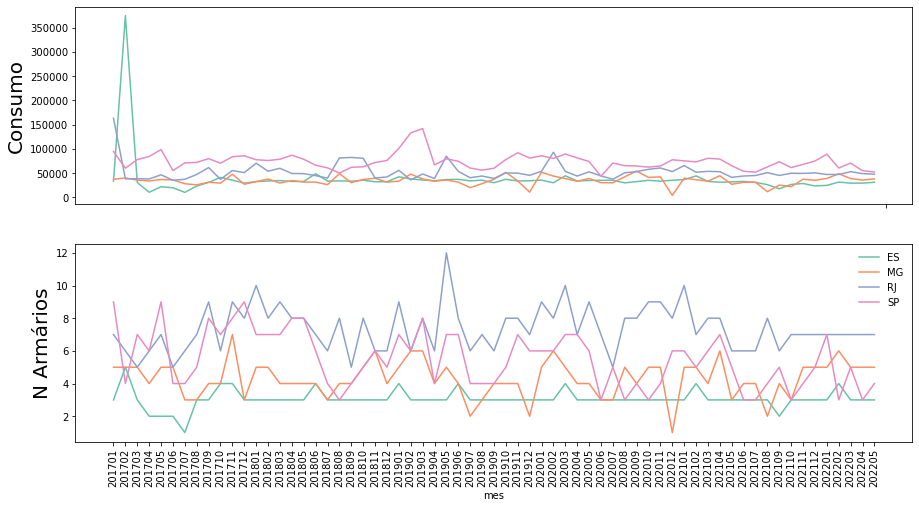

In [30]:
plt.subplots_adjust(wspace=0.17)
fig = plt.figure(figsize=(15,8))

plot = plt.subplot(2, 1, 1)
ax = sns.lineplot(data=df.loc[df['macroregiao']=='SE'], x=df['mes'].dt.strftime('%Y%m').loc[df['macroregiao']=='SE'], y="consumo", hue = 'uf', palette="Set2")
plt.xticks(rotation=90)
plt.ylabel("Consumo")
plt.xlabel("")
plt.xticks("")
ax.yaxis.label.set_size(20)
#plt.show()
leg = plt.legend()

ax.get_legend().set_visible(False)


plot = plt.subplot(2, 1, 2)
ax = sns.lineplot(data=df.loc[df['macroregiao']=='SE'], x=df['mes'].dt.strftime('%Y%m').loc[df['macroregiao']=='SE'], y="contagem", hue = 'uf', palette="Set2")
plt.xticks(rotation=90)
plt.ylabel("N Armários")
ax.yaxis.label.set_size(20)

plt.legend()
leg = plt.legend(loc = 0, ncol = 1, shadow = False, fancybox = True, frameon = False, numpoints = 1)
leg.get_frame().set_alpha(0.5)
plt.grid(False)
plt.show()

<Figure size 432x288 with 0 Axes>

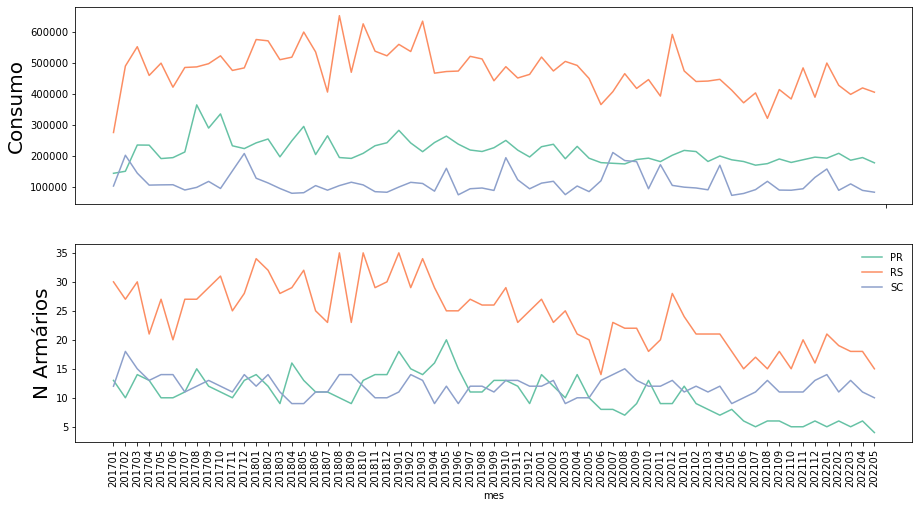

In [31]:
plt.subplots_adjust(wspace=0.17)
fig = plt.figure(figsize=(15,8))

plot = plt.subplot(2, 1, 1)
ax = sns.lineplot(data=df.loc[df['macroregiao']=='S'], x=df['mes'].dt.strftime('%Y%m').loc[df['macroregiao']=='S'], y="consumo", hue = 'uf', palette="Set2")
plt.xticks(rotation=90)
plt.ylabel("Consumo")
plt.xlabel("")
plt.xticks("")
ax.yaxis.label.set_size(20)
#plt.show()
leg = plt.legend()

ax.get_legend().set_visible(False)


plot = plt.subplot(2, 1, 2)
ax = sns.lineplot(data=df.loc[df['macroregiao']=='S'], x=df['mes'].dt.strftime('%Y%m').loc[df['macroregiao']=='S'], y="contagem", hue = 'uf', palette="Set2")
plt.xticks(rotation=90)
plt.ylabel("N Armários")
ax.yaxis.label.set_size(20)

plt.legend()
leg = plt.legend(loc = 0, ncol = 1, shadow = False, fancybox = True, frameon = False, numpoints = 1)
leg.get_frame().set_alpha(0.5)
plt.grid(False)
plt.show()